In [1]:
import configparser
import Hyperparameter_Tuner as HPT

#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split

class Optimizer:
    def __init__(self, config_file_name):
        self.config = config_file_name

        self.ML_algorithm = {}
        self.Opt_algorithm = {}
        #self.iris_dataset = load_iris()
        #self.iris_x, self.iris_X_test, self.iris_y, self.iris_y_test = train_test_split(self.iris_dataset['data'], self.iris_dataset['target'], random_state=0)

    def get_config(self):
        # read config file and save content as attribute
        self.configparser = configparser.ConfigParser()
        self.configparser.read('../' + self.config)
        
        # store ml_algorithm & opt_algorithm after change string to list
        # using dictionary in dictionary such as {BO : {A:1, B:2}, PSO : {C:3, D:4}}
        for opt in self.configparser['Opt_algorithm']['Opt_name'].split(','):
            hp_dict = {}
            opt_str = opt.strip().upper()
            for hp in self.configparser[opt_str + '_Hyperparameter']:
                hp_dict[hp] = self.configparser[opt_str + '_Hyperparameter'][hp]
            self.Opt_algorithm[opt_str] = hp_dict

        print(self.Opt_algorithm)

        for ml in self.configparser['ML_algorithm']['ML_name'].split(','):
            hp_dict = {}
            if ml.strip().upper() == 'RANDOMFOREST':
                ml_str = 'RF'
            else:
                ml_str = ml.strip().upper()
            for hp in self.configparser[ml_str + '_Hyperparameter']:
                hp_list = []
                if hp == 'kernel':
                    for ker in self.configparser[ml_str+'_Hyperparameter'][hp].split(','):
                        hp_list.append(ker.strip().strip("'").strip("'"))
                    hp_dict[hp] = hp_list

                else:
                    hp_num = self.configparser[ml_str+ '_Hyperparameter'][hp].split(',')
                    if hp_num[2].strip().strip('[').strip(']') == 'int':
                        hp_list.append(int(hp_num[0].strip().strip('[').strip(']')))
                        hp_list.append(int(hp_num[1].strip().strip('[').strip(']')))
                    elif hp_num[2].strip().strip('[').strip(']') == 'int':
                        hp_list.append(float(hp_num[0].strip().strip('[').strip(']')))
                        hp_list.append(float(hp_num[1].strip().strip('[').strip(']')))
                    hp_dict[hp] = hp_list
                self.ML_algorithm[ml_str] = hp_dict
 
            print(self.ML_algorithm)
 
    def run_Hyperparameter_Tuner(self):
        for opt_al in self.Opt_algorithm.keys():
            #with HPT.Hyperparameter_Tuner(opt_al, self.Opt_algorithm[opt_al], self.ML_algorithm) as Hyperparameter_Tuner_class:
                #Hyperparameter_Tuner_class.run_opt_algorithm()
            HPT_class = HPT.Hyperparameter_Tuner(opt_al, self.Opt_algorithm[opt_al], self.ML_algorithm)
            HPT_class.load_data()
            HPT_class.run_feature_selection()
            HPT_class.run_opt_algorithm()

{'PSO': {'num_particles': '20', 'num_generations': '100', 'num_out_fold': '2', 'num_in_fold': '5'}}
{'SVM': {'c': [2, 50], 'loggamma': [-5, 5], 'kernel': ['rbf']}}
       smart_1_normalized  smart_5_raw  smart_9_normalized  \
0                    77.0      17168.0                88.0   
1                    78.0          0.0               100.0   
2                    78.0          0.0                93.0   
3                    83.0       1704.0                86.0   
4                    80.0          0.0                99.0   
...                   ...          ...                 ...   
11325                83.0          0.0                98.0   
11326                83.0          0.0                97.0   
11327                78.0          0.0                93.0   
11328                79.0       4736.0                86.0   
11329                70.0       9728.0                85.0   

       smart_189_normalized  smart_197_normalized  smart_197_raw  
0                       

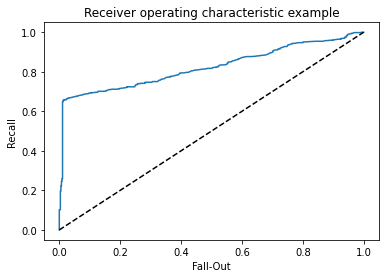

0.7804878048780487
c : 39.6640625, loggamma : -3.4033203125, kernel : rbf
accuracy 0.8172992056487202


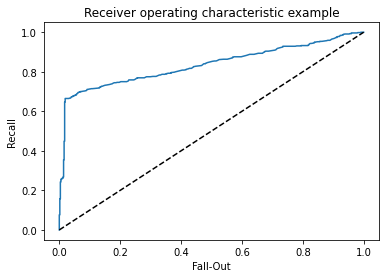

0.7804878048780488
c : 39.6640625, loggamma : -3.4033203125, kernel : rbf
accuracy 0.8111209179170344


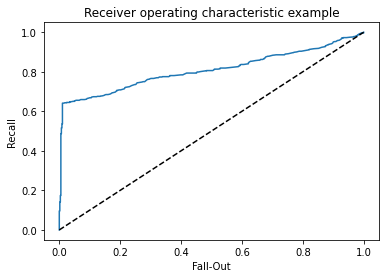

0.762749445676275
c : 39.6640625, loggamma : -3.4033203125, kernel : rbf
accuracy 0.8199470432480142


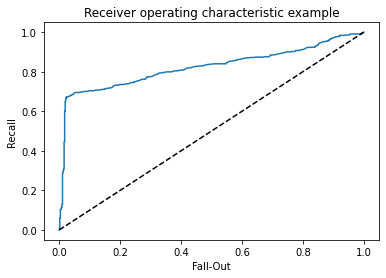

0.7848101265822784
c : 39.6640625, loggamma : -3.4033203125, kernel : rbf
accuracy 0.8005295675198588


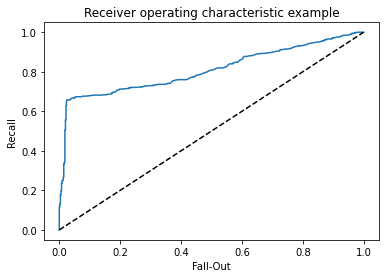

0.7684426229508198
0  0  0
c : 15.6640625, loggamma : 1.5966796875, kernel : rbf
accuracy 0.793468667255075


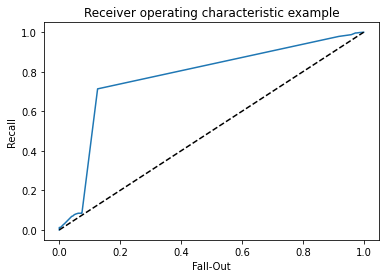

0.7762906309751433
c : 15.6640625, loggamma : 1.5966796875, kernel : rbf
accuracy 0.7855251544571933


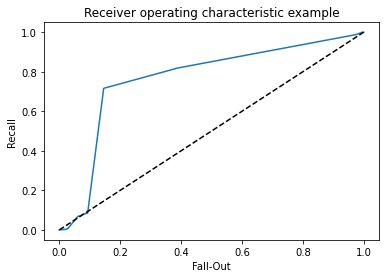

0.7687916270218839
c : 15.6640625, loggamma : 1.5966796875, kernel : rbf
accuracy 0.7917034421888791


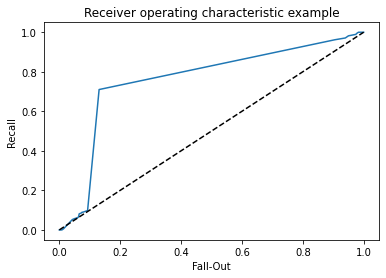

0.7686274509803921
c : 15.6640625, loggamma : 1.5966796875, kernel : rbf
accuracy 0.8022947925860547


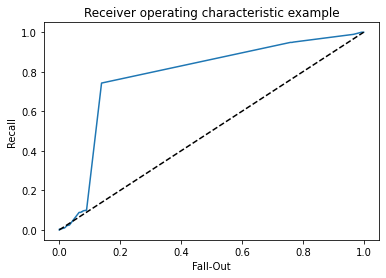

0.7890772128060264
c : 15.6640625, loggamma : 1.5966796875, kernel : rbf
accuracy 0.793468667255075


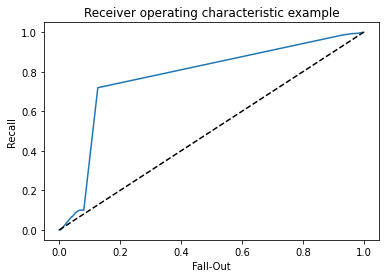

0.7833333333333333
0  0  1
c : 21.6640625, loggamma : -4.6533203125, kernel : rbf
accuracy 0.8172992056487202


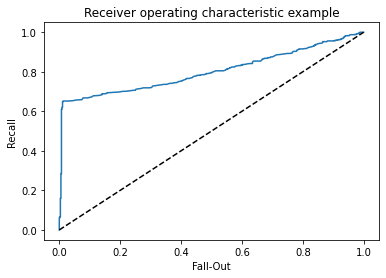

0.7804878048780487
c : 21.6640625, loggamma : -4.6533203125, kernel : rbf
accuracy 0.8190644307149162


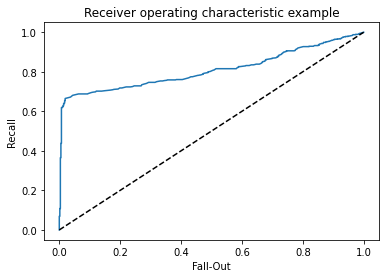

0.782608695652174
c : 21.6640625, loggamma : -4.6533203125, kernel : rbf
accuracy 0.8128861429832304


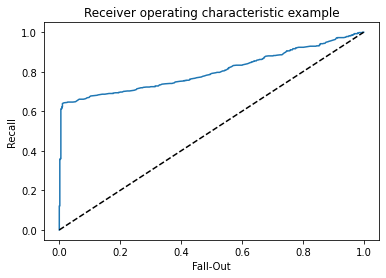

0.7654867256637169
c : 21.6640625, loggamma : -4.6533203125, kernel : rbf
accuracy 0.8199470432480142


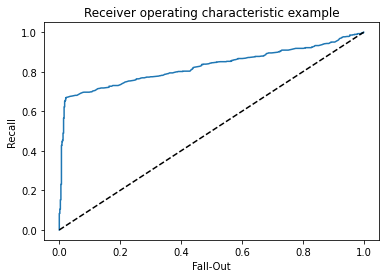

0.7848101265822784
c : 21.6640625, loggamma : -4.6533203125, kernel : rbf
accuracy 0.8005295675198588


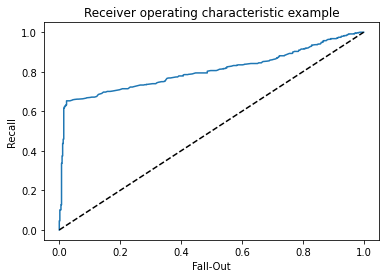

0.7684426229508198
0  0  2
c : 45.6640625, loggamma : 0.3466796875, kernel : rbf
accuracy 0.794351279788173


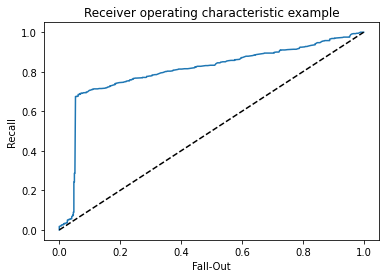

0.7770334928229663
c : 45.6640625, loggamma : 0.3466796875, kernel : rbf
accuracy 0.7855251544571933


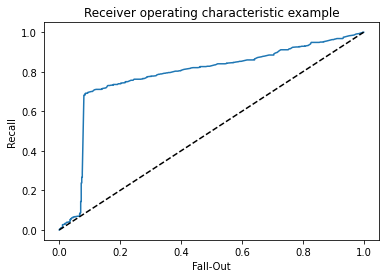

0.7687916270218839
c : 45.6640625, loggamma : 0.3466796875, kernel : rbf
accuracy 0.7925860547219771


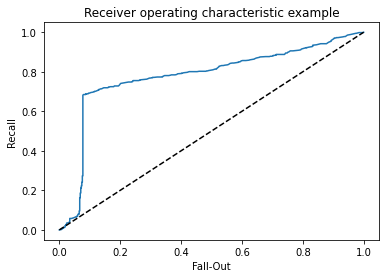

0.7693817468105987
c : 45.6640625, loggamma : 0.3466796875, kernel : rbf
accuracy 0.8022947925860547


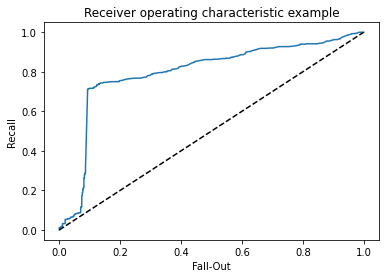

0.7890772128060264
c : 45.6640625, loggamma : 0.3466796875, kernel : rbf
accuracy 0.7917034421888791


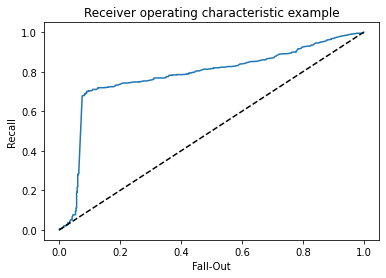

0.7810760667903524
0  0  3
c : 33.6640625, loggamma : -2.1533203125, kernel : rbf
accuracy 0.8172992056487202


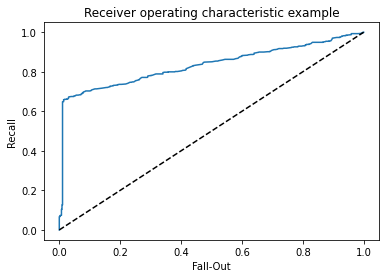

0.781414994720169
c : 33.6640625, loggamma : -2.1533203125, kernel : rbf
accuracy 0.8199470432480142


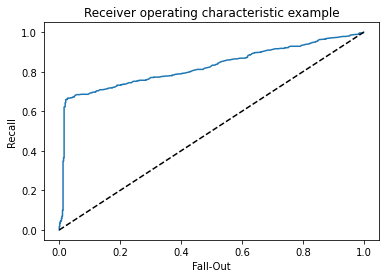

0.7848101265822784
c : 33.6640625, loggamma : -2.1533203125, kernel : rbf
accuracy 0.8172992056487202


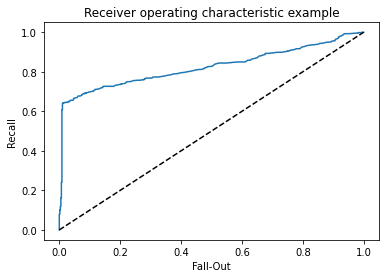

0.7722772277227724
c : 33.6640625, loggamma : -2.1533203125, kernel : rbf
accuracy 0.8199470432480142


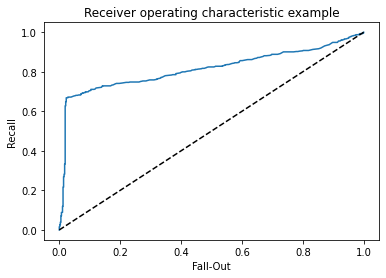

0.7852631578947368
c : 33.6640625, loggamma : -2.1533203125, kernel : rbf
accuracy 0.8040600176522507


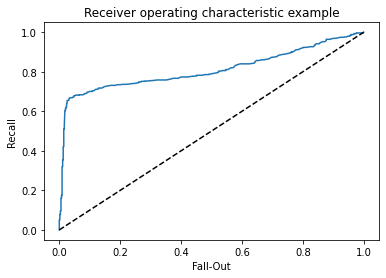

0.7739307535641547
0  0  4
c : 9.6640625, loggamma : 2.8466796875, kernel : rbf
accuracy 0.793468667255075


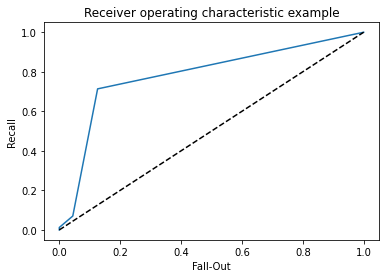

0.7762906309751433
c : 9.6640625, loggamma : 2.8466796875, kernel : rbf
accuracy 0.7855251544571933


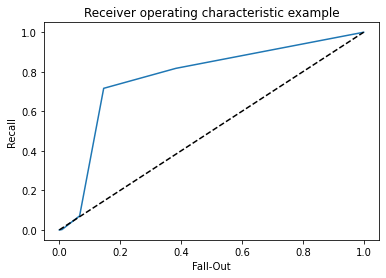

0.7687916270218839
c : 9.6640625, loggamma : 2.8466796875, kernel : rbf
accuracy 0.7917034421888791


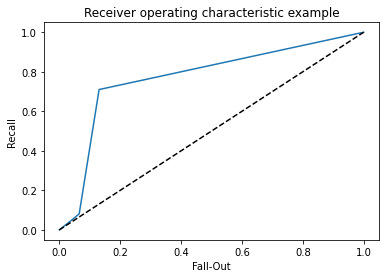

0.7686274509803921
c : 9.6640625, loggamma : 2.8466796875, kernel : rbf
accuracy 0.8022947925860547


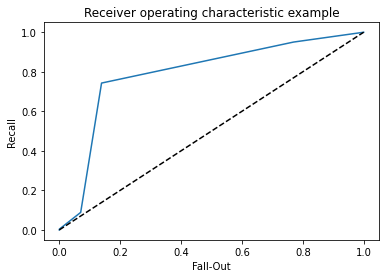

0.7890772128060264
c : 9.6640625, loggamma : 2.8466796875, kernel : rbf
accuracy 0.793468667255075


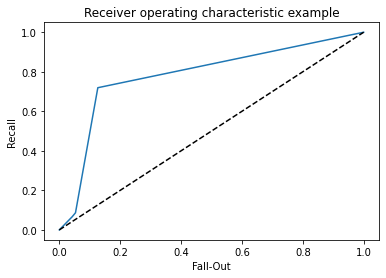

0.7833333333333333
0  0  5
c : 12.6640625, loggamma : -2.7783203125, kernel : rbf
accuracy 0.8172992056487202


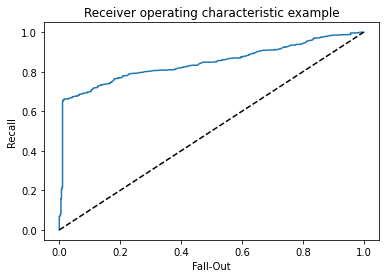

0.7804878048780487
c : 12.6640625, loggamma : -2.7783203125, kernel : rbf
accuracy 0.8164165931156222


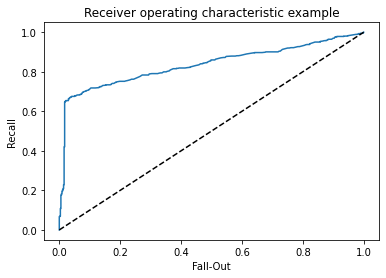

0.7801268498942917
c : 12.6640625, loggamma : -2.7783203125, kernel : rbf
accuracy 0.8102383053839365


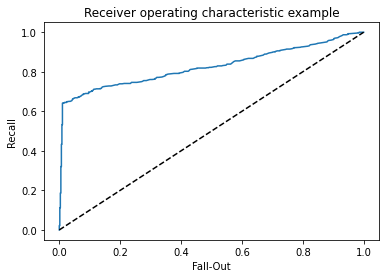

0.7613762486126526
c : 12.6640625, loggamma : -2.7783203125, kernel : rbf
accuracy 0.8199470432480142


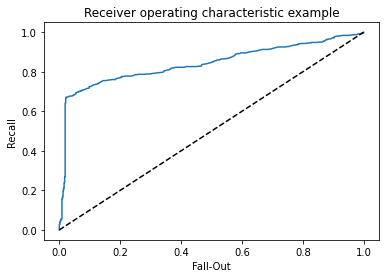

0.7848101265822784
c : 12.6640625, loggamma : -2.7783203125, kernel : rbf
accuracy 0.8005295675198588


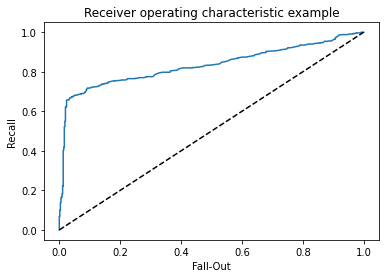

0.7684426229508198
0  0  6
c : 36.6640625, loggamma : 2.2216796875, kernel : rbf
accuracy 0.793468667255075


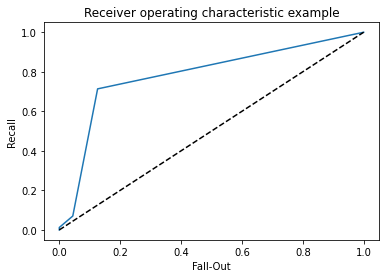

0.7762906309751433
c : 36.6640625, loggamma : 2.2216796875, kernel : rbf
accuracy 0.7855251544571933


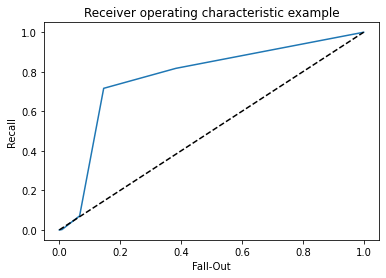

0.7687916270218839
c : 36.6640625, loggamma : 2.2216796875, kernel : rbf
accuracy 0.7917034421888791


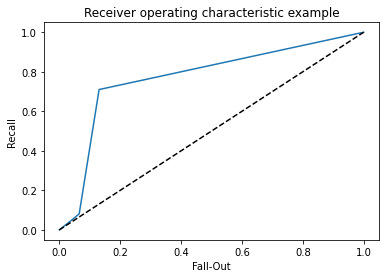

0.7686274509803921
c : 36.6640625, loggamma : 2.2216796875, kernel : rbf
accuracy 0.8022947925860547


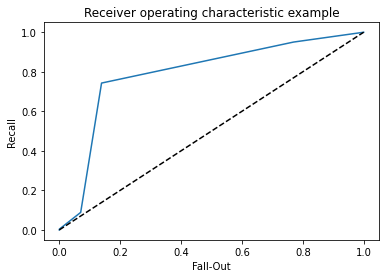

0.7890772128060264
c : 36.6640625, loggamma : 2.2216796875, kernel : rbf
accuracy 0.793468667255075


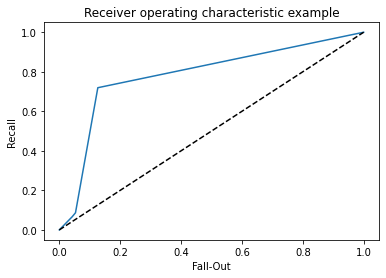

0.7833333333333333
0  0  7
c : 48.6640625, loggamma : -0.2783203125, kernel : rbf
accuracy 0.8067078552515445


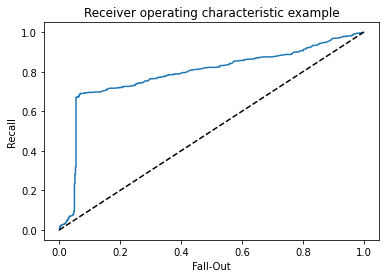

0.7790110998990919
c : 48.6640625, loggamma : -0.2783203125, kernel : rbf
accuracy 0.7996469549867609


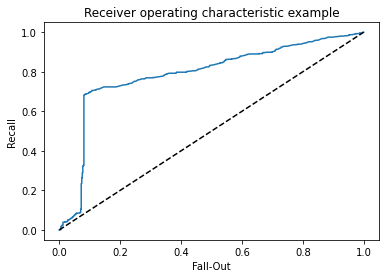

0.7732267732267732
c : 48.6640625, loggamma : -0.2783203125, kernel : rbf
accuracy 0.8058252427184466


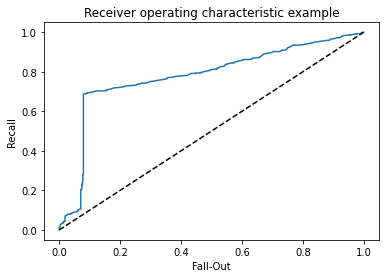

0.7755102040816327
c : 48.6640625, loggamma : -0.2783203125, kernel : rbf
accuracy 0.8022947925860547


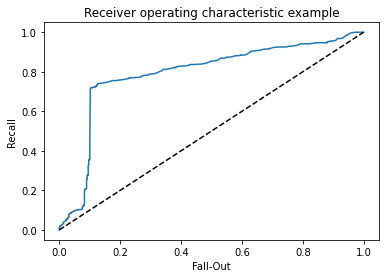

0.7850287907869482
c : 48.6640625, loggamma : -0.2783203125, kernel : rbf
accuracy 0.7925860547219771


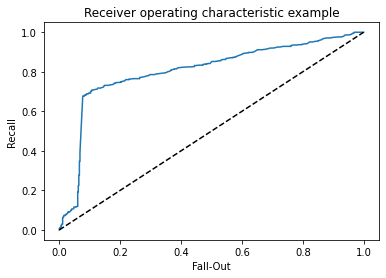

0.7755491881566381
0  0  8
c : 24.6640625, loggamma : 4.7216796875, kernel : rbf
accuracy 0.793468667255075


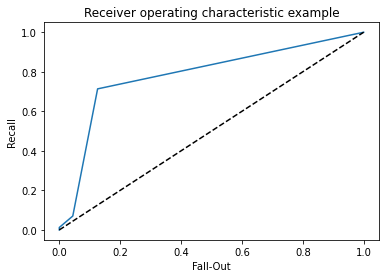

0.7762906309751433
c : 24.6640625, loggamma : 4.7216796875, kernel : rbf
accuracy 0.7855251544571933


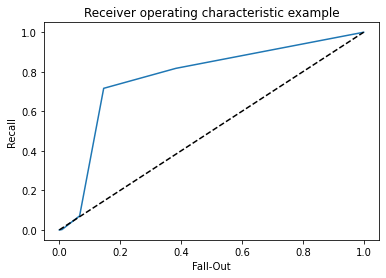

0.7687916270218839
c : 24.6640625, loggamma : 4.7216796875, kernel : rbf
accuracy 0.7917034421888791


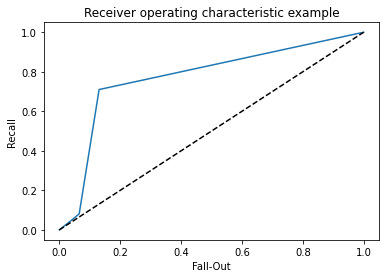

0.7686274509803921
c : 24.6640625, loggamma : 4.7216796875, kernel : rbf
accuracy 0.8022947925860547


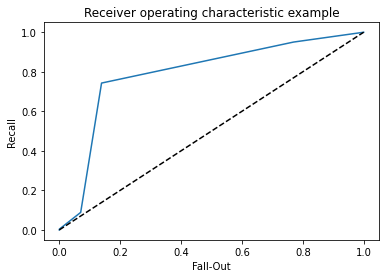

0.7890772128060264
c : 24.6640625, loggamma : 4.7216796875, kernel : rbf
accuracy 0.793468667255075


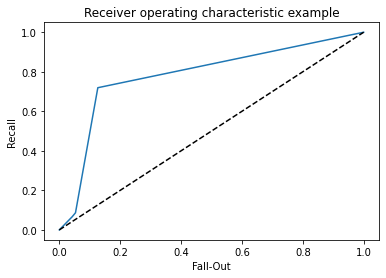

0.7833333333333333
0  0  9
c : 18.6640625, loggamma : -1.5283203125, kernel : rbf
accuracy 0.8155339805825242


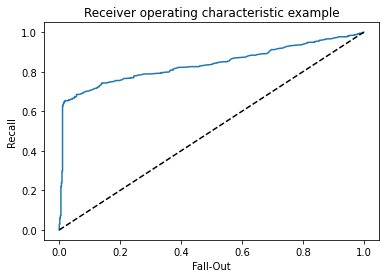

0.7793030623020063
c : 18.6640625, loggamma : -1.5283203125, kernel : rbf
accuracy 0.8190644307149162


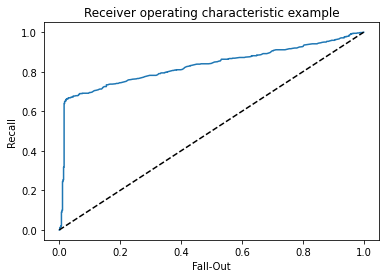

0.7839831401475238
c : 18.6640625, loggamma : -1.5283203125, kernel : rbf
accuracy 0.8181818181818182


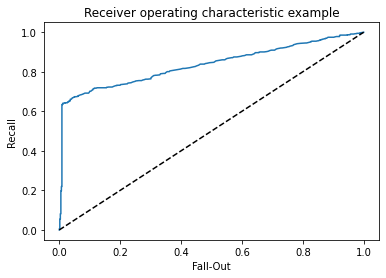

0.7741228070175438
c : 18.6640625, loggamma : -1.5283203125, kernel : rbf
accuracy 0.822594880847308


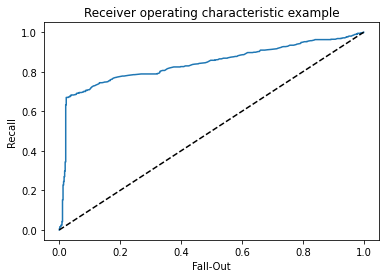

0.789087093389297
c : 18.6640625, loggamma : -1.5283203125, kernel : rbf
accuracy 0.8040600176522507


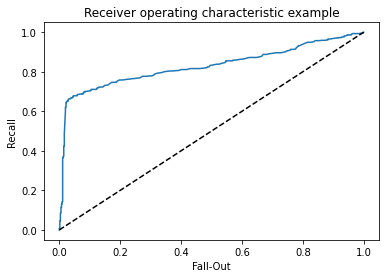

0.773469387755102
0  0  10
c : 42.6640625, loggamma : 3.4716796875, kernel : rbf
accuracy 0.793468667255075


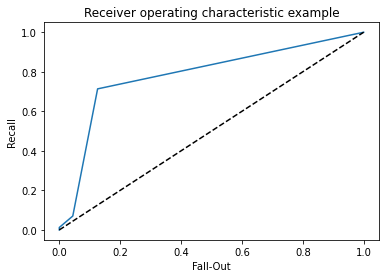

0.7762906309751433
c : 42.6640625, loggamma : 3.4716796875, kernel : rbf
accuracy 0.7855251544571933


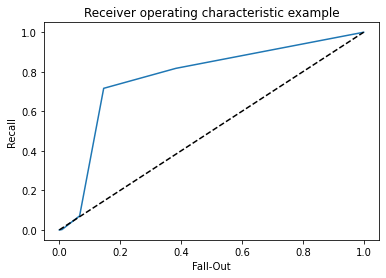

0.7687916270218839
c : 42.6640625, loggamma : 3.4716796875, kernel : rbf
accuracy 0.7917034421888791


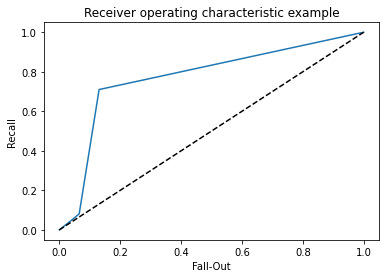

0.7686274509803921
c : 42.6640625, loggamma : 3.4716796875, kernel : rbf
accuracy 0.8022947925860547


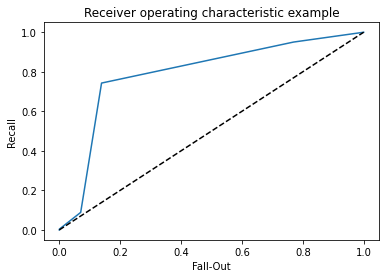

0.7890772128060264
c : 42.6640625, loggamma : 3.4716796875, kernel : rbf
accuracy 0.793468667255075


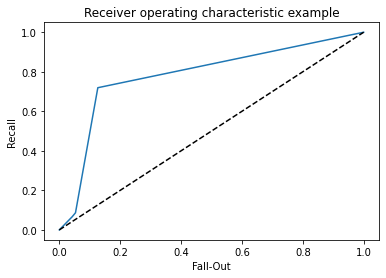

0.7833333333333333
0  0  11
c : 30.6640625, loggamma : -4.0283203125, kernel : rbf
accuracy 0.8172992056487202


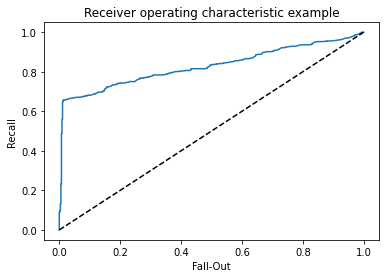

0.7804878048780487
c : 30.6640625, loggamma : -4.0283203125, kernel : rbf
accuracy 0.8181818181818182


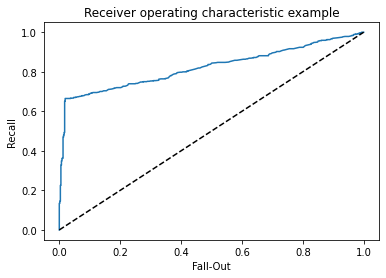

0.7817796610169491
c : 30.6640625, loggamma : -4.0283203125, kernel : rbf
accuracy 0.8111209179170344


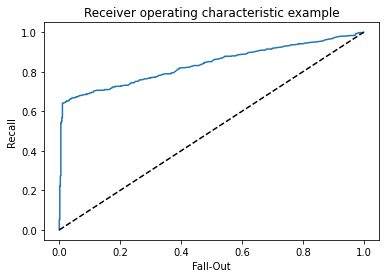

0.762749445676275
c : 30.6640625, loggamma : -4.0283203125, kernel : rbf
accuracy 0.8208296557811121


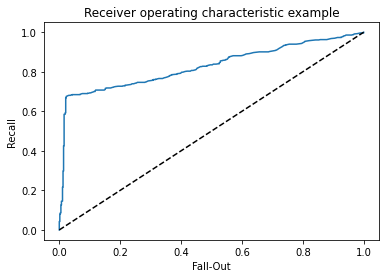

0.7860906217070602
c : 30.6640625, loggamma : -4.0283203125, kernel : rbf
accuracy 0.8005295675198588


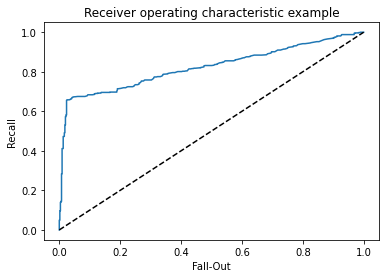

0.7684426229508198
0  0  12
c : 6.6640625, loggamma : 0.9716796875, kernel : rbf
accuracy 0.793468667255075


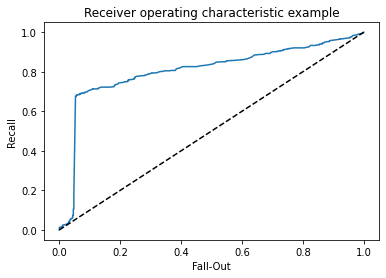

0.7762906309751433
c : 6.6640625, loggamma : 0.9716796875, kernel : rbf
accuracy 0.7855251544571933


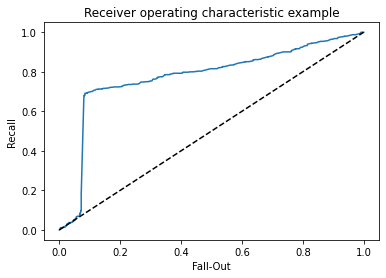

0.7687916270218839
c : 6.6640625, loggamma : 0.9716796875, kernel : rbf
accuracy 0.7917034421888791


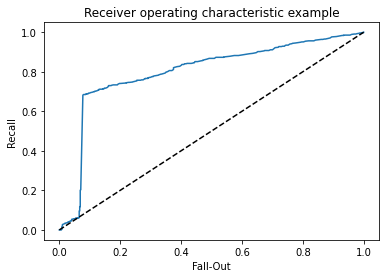

0.7686274509803921
c : 6.6640625, loggamma : 0.9716796875, kernel : rbf
accuracy 0.8022947925860547


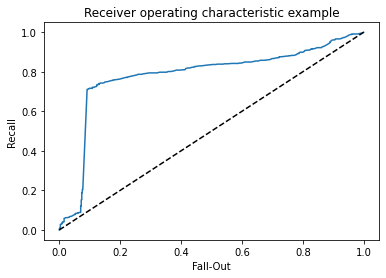

0.7890772128060264
c : 6.6640625, loggamma : 0.9716796875, kernel : rbf
accuracy 0.793468667255075


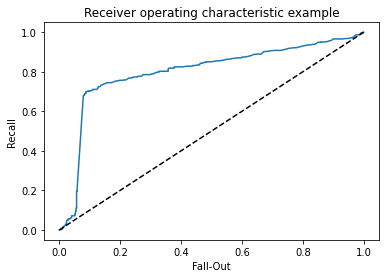

0.7833333333333333
0  0  13
c : 5.1640625, loggamma : -4.3408203125, kernel : rbf
accuracy 0.8164165931156222


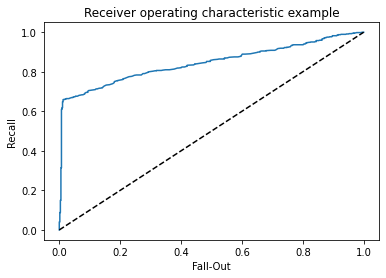

0.7791932059447982
c : 5.1640625, loggamma : -4.3408203125, kernel : rbf
accuracy 0.8172992056487202


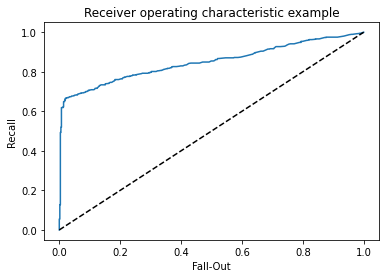

0.7800212539851222
c : 5.1640625, loggamma : -4.3408203125, kernel : rbf
accuracy 0.8111209179170344


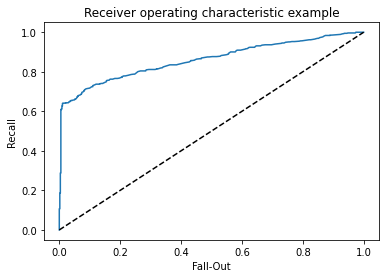

0.7622222222222221
c : 5.1640625, loggamma : -4.3408203125, kernel : rbf
accuracy 0.8155339805825242


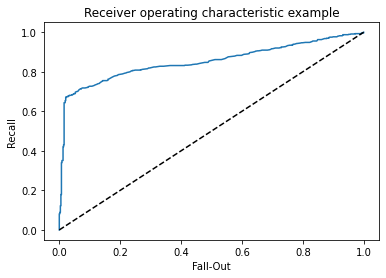

0.7778958554729011
c : 5.1640625, loggamma : -4.3408203125, kernel : rbf
accuracy 0.7969991173874669


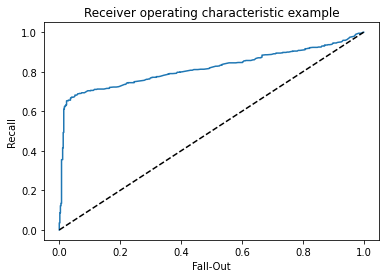

0.7628865979381444
0  0  14
c : 29.1640625, loggamma : 0.6591796875, kernel : rbf
accuracy 0.793468667255075


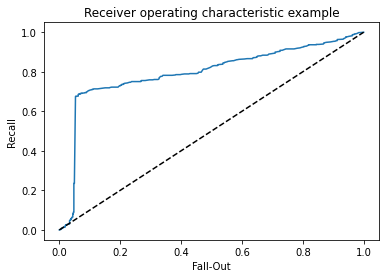

0.7762906309751433
c : 29.1640625, loggamma : 0.6591796875, kernel : rbf
accuracy 0.7855251544571933


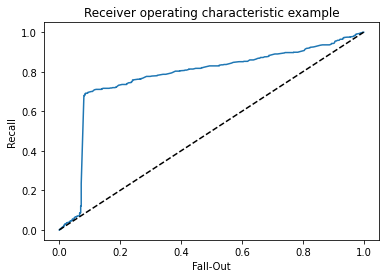

0.7687916270218839
c : 29.1640625, loggamma : 0.6591796875, kernel : rbf
accuracy 0.7917034421888791


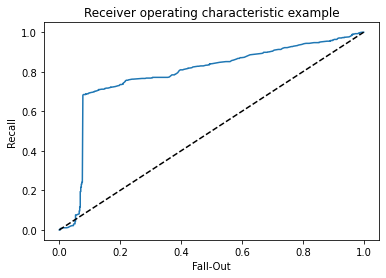

0.7686274509803921
c : 29.1640625, loggamma : 0.6591796875, kernel : rbf
accuracy 0.8022947925860547


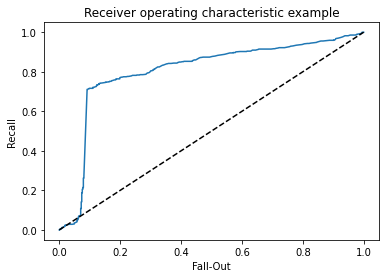

0.7890772128060264
c : 29.1640625, loggamma : 0.6591796875, kernel : rbf
accuracy 0.793468667255075


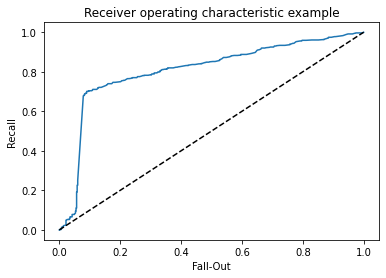

0.7833333333333333
0  0  15
c : 41.1640625, loggamma : -1.8408203125, kernel : rbf
accuracy 0.8128861429832304


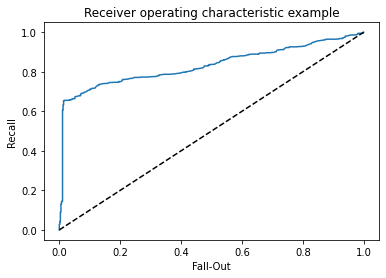

0.7749469214437368
c : 41.1640625, loggamma : -1.8408203125, kernel : rbf
accuracy 0.8181818181818182


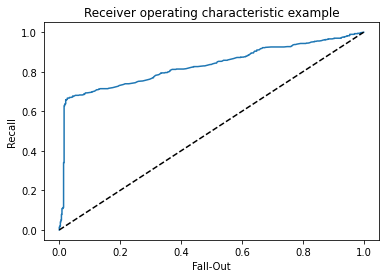

0.7827004219409283
c : 41.1640625, loggamma : -1.8408203125, kernel : rbf
accuracy 0.8164165931156222


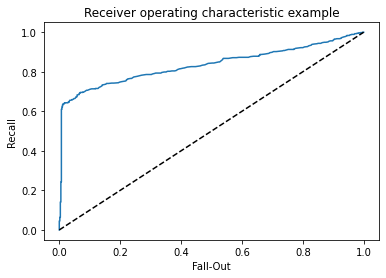

0.7714285714285716
c : 41.1640625, loggamma : -1.8408203125, kernel : rbf
accuracy 0.8190644307149162


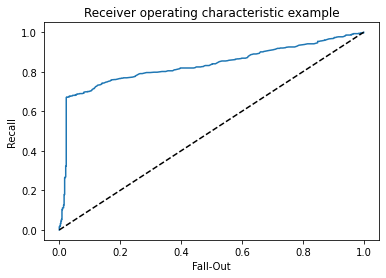

0.7839831401475238
c : 41.1640625, loggamma : -1.8408203125, kernel : rbf
accuracy 0.8067078552515445


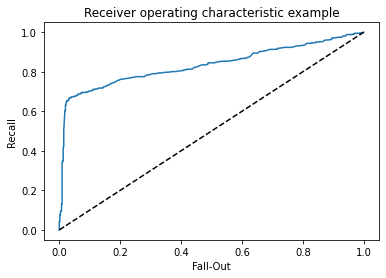

0.7772126144455749
0  0  16
c : 17.1640625, loggamma : 3.1591796875, kernel : rbf
accuracy 0.793468667255075


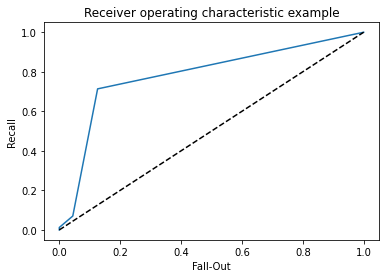

0.7762906309751433
c : 17.1640625, loggamma : 3.1591796875, kernel : rbf
accuracy 0.7855251544571933


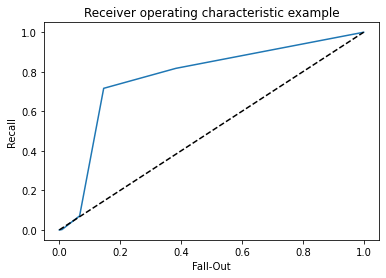

0.7687916270218839
c : 17.1640625, loggamma : 3.1591796875, kernel : rbf
accuracy 0.7917034421888791


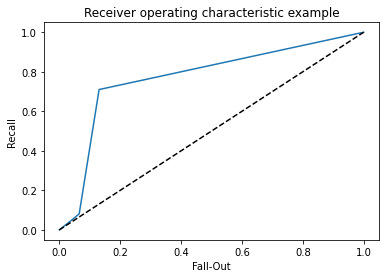

0.7686274509803921
c : 17.1640625, loggamma : 3.1591796875, kernel : rbf
accuracy 0.8022947925860547


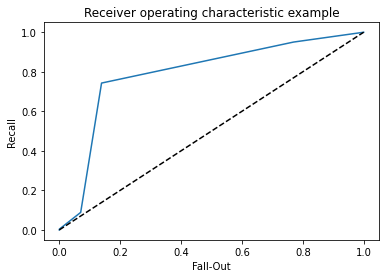

0.7890772128060264
c : 17.1640625, loggamma : 3.1591796875, kernel : rbf
accuracy 0.793468667255075


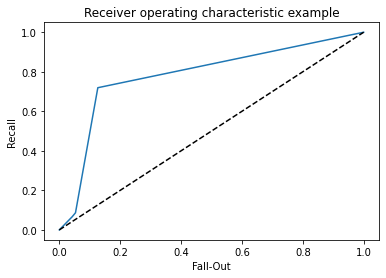

0.7833333333333333
0  0  17
c : 23.1640625, loggamma : -0.5908203125, kernel : rbf
accuracy 0.8075904677846425


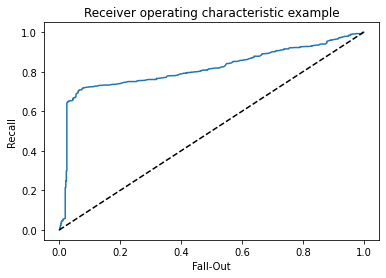

0.7775510204081633
c : 23.1640625, loggamma : -0.5908203125, kernel : rbf
accuracy 0.8084730803177406


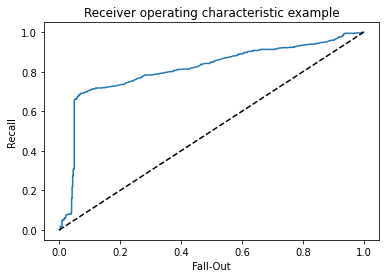

0.7805864509605662
c : 23.1640625, loggamma : -0.5908203125, kernel : rbf
accuracy 0.8146513680494263


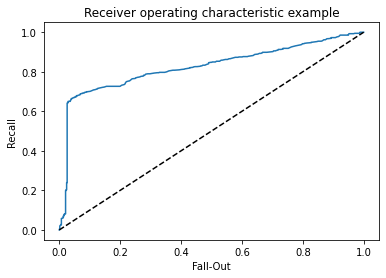

0.7775423728813559
c : 23.1640625, loggamma : -0.5908203125, kernel : rbf
accuracy 0.8155339805825242


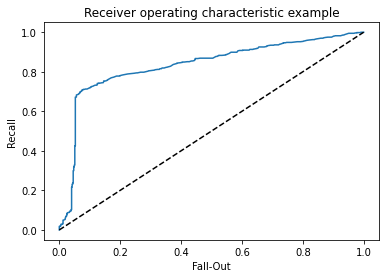

0.7928642220019821
c : 23.1640625, loggamma : -0.5908203125, kernel : rbf
accuracy 0.8031774051191527


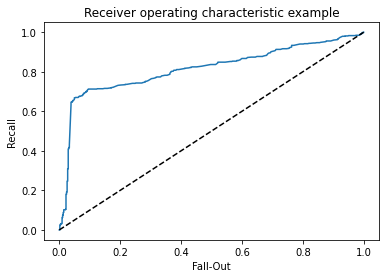

0.7789890981169474
0  0  18
c : 47.1640625, loggamma : 4.4091796875, kernel : rbf
accuracy 0.793468667255075


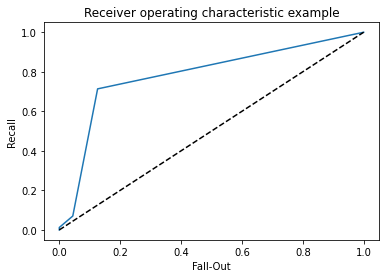

0.7762906309751433
c : 47.1640625, loggamma : 4.4091796875, kernel : rbf
accuracy 0.7855251544571933


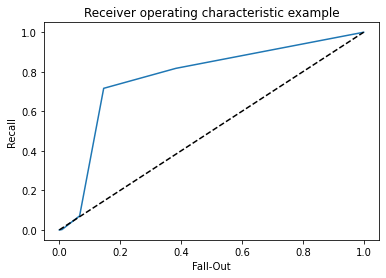

0.7687916270218839
c : 47.1640625, loggamma : 4.4091796875, kernel : rbf
accuracy 0.7917034421888791


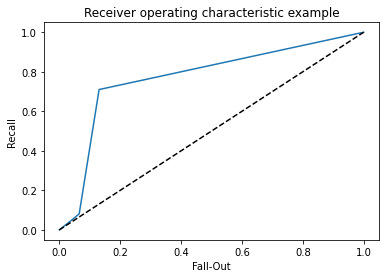

0.7686274509803921
c : 47.1640625, loggamma : 4.4091796875, kernel : rbf
accuracy 0.8022947925860547


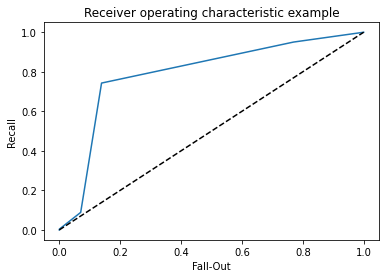

0.7890772128060264
c : 47.1640625, loggamma : 4.4091796875, kernel : rbf
accuracy 0.793468667255075


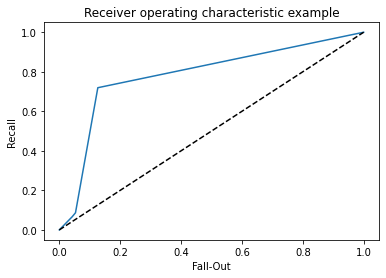

0.7833333333333333
0  0  19
c : 39.3280625, loggamma : -3.3333203125, kernel : rbf
accuracy 0.8172992056487202


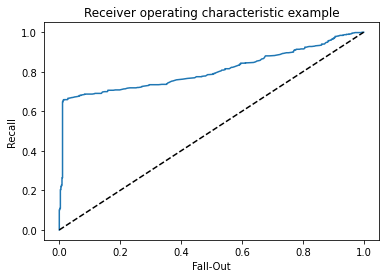

0.7804878048780487
c : 39.3280625, loggamma : -3.3333203125, kernel : rbf
accuracy 0.8172992056487202


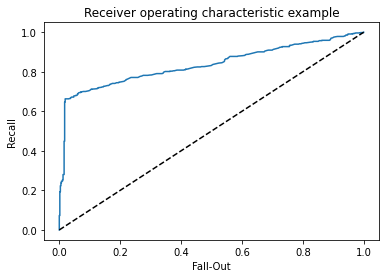

0.7804878048780488
c : 39.3280625, loggamma : -3.3333203125, kernel : rbf
accuracy 0.8111209179170344


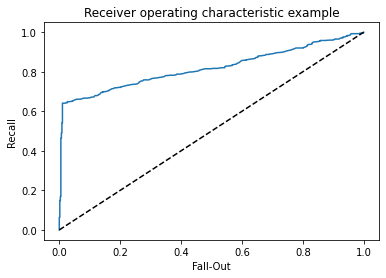

0.762749445676275
c : 39.3280625, loggamma : -3.3333203125, kernel : rbf
accuracy 0.8199470432480142


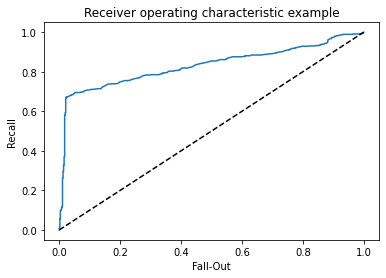

0.7848101265822784
c : 39.3280625, loggamma : -3.3333203125, kernel : rbf
accuracy 0.8005295675198588


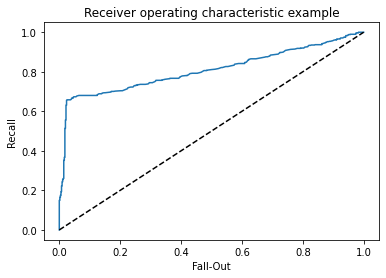

0.7684426229508198
0  1  0
c : 16.0000625, loggamma : 1.5266796875, kernel : rbf
accuracy 0.793468667255075


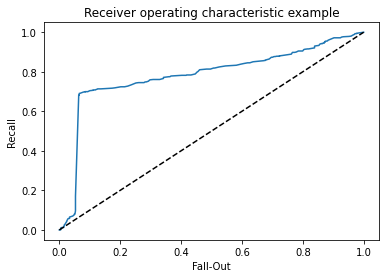

0.7762906309751433
c : 16.0000625, loggamma : 1.5266796875, kernel : rbf
accuracy 0.7855251544571933


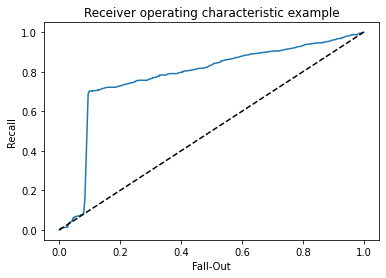

0.7687916270218839
c : 16.0000625, loggamma : 1.5266796875, kernel : rbf
accuracy 0.7917034421888791


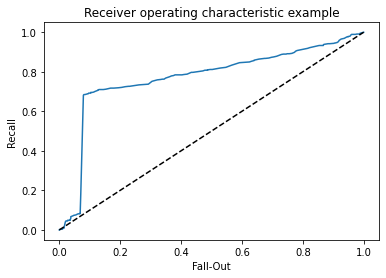

0.7686274509803921
c : 16.0000625, loggamma : 1.5266796875, kernel : rbf
accuracy 0.8022947925860547


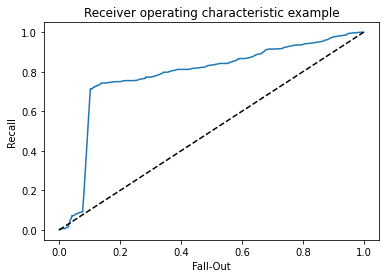

0.7890772128060264
c : 16.0000625, loggamma : 1.5266796875, kernel : rbf
accuracy 0.793468667255075


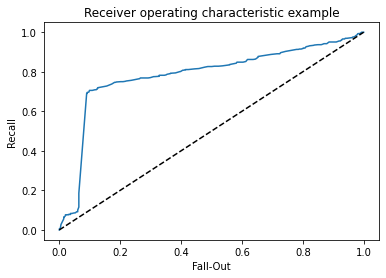

0.7833333333333333
0  1  1
c : 22.0000625, loggamma : -4.5833203125, kernel : rbf
accuracy 0.8172992056487202


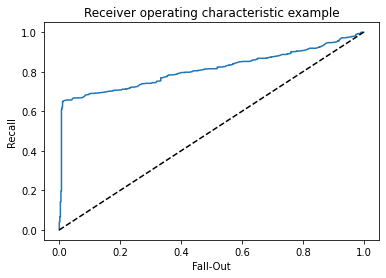

0.7804878048780487
c : 22.0000625, loggamma : -4.5833203125, kernel : rbf
accuracy 0.8190644307149162


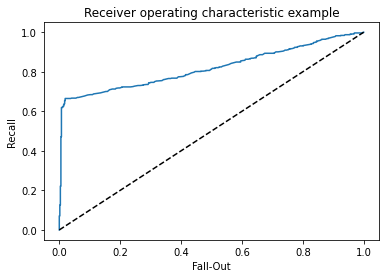

0.782608695652174
c : 22.0000625, loggamma : -4.5833203125, kernel : rbf
accuracy 0.8128861429832304


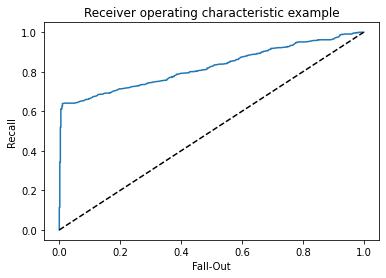

0.7654867256637169
c : 22.0000625, loggamma : -4.5833203125, kernel : rbf
accuracy 0.8199470432480142


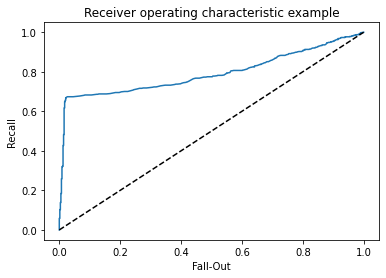

0.7848101265822784
c : 22.0000625, loggamma : -4.5833203125, kernel : rbf
accuracy 0.8005295675198588


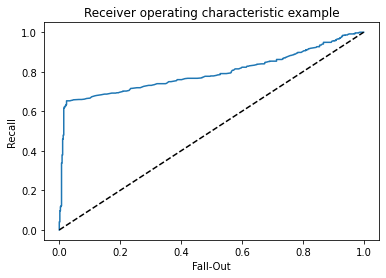

0.7684426229508198
0  1  2
c : 45.3280625, loggamma : 0.2766796875, kernel : rbf
accuracy 0.7996469549867609


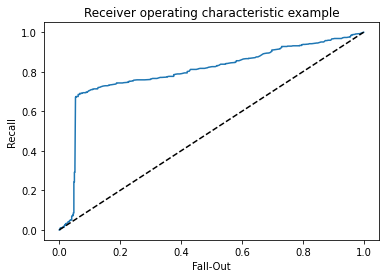

0.7815206929740134
c : 45.3280625, loggamma : 0.2766796875, kernel : rbf
accuracy 0.7872903795233892


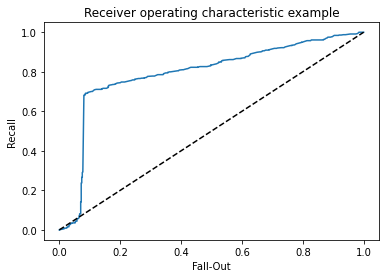

0.769377990430622
c : 45.3280625, loggamma : 0.2766796875, kernel : rbf
accuracy 0.794351279788173


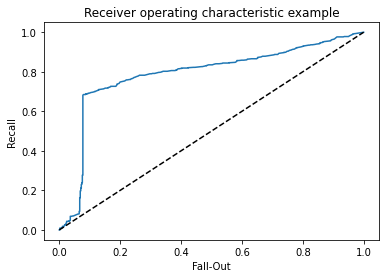

0.7681592039800994
c : 45.3280625, loggamma : 0.2766796875, kernel : rbf
accuracy 0.8040600176522507


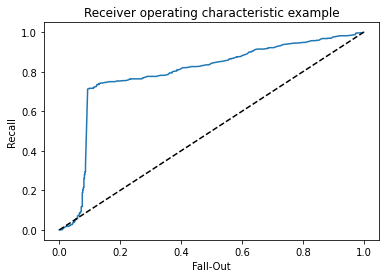

0.7901701323251419
c : 45.3280625, loggamma : 0.2766796875, kernel : rbf
accuracy 0.7925860547219771


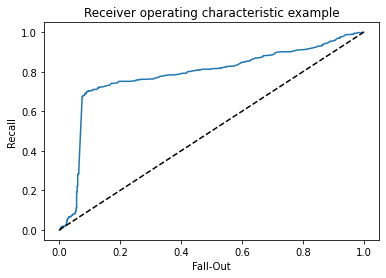

0.7805788982259572
0  1  3
c : 33.3280625, loggamma : -2.0833203125, kernel : rbf
accuracy 0.8172992056487202


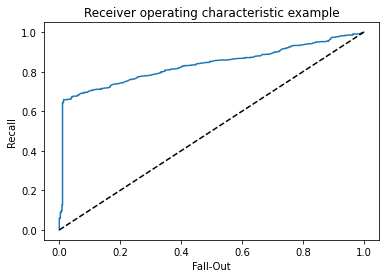

0.781414994720169
c : 33.3280625, loggamma : -2.0833203125, kernel : rbf
accuracy 0.8190644307149162


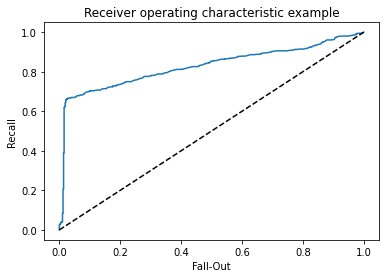

0.7835269271383316
c : 33.3280625, loggamma : -2.0833203125, kernel : rbf
accuracy 0.8164165931156222


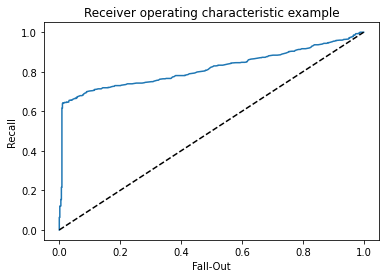

0.7709251101321586
c : 33.3280625, loggamma : -2.0833203125, kernel : rbf
accuracy 0.8190644307149162


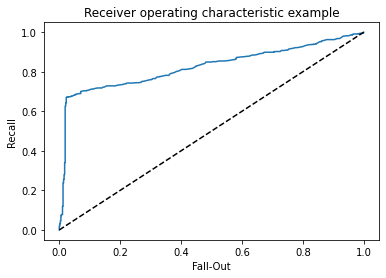

0.7839831401475238
c : 33.3280625, loggamma : -2.0833203125, kernel : rbf
accuracy 0.8049426301853486


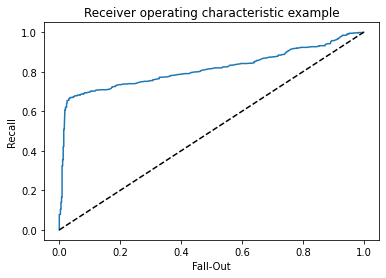

0.7751780264496441
0  1  4
c : 10.0000625, loggamma : 2.7766796875, kernel : rbf
accuracy 0.793468667255075


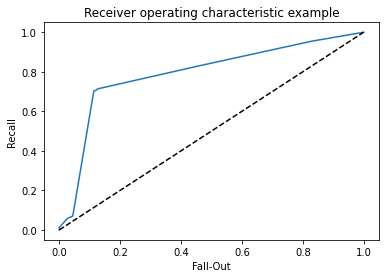

0.7762906309751433
c : 10.0000625, loggamma : 2.7766796875, kernel : rbf
accuracy 0.7855251544571933


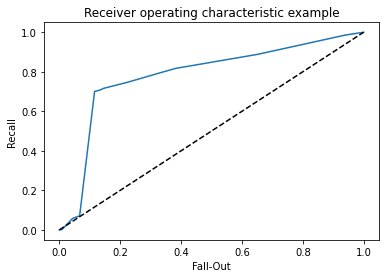

0.7687916270218839
c : 10.0000625, loggamma : 2.7766796875, kernel : rbf
accuracy 0.7917034421888791


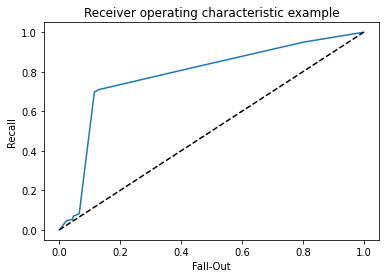

0.7686274509803921
c : 10.0000625, loggamma : 2.7766796875, kernel : rbf
accuracy 0.8022947925860547


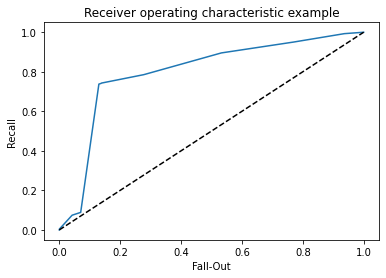

0.7890772128060264
c : 10.0000625, loggamma : 2.7766796875, kernel : rbf
accuracy 0.793468667255075


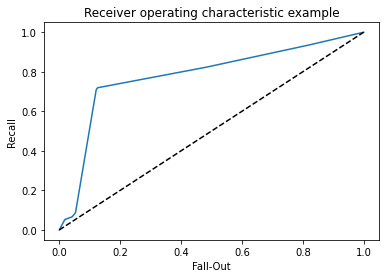

0.7833333333333333
0  1  5
c : 13.0000625, loggamma : -2.7083203125, kernel : rbf
accuracy 0.8172992056487202


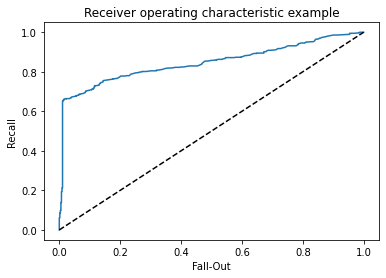

0.7804878048780487
c : 13.0000625, loggamma : -2.7083203125, kernel : rbf
accuracy 0.8164165931156222


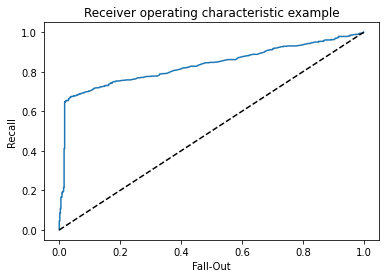

0.7801268498942917
c : 13.0000625, loggamma : -2.7083203125, kernel : rbf
accuracy 0.8111209179170344


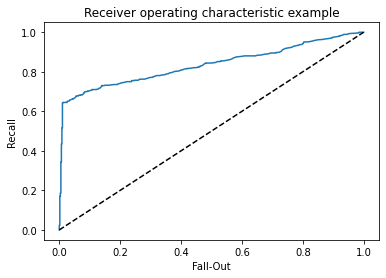

0.762749445676275
c : 13.0000625, loggamma : -2.7083203125, kernel : rbf
accuracy 0.8199470432480142


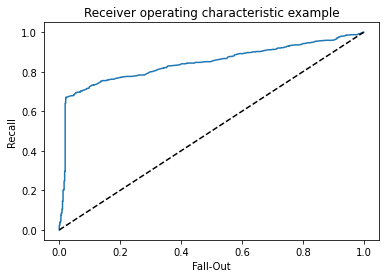

0.7848101265822784
c : 13.0000625, loggamma : -2.7083203125, kernel : rbf
accuracy 0.8005295675198588


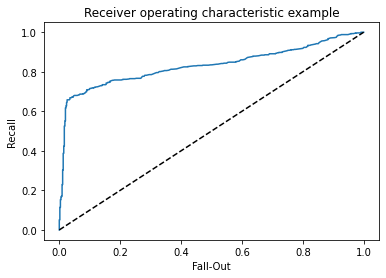

0.7684426229508198
0  1  6
c : 36.3280625, loggamma : 2.1516796875, kernel : rbf
accuracy 0.793468667255075


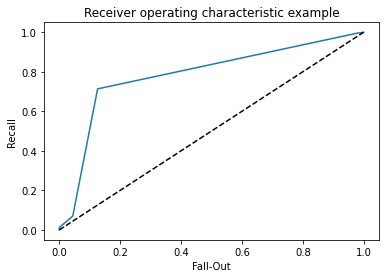

0.7762906309751433
c : 36.3280625, loggamma : 2.1516796875, kernel : rbf
accuracy 0.7855251544571933


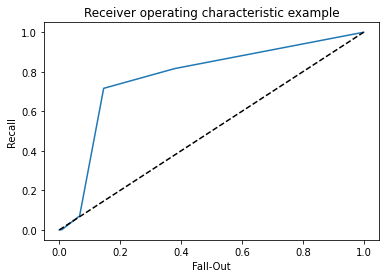

0.7687916270218839
c : 36.3280625, loggamma : 2.1516796875, kernel : rbf
accuracy 0.7917034421888791


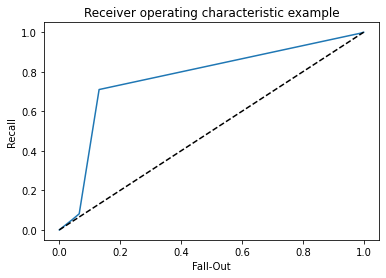

0.7686274509803921
c : 36.3280625, loggamma : 2.1516796875, kernel : rbf
accuracy 0.8022947925860547


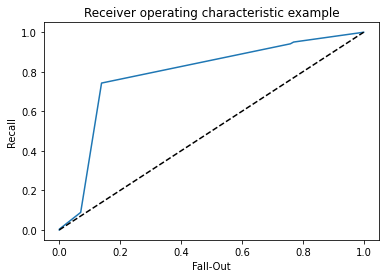

0.7890772128060264
c : 36.3280625, loggamma : 2.1516796875, kernel : rbf
accuracy 0.793468667255075


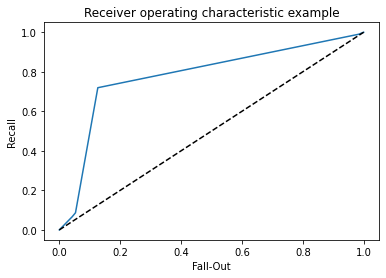

0.7833333333333333
0  1  7
c : 48.3280625, loggamma : -0.3483203125, kernel : rbf
accuracy 0.8049426301853486


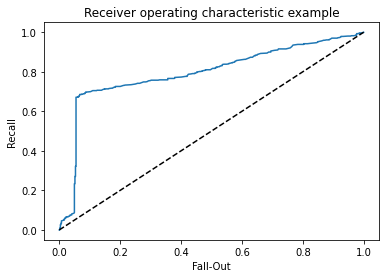

0.7760891590678825
c : 48.3280625, loggamma : -0.3483203125, kernel : rbf
accuracy 0.7996469549867609


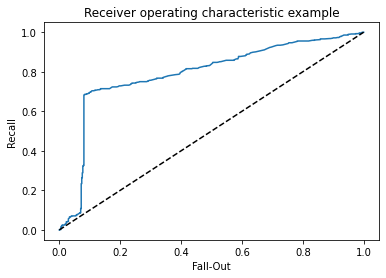

0.773678963110668
c : 48.3280625, loggamma : -0.3483203125, kernel : rbf
accuracy 0.8075904677846425


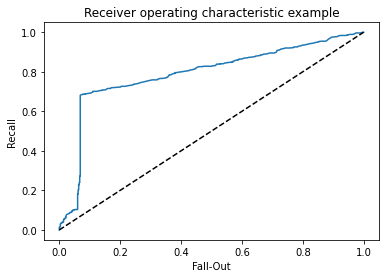

0.7761806981519508
c : 48.3280625, loggamma : -0.3483203125, kernel : rbf
accuracy 0.8049426301853486


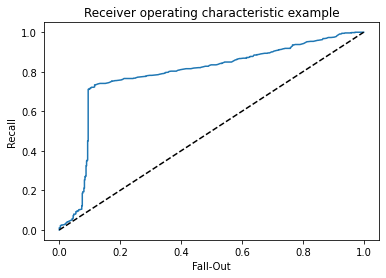

0.7864734299516908
c : 48.3280625, loggamma : -0.3483203125, kernel : rbf
accuracy 0.7925860547219771


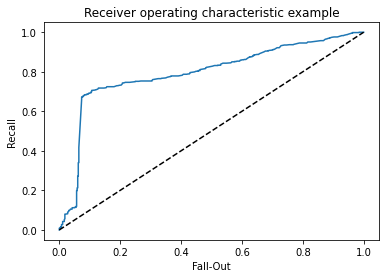

0.7755491881566381
0  1  8
c : 24.3280625, loggamma : 4.6516796875, kernel : rbf
accuracy 0.793468667255075


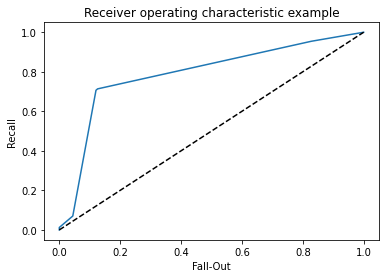

0.7762906309751433
c : 24.3280625, loggamma : 4.6516796875, kernel : rbf
accuracy 0.7855251544571933


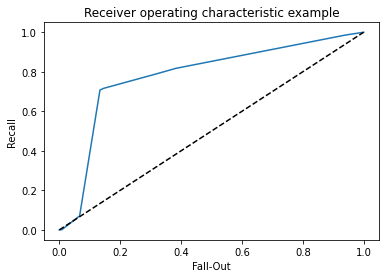

0.7687916270218839
c : 24.3280625, loggamma : 4.6516796875, kernel : rbf
accuracy 0.7917034421888791


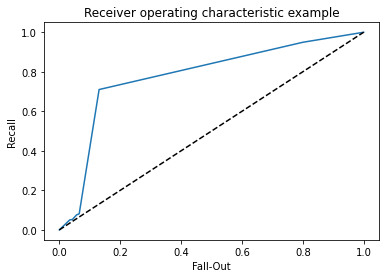

0.7686274509803921
c : 24.3280625, loggamma : 4.6516796875, kernel : rbf
accuracy 0.8022947925860547


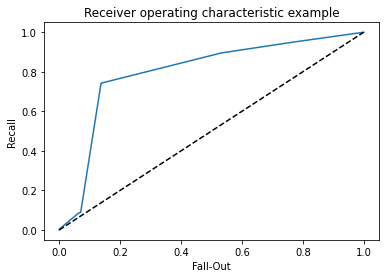

0.7890772128060264
c : 24.3280625, loggamma : 4.6516796875, kernel : rbf
accuracy 0.793468667255075


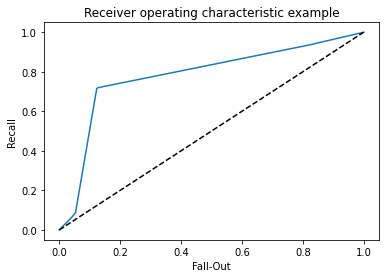

0.7833333333333333
0  1  9
c : 19.0000625, loggamma : -1.4583203125, kernel : rbf
accuracy 0.8137687555163283


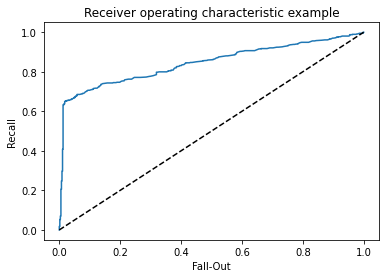

0.7771911298838438
c : 19.0000625, loggamma : -1.4583203125, kernel : rbf
accuracy 0.8181818181818182


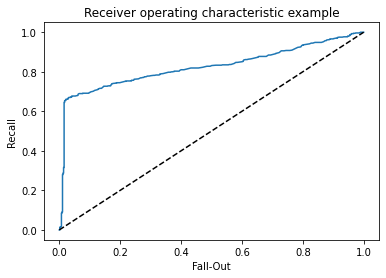

0.7836134453781513
c : 19.0000625, loggamma : -1.4583203125, kernel : rbf
accuracy 0.8181818181818182


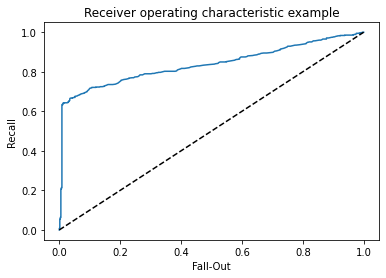

0.7741228070175438
c : 19.0000625, loggamma : -1.4583203125, kernel : rbf
accuracy 0.822594880847308


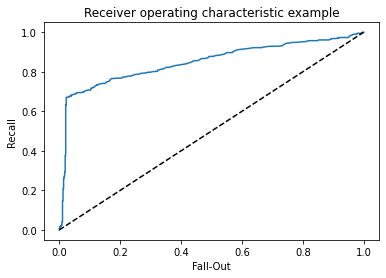

0.789087093389297
c : 19.0000625, loggamma : -1.4583203125, kernel : rbf
accuracy 0.8049426301853486


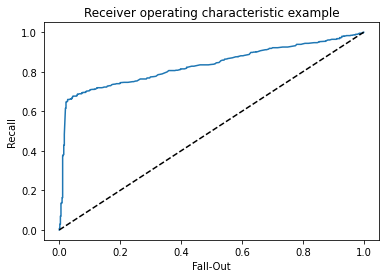

0.7747196738022426
0  1  10
c : 42.3280625, loggamma : 3.4016796875, kernel : rbf
accuracy 0.793468667255075


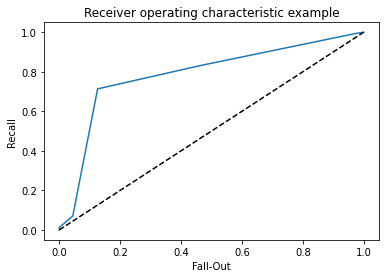

0.7762906309751433
c : 42.3280625, loggamma : 3.4016796875, kernel : rbf
accuracy 0.7855251544571933


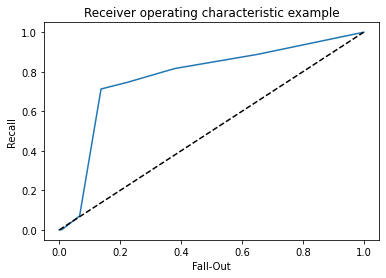

0.7687916270218839
c : 42.3280625, loggamma : 3.4016796875, kernel : rbf
accuracy 0.7917034421888791


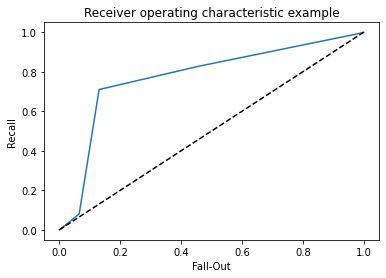

0.7686274509803921
c : 42.3280625, loggamma : 3.4016796875, kernel : rbf
accuracy 0.8022947925860547


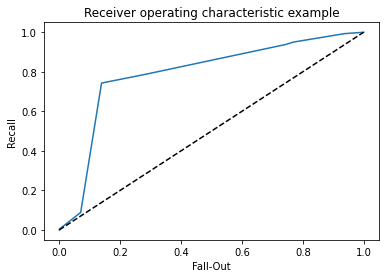

0.7890772128060264
c : 42.3280625, loggamma : 3.4016796875, kernel : rbf
accuracy 0.793468667255075


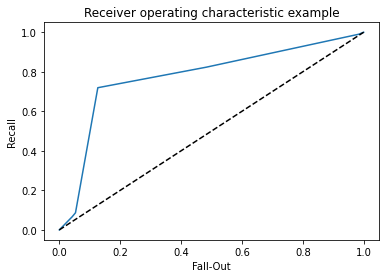

0.7833333333333333
0  1  11
c : 30.3280625, loggamma : -3.9583203125, kernel : rbf
accuracy 0.8172992056487202


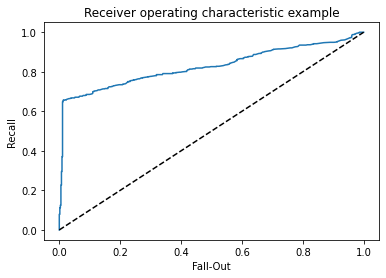

0.7804878048780487
c : 30.3280625, loggamma : -3.9583203125, kernel : rbf
accuracy 0.8181818181818182


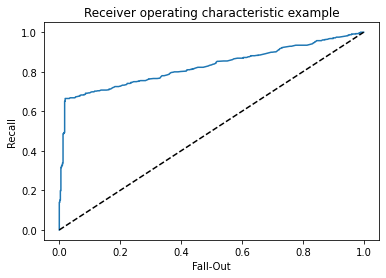

0.7817796610169491
c : 30.3280625, loggamma : -3.9583203125, kernel : rbf
accuracy 0.8111209179170344


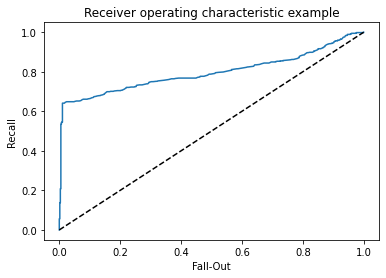

0.762749445676275
c : 30.3280625, loggamma : -3.9583203125, kernel : rbf
accuracy 0.8208296557811121


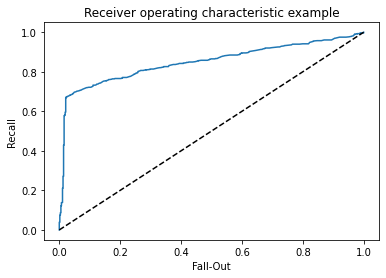

0.7860906217070602
c : 30.3280625, loggamma : -3.9583203125, kernel : rbf
accuracy 0.8005295675198588


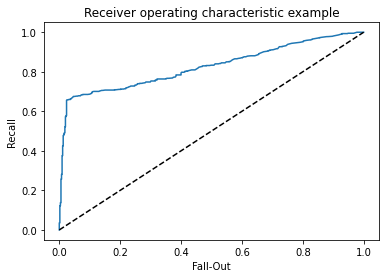

0.7684426229508198
0  1  12
c : 7.0000625, loggamma : 0.9016796875, kernel : rbf
accuracy 0.793468667255075


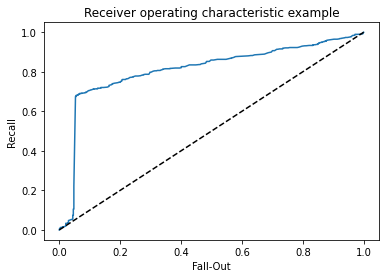

0.7762906309751433
c : 7.0000625, loggamma : 0.9016796875, kernel : rbf
accuracy 0.7855251544571933


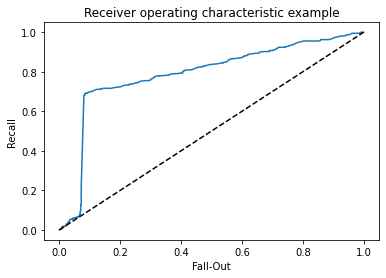

0.7687916270218839
c : 7.0000625, loggamma : 0.9016796875, kernel : rbf
accuracy 0.7917034421888791


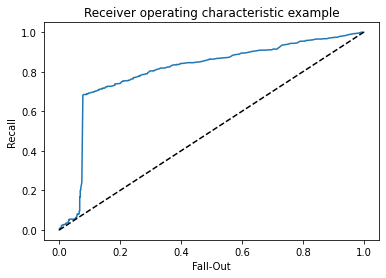

0.7686274509803921
c : 7.0000625, loggamma : 0.9016796875, kernel : rbf
accuracy 0.8022947925860547


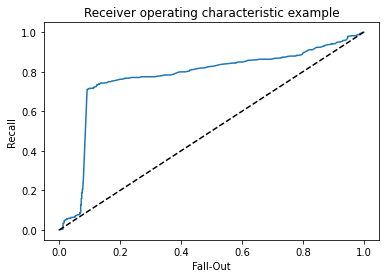

0.7890772128060264
c : 7.0000625, loggamma : 0.9016796875, kernel : rbf
accuracy 0.793468667255075


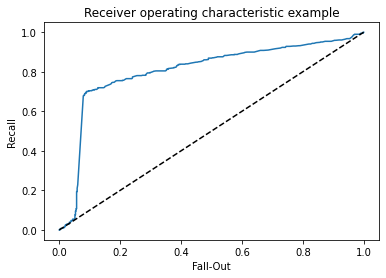

0.7833333333333333
0  1  13
c : 5.5000625, loggamma : -4.2708203125, kernel : rbf
accuracy 0.8164165931156222


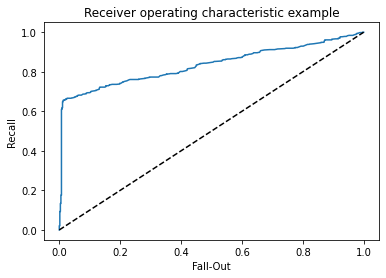

0.7791932059447982
c : 5.5000625, loggamma : -4.2708203125, kernel : rbf
accuracy 0.8190644307149162


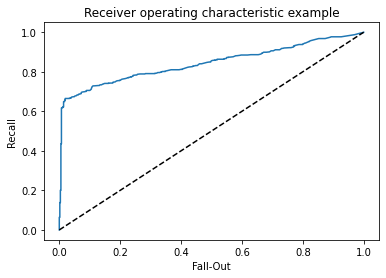

0.782608695652174
c : 5.5000625, loggamma : -4.2708203125, kernel : rbf
accuracy 0.8120035304501324


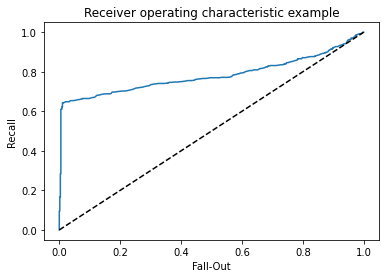

0.7635960044395117
c : 5.5000625, loggamma : -4.2708203125, kernel : rbf
accuracy 0.8181818181818182


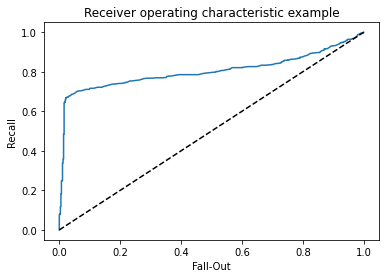

0.7817796610169491
c : 5.5000625, loggamma : -4.2708203125, kernel : rbf
accuracy 0.8005295675198588


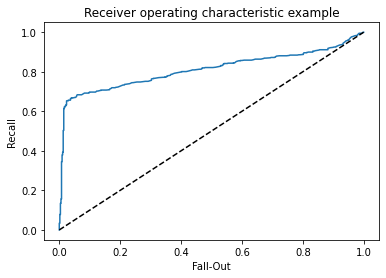

0.7684426229508198
0  1  14
c : 28.8280625, loggamma : 0.5891796875, kernel : rbf
accuracy 0.793468667255075


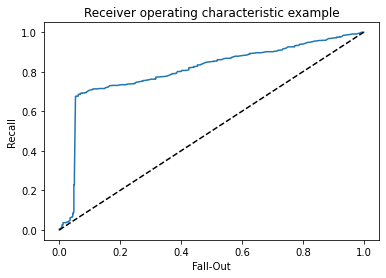

0.7762906309751433
c : 28.8280625, loggamma : 0.5891796875, kernel : rbf
accuracy 0.7855251544571933


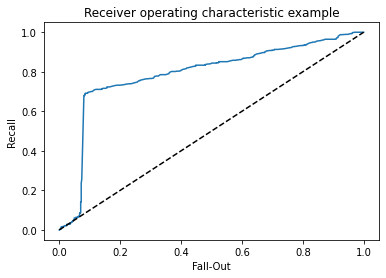

0.7687916270218839
c : 28.8280625, loggamma : 0.5891796875, kernel : rbf
accuracy 0.7917034421888791


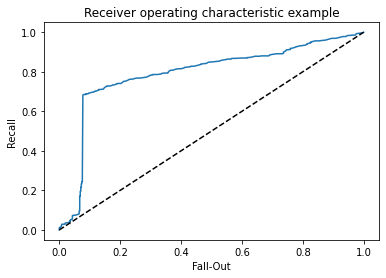

0.7686274509803921
c : 28.8280625, loggamma : 0.5891796875, kernel : rbf
accuracy 0.8022947925860547


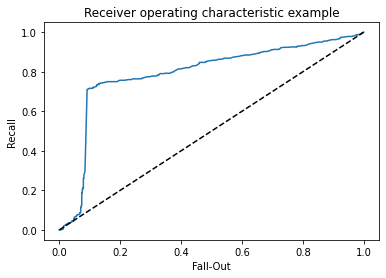

0.7890772128060264
c : 28.8280625, loggamma : 0.5891796875, kernel : rbf
accuracy 0.793468667255075


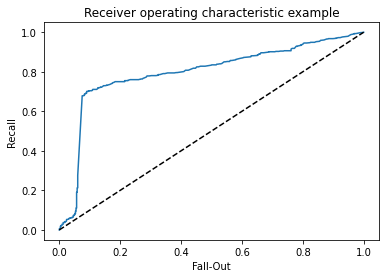

0.7833333333333333
0  1  15
c : 40.8280625, loggamma : -1.7708203125, kernel : rbf
accuracy 0.8137687555163283


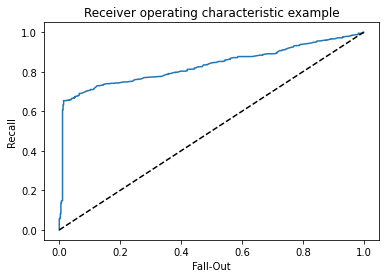

0.7762460233297985
c : 40.8280625, loggamma : -1.7708203125, kernel : rbf
accuracy 0.8181818181818182


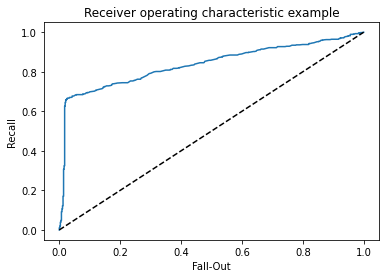

0.7827004219409283
c : 40.8280625, loggamma : -1.7708203125, kernel : rbf
accuracy 0.8164165931156222


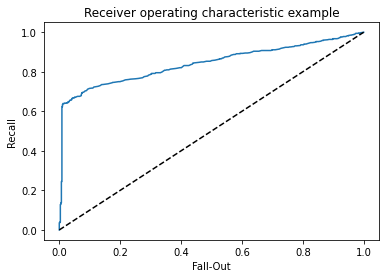

0.7714285714285716
c : 40.8280625, loggamma : -1.7708203125, kernel : rbf
accuracy 0.8208296557811121


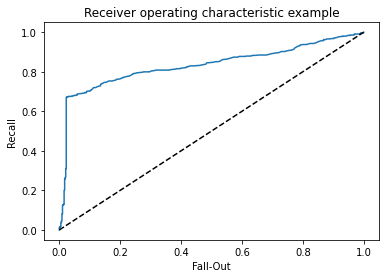

0.786540483701367
c : 40.8280625, loggamma : -1.7708203125, kernel : rbf
accuracy 0.8049426301853486


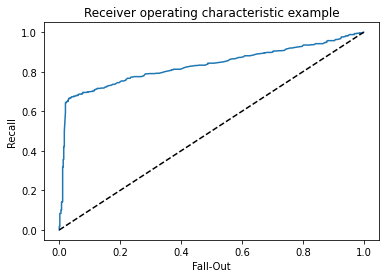

0.7756345177664975
0  1  16
c : 17.5000625, loggamma : 3.0891796875, kernel : rbf
accuracy 0.793468667255075


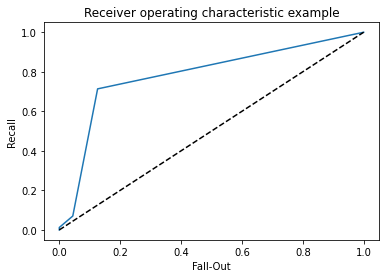

0.7762906309751433
c : 17.5000625, loggamma : 3.0891796875, kernel : rbf
accuracy 0.7855251544571933


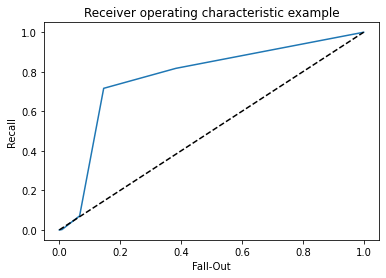

0.7687916270218839
c : 17.5000625, loggamma : 3.0891796875, kernel : rbf
accuracy 0.7917034421888791


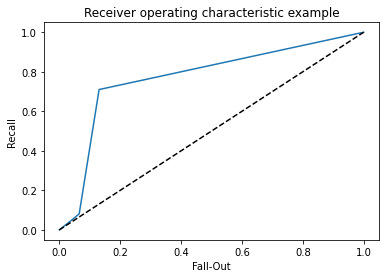

0.7686274509803921
c : 17.5000625, loggamma : 3.0891796875, kernel : rbf
accuracy 0.8022947925860547


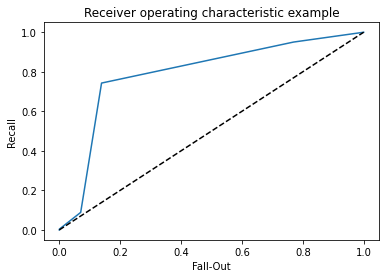

0.7890772128060264
c : 17.5000625, loggamma : 3.0891796875, kernel : rbf
accuracy 0.793468667255075


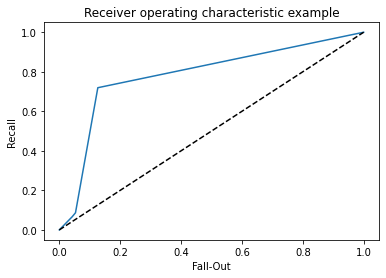

0.7833333333333333
0  1  17
c : 22.97589604341247, loggamma : -0.6307472829760085, kernel : rbf
accuracy 0.8111209179170344


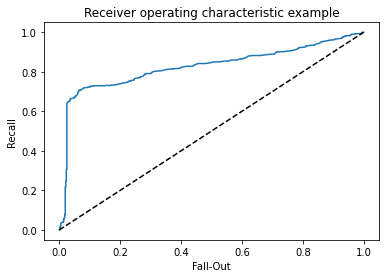

0.7798353909465021
c : 22.97589604341247, loggamma : -0.6307472829760085, kernel : rbf
accuracy 0.8084730803177406


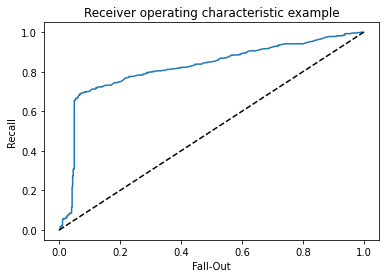

0.7805864509605662
c : 22.97589604341247, loggamma : -0.6307472829760085, kernel : rbf
accuracy 0.8146513680494263


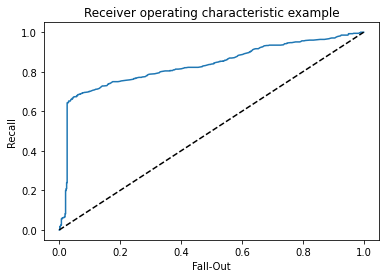

0.7775423728813559
c : 22.97589604341247, loggamma : -0.6307472829760085, kernel : rbf
accuracy 0.8164165931156222


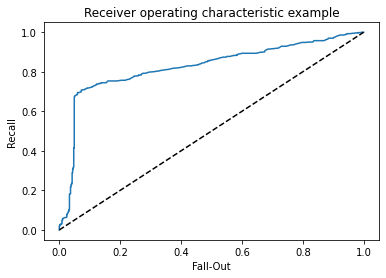

0.7932405566600398
c : 22.97589604341247, loggamma : -0.6307472829760085, kernel : rbf
accuracy 0.8005295675198588


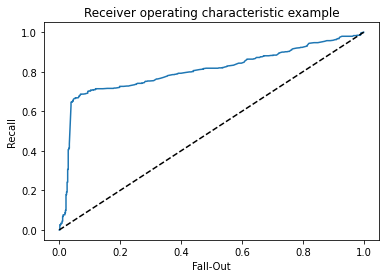

0.7757936507936508
0  1  18
c : 46.8280625, loggamma : 4.3391796875, kernel : rbf
accuracy 0.793468667255075


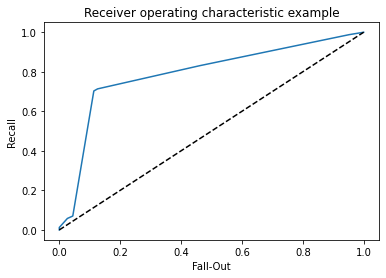

0.7762906309751433
c : 46.8280625, loggamma : 4.3391796875, kernel : rbf
accuracy 0.7855251544571933


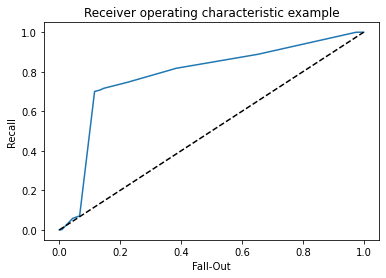

0.7687916270218839
c : 46.8280625, loggamma : 4.3391796875, kernel : rbf
accuracy 0.7917034421888791


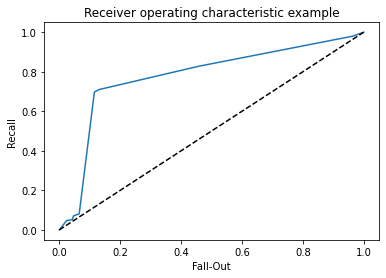

0.7686274509803921
c : 46.8280625, loggamma : 4.3391796875, kernel : rbf
accuracy 0.8022947925860547


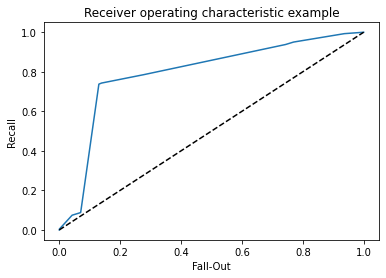

0.7890772128060264
c : 46.8280625, loggamma : 4.3391796875, kernel : rbf
accuracy 0.793468667255075


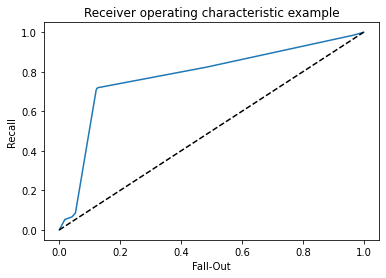

0.7833333333333333
0  1  19
c : 38.9920625, loggamma : -3.2633203125000003, kernel : rbf
accuracy 0.8172992056487202


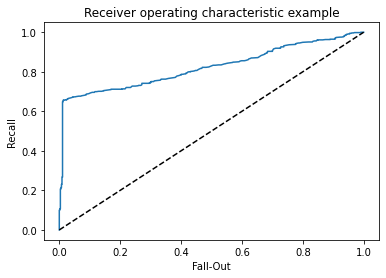

0.7804878048780487
c : 38.9920625, loggamma : -3.2633203125000003, kernel : rbf
accuracy 0.8172992056487202


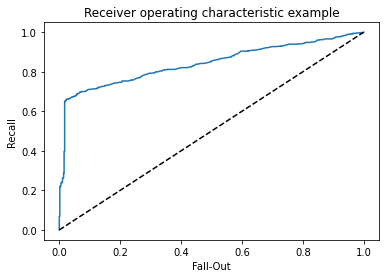

0.7804878048780488
c : 38.9920625, loggamma : -3.2633203125000003, kernel : rbf
accuracy 0.8111209179170344


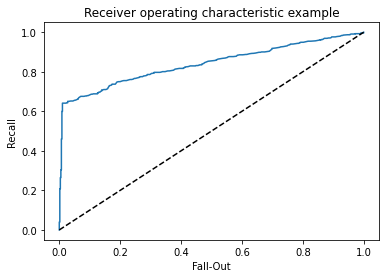

0.762749445676275
c : 38.9920625, loggamma : -3.2633203125000003, kernel : rbf
accuracy 0.8199470432480142


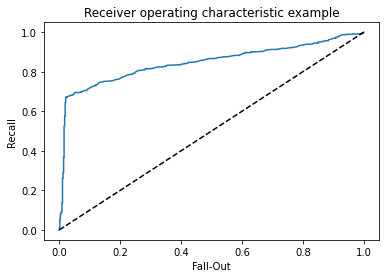

0.7848101265822784
c : 38.9920625, loggamma : -3.2633203125000003, kernel : rbf
accuracy 0.8005295675198588


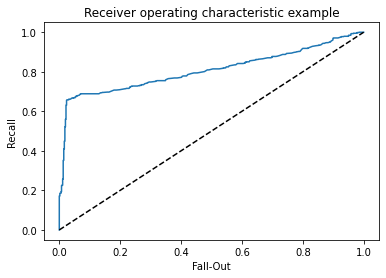

0.7684426229508198
0  2  0
c : 16.336062499999997, loggamma : 1.4566796874999999, kernel : rbf
accuracy 0.793468667255075


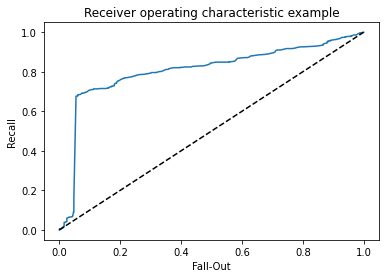

0.7762906309751433
c : 16.336062499999997, loggamma : 1.4566796874999999, kernel : rbf
accuracy 0.7855251544571933


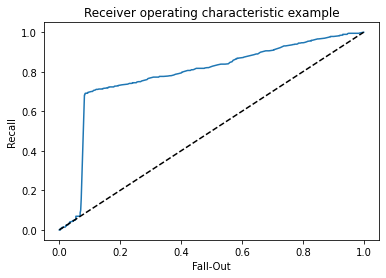

0.7687916270218839
c : 16.336062499999997, loggamma : 1.4566796874999999, kernel : rbf
accuracy 0.7917034421888791


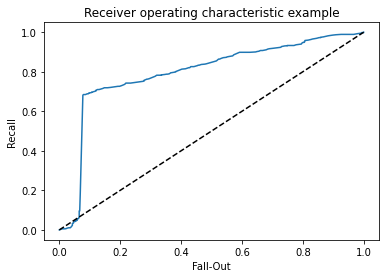

0.7686274509803921
c : 16.336062499999997, loggamma : 1.4566796874999999, kernel : rbf
accuracy 0.8022947925860547


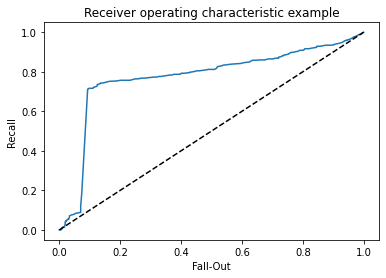

0.7890772128060264
c : 16.336062499999997, loggamma : 1.4566796874999999, kernel : rbf
accuracy 0.793468667255075


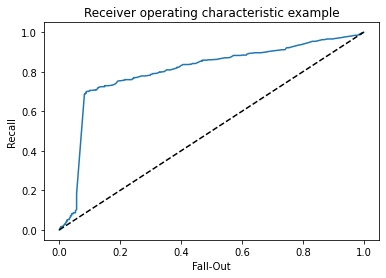

0.7833333333333333
0  2  1
c : 22.336062499999997, loggamma : -4.513320312499999, kernel : rbf
accuracy 0.8172992056487202


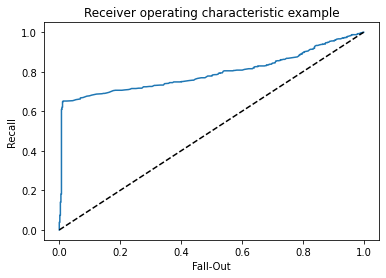

0.7804878048780487
c : 22.336062499999997, loggamma : -4.513320312499999, kernel : rbf
accuracy 0.8181818181818182


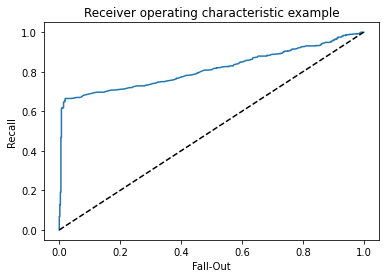

0.7817796610169491
c : 22.336062499999997, loggamma : -4.513320312499999, kernel : rbf
accuracy 0.8128861429832304


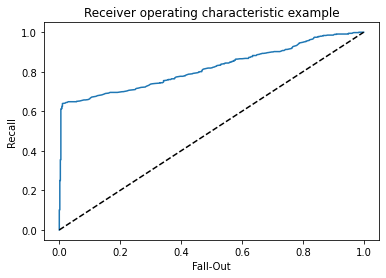

0.7654867256637169
c : 22.336062499999997, loggamma : -4.513320312499999, kernel : rbf
accuracy 0.8199470432480142


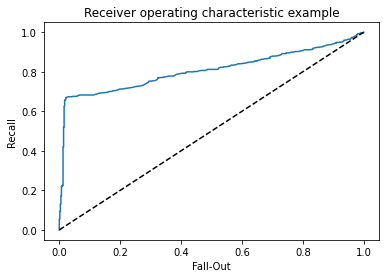

0.7848101265822784
c : 22.336062499999997, loggamma : -4.513320312499999, kernel : rbf
accuracy 0.8005295675198588


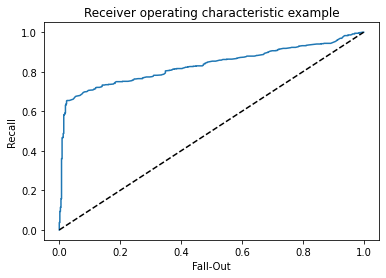

0.7684426229508198
0  2  2
c : 44.9920625, loggamma : 0.2066796875, kernel : rbf
accuracy 0.8014121800529568


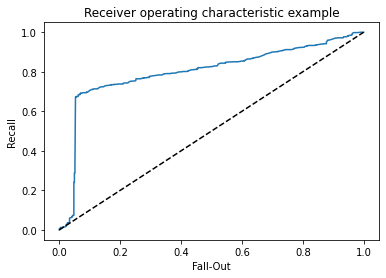

0.7791952894995093
c : 44.9920625, loggamma : 0.2066796875, kernel : rbf
accuracy 0.7969991173874669


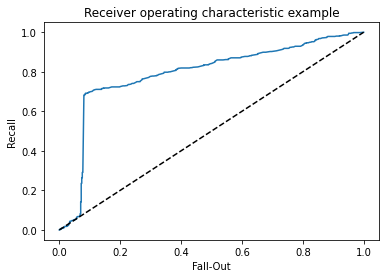

0.7766990291262136
c : 44.9920625, loggamma : 0.2066796875, kernel : rbf
accuracy 0.7978817299205648


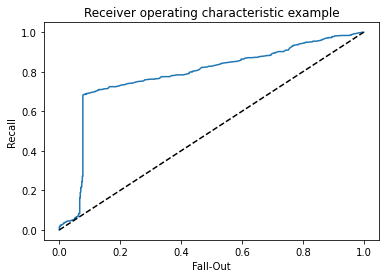

0.7703109327983951
c : 44.9920625, loggamma : 0.2066796875, kernel : rbf
accuracy 0.8040600176522507


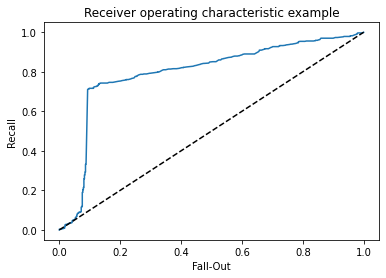

0.7893738140417457
c : 44.9920625, loggamma : 0.2066796875, kernel : rbf
accuracy 0.795233892321271


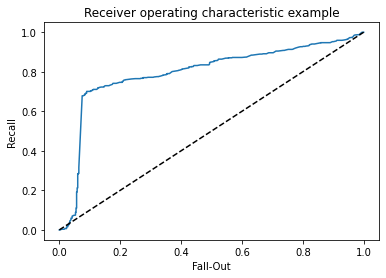

0.7811320754716982
0  2  3
c : 32.9920625, loggamma : -2.0133203125000003, kernel : rbf
accuracy 0.8172992056487202


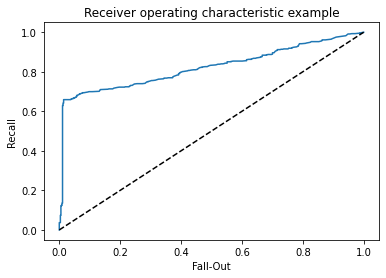

0.781414994720169
c : 32.9920625, loggamma : -2.0133203125000003, kernel : rbf
accuracy 0.8181818181818182


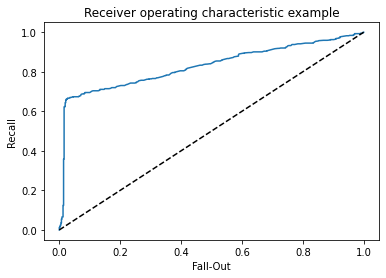

0.7827004219409283
c : 32.9920625, loggamma : -2.0133203125000003, kernel : rbf
accuracy 0.8181818181818182


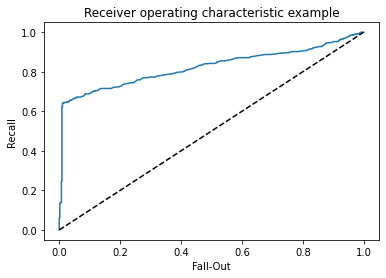

0.7736263736263735
c : 32.9920625, loggamma : -2.0133203125000003, kernel : rbf
accuracy 0.8190644307149162


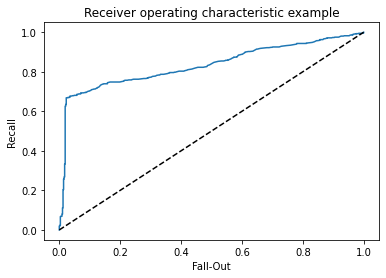

0.7839831401475238
c : 32.9920625, loggamma : -2.0133203125000003, kernel : rbf
accuracy 0.8049426301853486


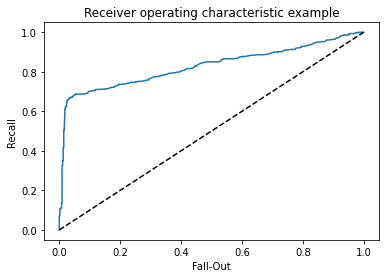

0.7751780264496441
0  2  4
c : 10.3360625, loggamma : 2.7066796875000003, kernel : rbf
accuracy 0.793468667255075


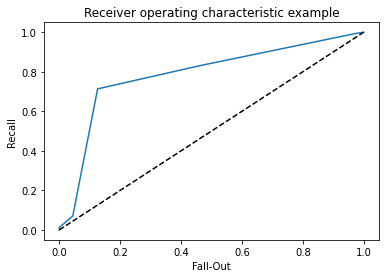

0.7762906309751433
c : 10.3360625, loggamma : 2.7066796875000003, kernel : rbf
accuracy 0.7855251544571933


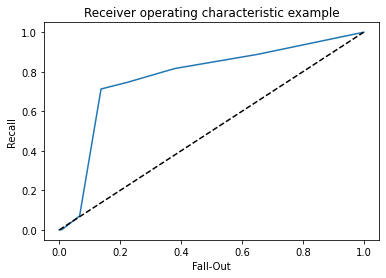

0.7687916270218839
c : 10.3360625, loggamma : 2.7066796875000003, kernel : rbf
accuracy 0.7917034421888791


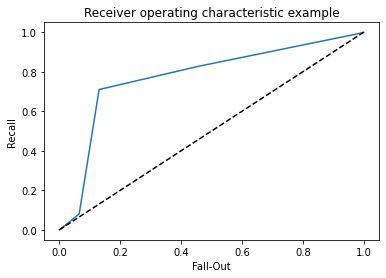

0.7686274509803921
c : 10.3360625, loggamma : 2.7066796875000003, kernel : rbf
accuracy 0.8022947925860547


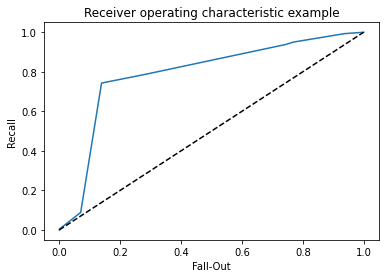

0.7890772128060264
c : 10.3360625, loggamma : 2.7066796875000003, kernel : rbf
accuracy 0.793468667255075


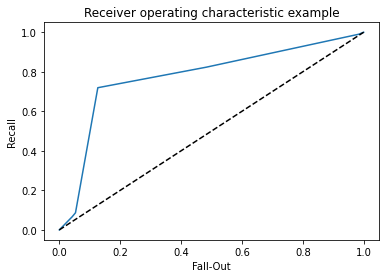

0.7833333333333333
0  2  5
c : 13.3360625, loggamma : -2.6383203125000003, kernel : rbf
accuracy 0.8172992056487202


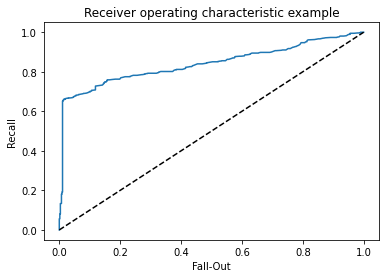

0.7804878048780487
c : 13.3360625, loggamma : -2.6383203125000003, kernel : rbf
accuracy 0.8164165931156222


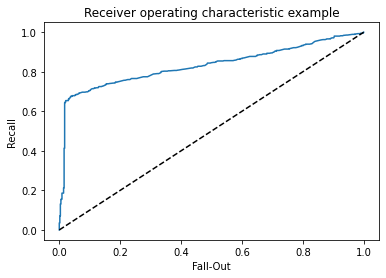

0.7801268498942917
c : 13.3360625, loggamma : -2.6383203125000003, kernel : rbf
accuracy 0.8120035304501324


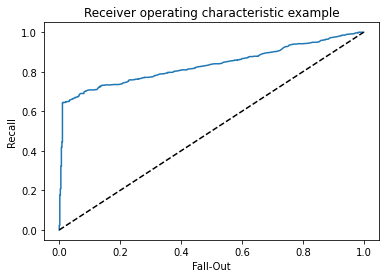

0.7641196013289036
c : 13.3360625, loggamma : -2.6383203125000003, kernel : rbf
accuracy 0.8199470432480142


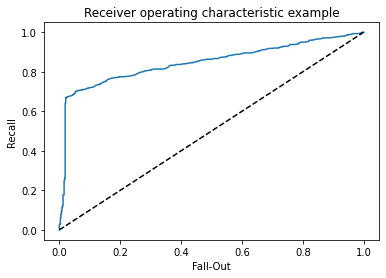

0.7848101265822784
c : 13.3360625, loggamma : -2.6383203125000003, kernel : rbf
accuracy 0.7996469549867609


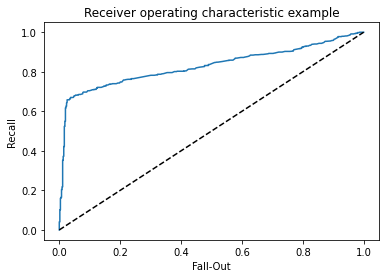

0.7671794871794873
0  2  6
c : 35.9920625, loggamma : 2.0816796875000003, kernel : rbf
accuracy 0.793468667255075


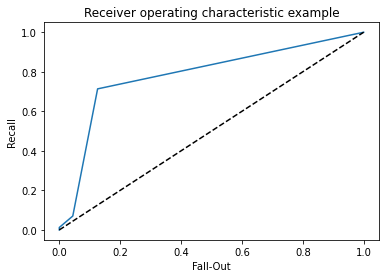

0.7762906309751433
c : 35.9920625, loggamma : 2.0816796875000003, kernel : rbf
accuracy 0.7855251544571933


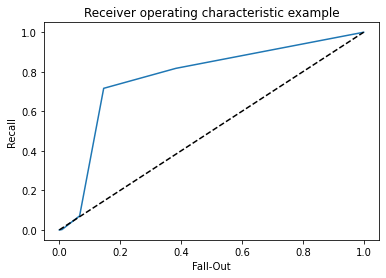

0.7687916270218839
c : 35.9920625, loggamma : 2.0816796875000003, kernel : rbf
accuracy 0.7917034421888791


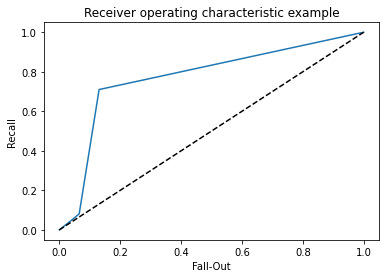

0.7686274509803921
c : 35.9920625, loggamma : 2.0816796875000003, kernel : rbf
accuracy 0.8022947925860547


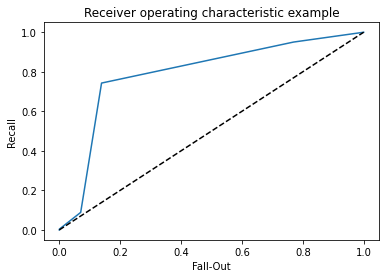

0.7890772128060264
c : 35.9920625, loggamma : 2.0816796875000003, kernel : rbf
accuracy 0.793468667255075


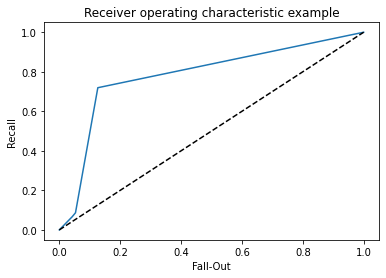

0.7833333333333333
0  2  7
c : 47.9920625, loggamma : -0.4183203125, kernel : rbf
accuracy 0.8067078552515445


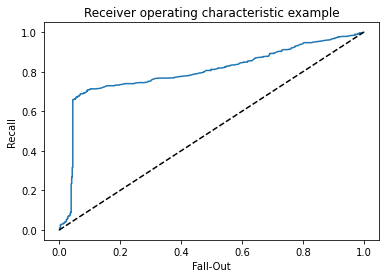

0.7781155015197568
c : 47.9920625, loggamma : -0.4183203125, kernel : rbf
accuracy 0.8040600176522507


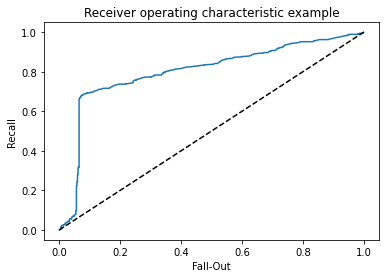

0.7771084337349398
c : 47.9920625, loggamma : -0.4183203125, kernel : rbf
accuracy 0.8058252427184466


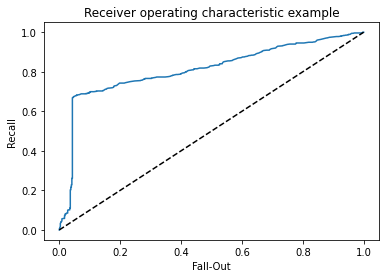

0.7755102040816327
c : 47.9920625, loggamma : -0.4183203125, kernel : rbf
accuracy 0.8049426301853486


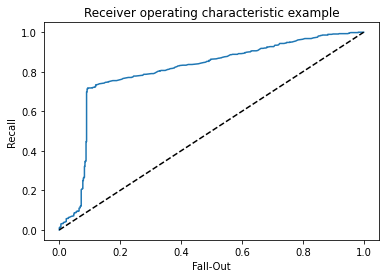

0.7864734299516908
c : 47.9920625, loggamma : -0.4183203125, kernel : rbf
accuracy 0.795233892321271


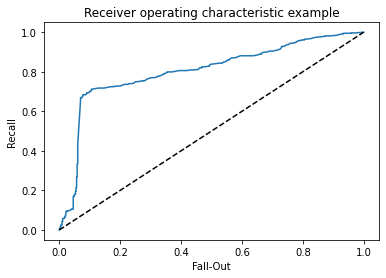

0.7773512476007678
0  2  8
c : 23.992062500000003, loggamma : 4.581679687499999, kernel : rbf
accuracy 0.793468667255075


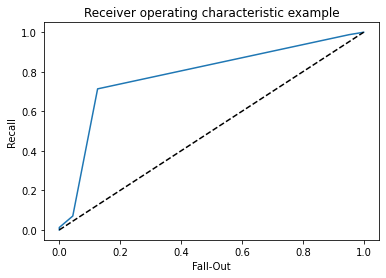

0.7762906309751433
c : 23.992062500000003, loggamma : 4.581679687499999, kernel : rbf
accuracy 0.7855251544571933


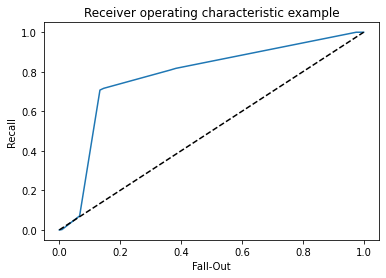

0.7687916270218839
c : 23.992062500000003, loggamma : 4.581679687499999, kernel : rbf
accuracy 0.7917034421888791


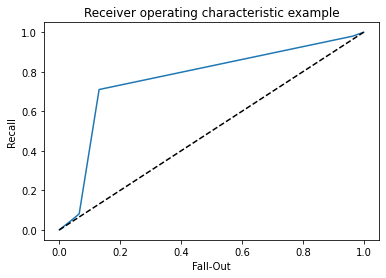

0.7686274509803921
c : 23.992062500000003, loggamma : 4.581679687499999, kernel : rbf
accuracy 0.8022947925860547


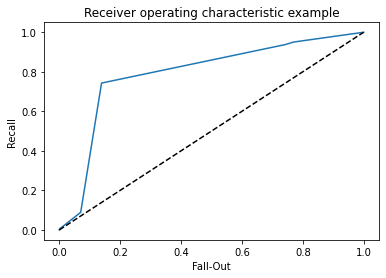

0.7890772128060264
c : 23.992062500000003, loggamma : 4.581679687499999, kernel : rbf
accuracy 0.793468667255075


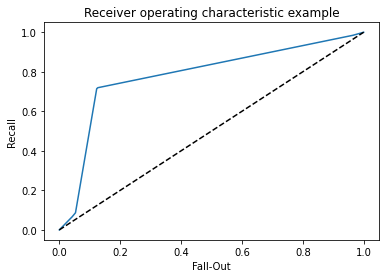

0.7833333333333333
0  2  9
c : 19.336062499999997, loggamma : -1.3883203124999999, kernel : rbf
accuracy 0.8128861429832304


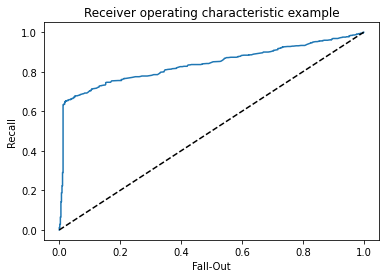

0.7758985200845666
c : 19.336062499999997, loggamma : -1.3883203124999999, kernel : rbf
accuracy 0.8181818181818182


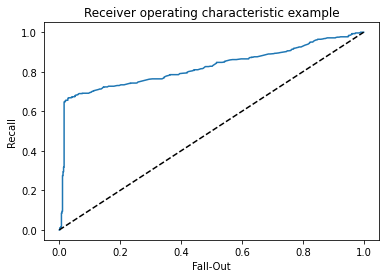

0.7840670859538784
c : 19.336062499999997, loggamma : -1.3883203124999999, kernel : rbf
accuracy 0.8181818181818182


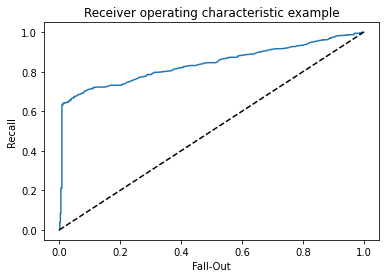

0.7741228070175438
c : 19.336062499999997, loggamma : -1.3883203124999999, kernel : rbf
accuracy 0.822594880847308


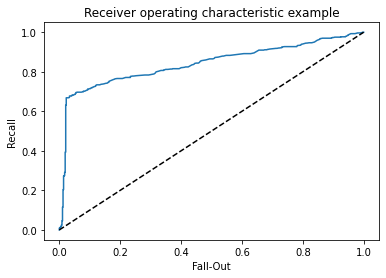

0.789087093389297
c : 19.336062499999997, loggamma : -1.3883203124999999, kernel : rbf
accuracy 0.8049426301853486


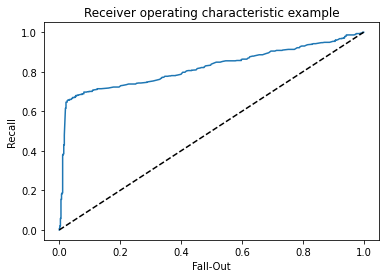

0.7747196738022426
0  2  10
c : 41.9920625, loggamma : 3.3316796875000003, kernel : rbf
accuracy 0.793468667255075


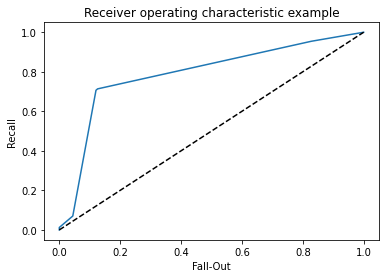

0.7762906309751433
c : 41.9920625, loggamma : 3.3316796875000003, kernel : rbf
accuracy 0.7855251544571933


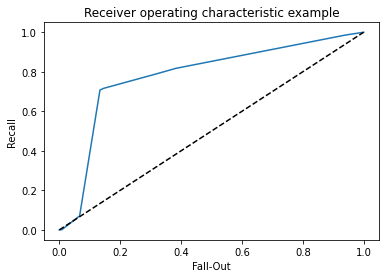

0.7687916270218839
c : 41.9920625, loggamma : 3.3316796875000003, kernel : rbf
accuracy 0.7917034421888791


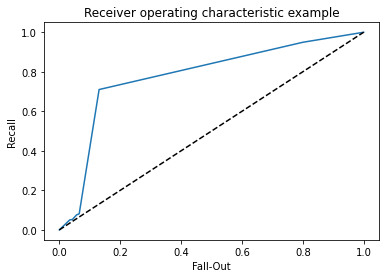

0.7686274509803921
c : 41.9920625, loggamma : 3.3316796875000003, kernel : rbf
accuracy 0.8022947925860547


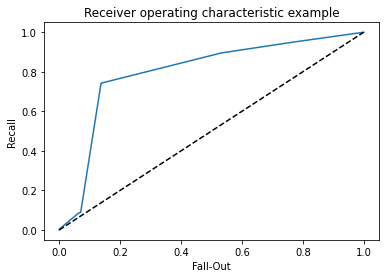

0.7890772128060264
c : 41.9920625, loggamma : 3.3316796875000003, kernel : rbf
accuracy 0.793468667255075


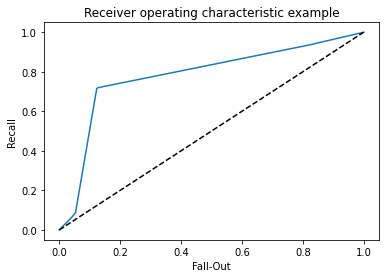

0.7833333333333333
0  2  11
c : 29.992062500000003, loggamma : -3.8883203125000003, kernel : rbf
accuracy 0.8172992056487202


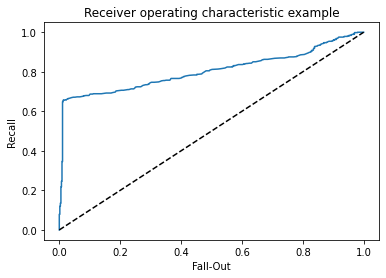

0.7804878048780487
c : 29.992062500000003, loggamma : -3.8883203125000003, kernel : rbf
accuracy 0.8181818181818182


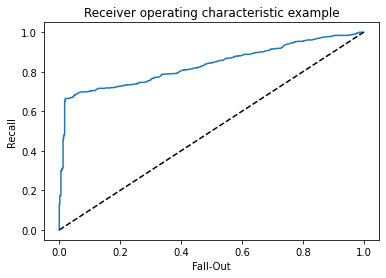

0.7817796610169491
c : 29.992062500000003, loggamma : -3.8883203125000003, kernel : rbf
accuracy 0.8111209179170344


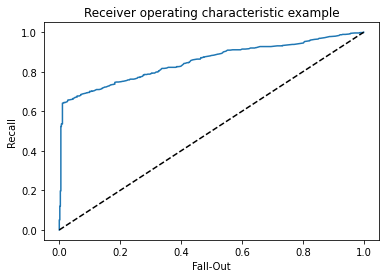

0.762749445676275
c : 29.992062500000003, loggamma : -3.8883203125000003, kernel : rbf
accuracy 0.8208296557811121


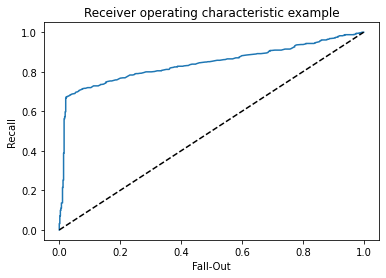

0.7860906217070602
c : 29.992062500000003, loggamma : -3.8883203125000003, kernel : rbf
accuracy 0.8005295675198588


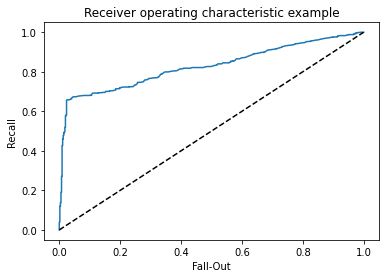

0.7684426229508198
0  2  12
c : 7.336062500000001, loggamma : 0.8316796875000001, kernel : rbf
accuracy 0.793468667255075


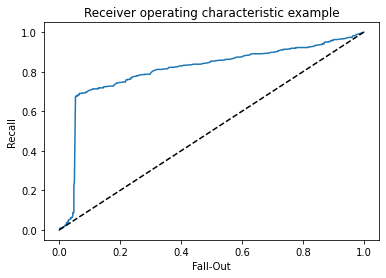

0.7762906309751433
c : 7.336062500000001, loggamma : 0.8316796875000001, kernel : rbf
accuracy 0.7855251544571933


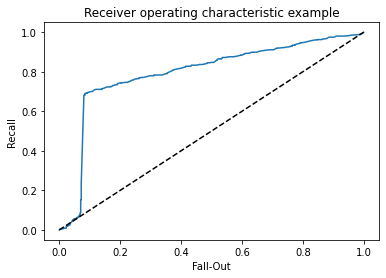

0.7687916270218839
c : 7.336062500000001, loggamma : 0.8316796875000001, kernel : rbf
accuracy 0.7917034421888791


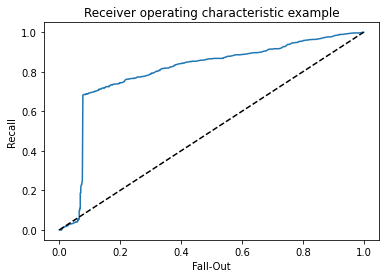

0.7686274509803921
c : 7.336062500000001, loggamma : 0.8316796875000001, kernel : rbf
accuracy 0.8022947925860547


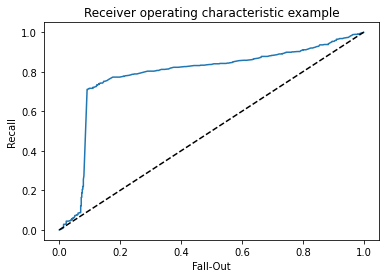

0.7890772128060264
c : 7.336062500000001, loggamma : 0.8316796875000001, kernel : rbf
accuracy 0.793468667255075


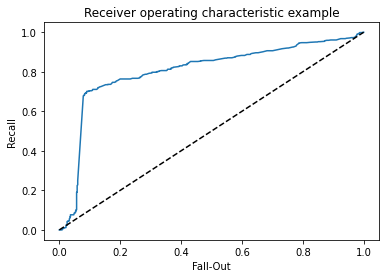

0.7833333333333333
0  2  13
c : 5.836062500000001, loggamma : -4.200820312499999, kernel : rbf
accuracy 0.8172992056487202


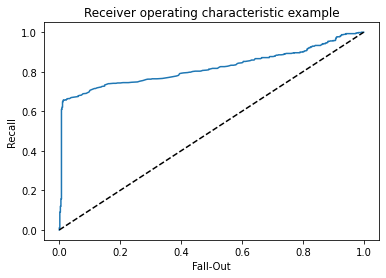

0.7804878048780487
c : 5.836062500000001, loggamma : -4.200820312499999, kernel : rbf
accuracy 0.8190644307149162


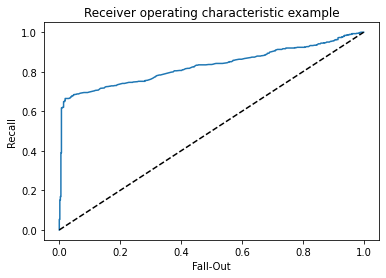

0.782608695652174
c : 5.836062500000001, loggamma : -4.200820312499999, kernel : rbf
accuracy 0.8120035304501324


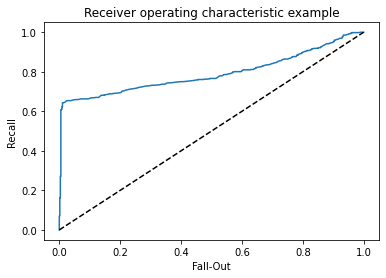

0.7635960044395117
c : 5.836062500000001, loggamma : -4.200820312499999, kernel : rbf
accuracy 0.8181818181818182


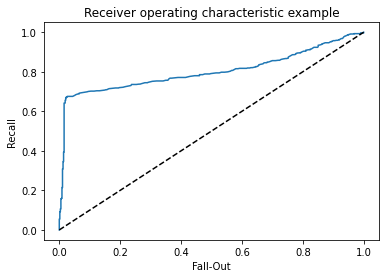

0.7822410147991544
c : 5.836062500000001, loggamma : -4.200820312499999, kernel : rbf
accuracy 0.8005295675198588


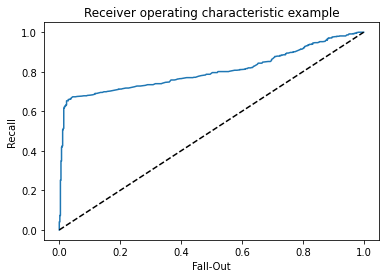

0.7684426229508198
0  2  14
c : 28.492062500000003, loggamma : 0.5191796875000001, kernel : rbf
accuracy 0.793468667255075


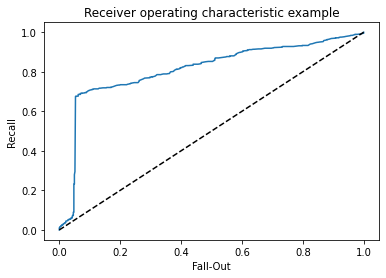

0.7762906309751433
c : 28.492062500000003, loggamma : 0.5191796875000001, kernel : rbf
accuracy 0.7855251544571933


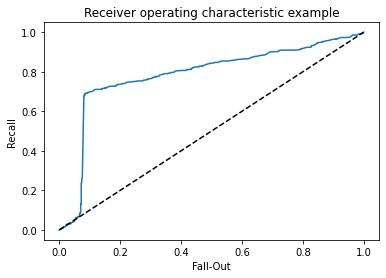

0.7687916270218839
c : 28.492062500000003, loggamma : 0.5191796875000001, kernel : rbf
accuracy 0.7917034421888791


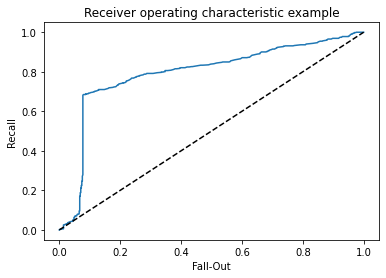

0.7686274509803921
c : 28.492062500000003, loggamma : 0.5191796875000001, kernel : rbf
accuracy 0.8022947925860547


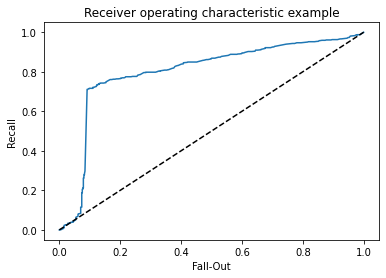

0.7890772128060264
c : 28.492062500000003, loggamma : 0.5191796875000001, kernel : rbf
accuracy 0.793468667255075


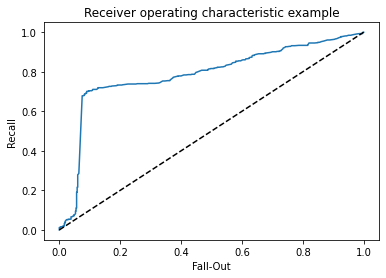

0.7833333333333333
0  2  15
c : 40.4920625, loggamma : -1.7008203124999999, kernel : rbf
accuracy 0.8146513680494263


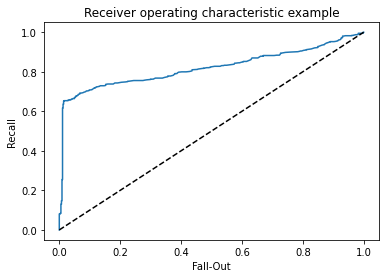

0.7775423728813559
c : 40.4920625, loggamma : -1.7008203124999999, kernel : rbf
accuracy 0.8181818181818182


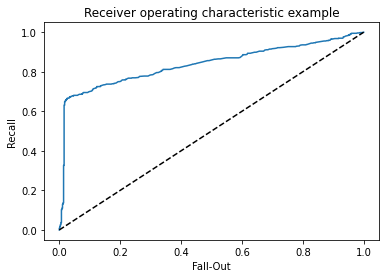

0.7831578947368422
c : 40.4920625, loggamma : -1.7008203124999999, kernel : rbf
accuracy 0.8164165931156222


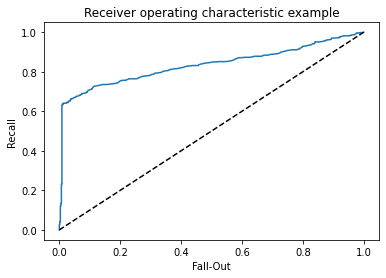

0.7714285714285716
c : 40.4920625, loggamma : -1.7008203124999999, kernel : rbf
accuracy 0.8217122683142101


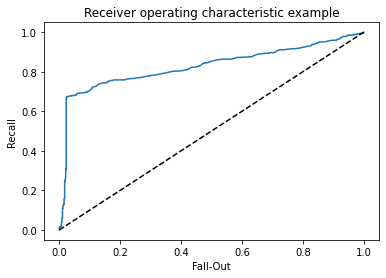

0.7878151260504201
c : 40.4920625, loggamma : -1.7008203124999999, kernel : rbf
accuracy 0.8040600176522507


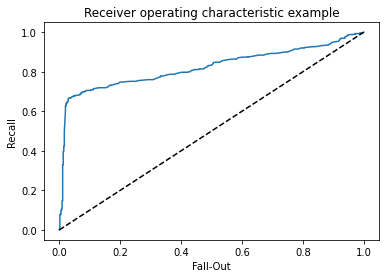

0.7739307535641547
0  2  16
c : 17.836062499999997, loggamma : 3.0191796875000003, kernel : rbf
accuracy 0.793468667255075


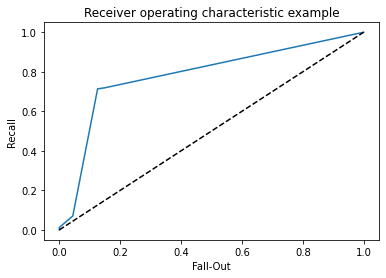

0.7762906309751433
c : 17.836062499999997, loggamma : 3.0191796875000003, kernel : rbf
accuracy 0.7855251544571933


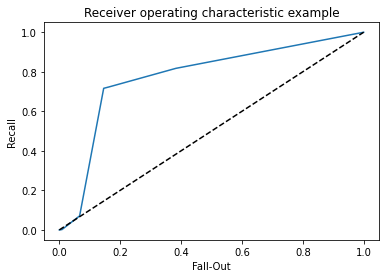

0.7687916270218839
c : 17.836062499999997, loggamma : 3.0191796875000003, kernel : rbf
accuracy 0.7917034421888791


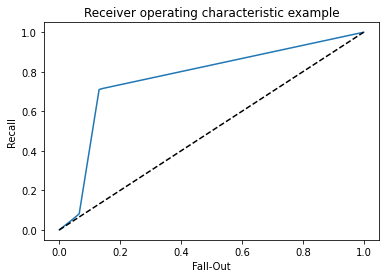

0.7686274509803921
c : 17.836062499999997, loggamma : 3.0191796875000003, kernel : rbf
accuracy 0.8022947925860547


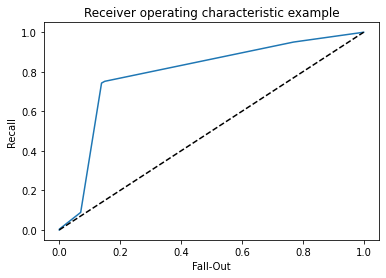

0.7890772128060264
c : 17.836062499999997, loggamma : 3.0191796875000003, kernel : rbf
accuracy 0.793468667255075


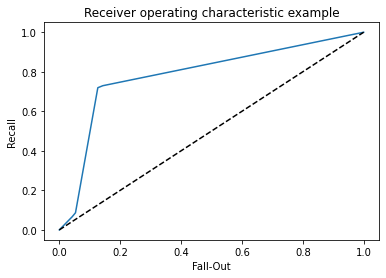

0.7833333333333333
0  2  17
c : 23.04218474957092, loggamma : -0.660205453188501, kernel : rbf
accuracy 0.8120035304501324


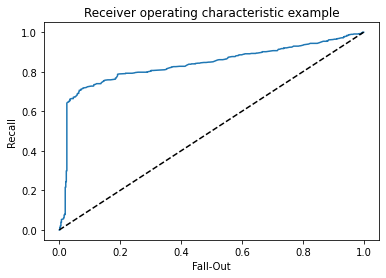

0.7797311271975181
c : 23.04218474957092, loggamma : -0.660205453188501, kernel : rbf
accuracy 0.8093556928508385


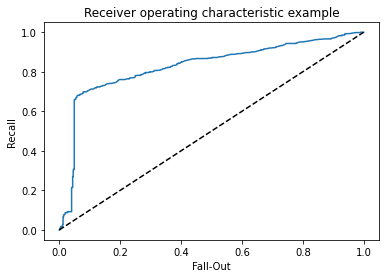

0.7818181818181819
c : 23.04218474957092, loggamma : -0.660205453188501, kernel : rbf
accuracy 0.8146513680494263


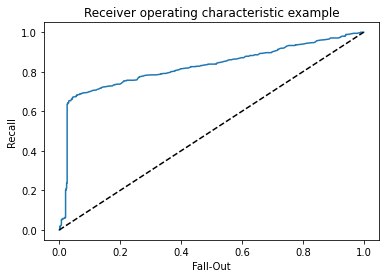

0.7775423728813559
c : 23.04218474957092, loggamma : -0.660205453188501, kernel : rbf
accuracy 0.8164165931156222


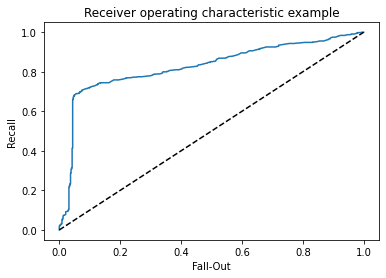

0.7932405566600398
c : 23.04218474957092, loggamma : -0.660205453188501, kernel : rbf
accuracy 0.7996469549867609


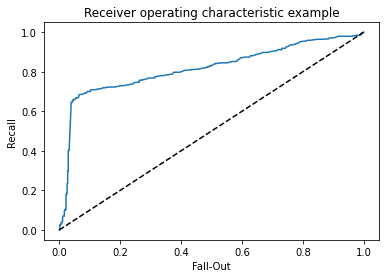

0.7736789631106679
0  2  18
c : 46.4920625, loggamma : 4.269179687499999, kernel : rbf
accuracy 0.793468667255075


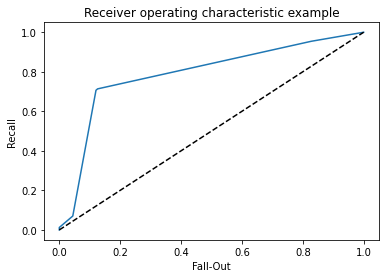

0.7762906309751433
c : 46.4920625, loggamma : 4.269179687499999, kernel : rbf
accuracy 0.7855251544571933


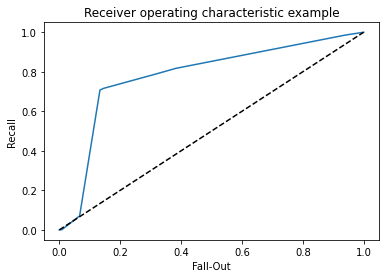

0.7687916270218839
c : 46.4920625, loggamma : 4.269179687499999, kernel : rbf
accuracy 0.7917034421888791


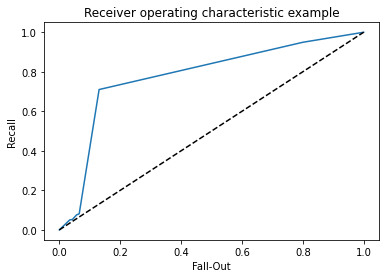

0.7686274509803921
c : 46.4920625, loggamma : 4.269179687499999, kernel : rbf
accuracy 0.8022947925860547


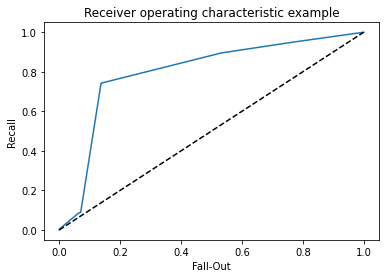

0.7890772128060264
c : 46.4920625, loggamma : 4.269179687499999, kernel : rbf
accuracy 0.793468667255075


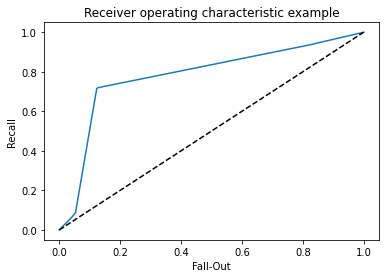

0.7833333333333333
0  2  19
c : 38.656062500000004, loggamma : -3.1933203125000005, kernel : rbf
accuracy 0.8172992056487202


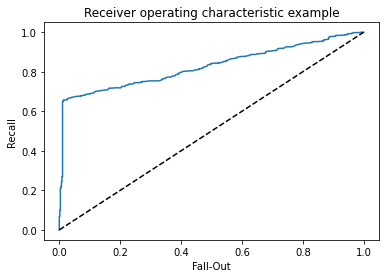

0.7804878048780487
c : 38.656062500000004, loggamma : -3.1933203125000005, kernel : rbf
accuracy 0.8164165931156222


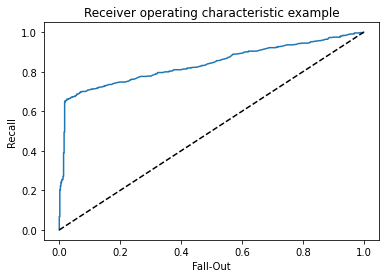

0.7791932059447984
c : 38.656062500000004, loggamma : -3.1933203125000005, kernel : rbf
accuracy 0.8111209179170344


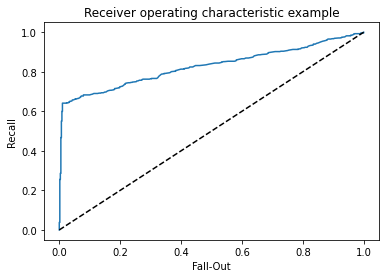

0.762749445676275
c : 38.656062500000004, loggamma : -3.1933203125000005, kernel : rbf
accuracy 0.8199470432480142


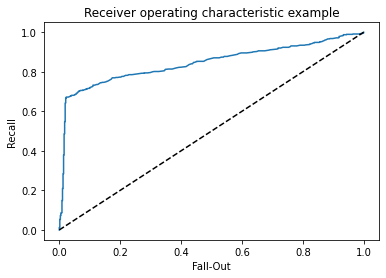

0.7848101265822784
c : 38.656062500000004, loggamma : -3.1933203125000005, kernel : rbf
accuracy 0.8005295675198588


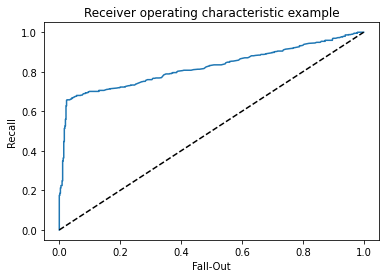

0.7684426229508198
0  3  0
c : 16.672062499999996, loggamma : 1.3866796874999998, kernel : rbf
accuracy 0.793468667255075


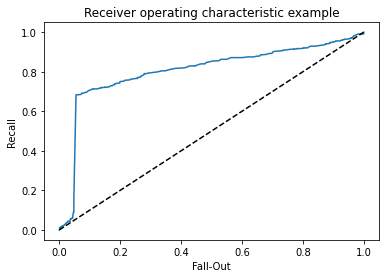

0.7762906309751433
c : 16.672062499999996, loggamma : 1.3866796874999998, kernel : rbf
accuracy 0.7855251544571933


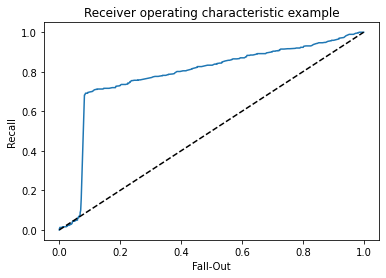

0.7687916270218839
c : 16.672062499999996, loggamma : 1.3866796874999998, kernel : rbf
accuracy 0.7917034421888791


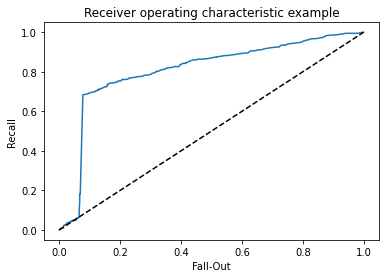

0.7686274509803921
c : 16.672062499999996, loggamma : 1.3866796874999998, kernel : rbf
accuracy 0.8022947925860547


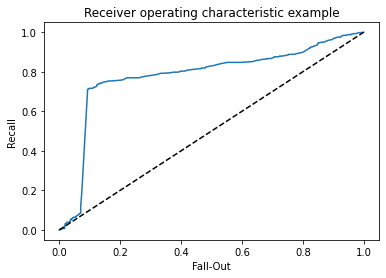

0.7890772128060264
c : 16.672062499999996, loggamma : 1.3866796874999998, kernel : rbf
accuracy 0.793468667255075


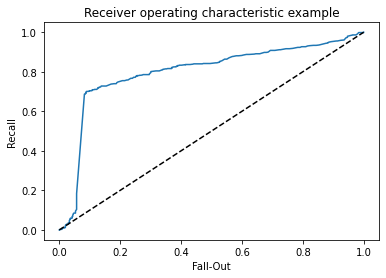

0.7833333333333333
0  3  1
c : 22.672062499999996, loggamma : -4.443320312499999, kernel : rbf
accuracy 0.8172992056487202


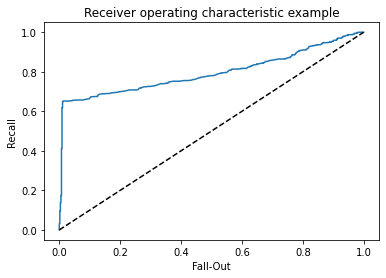

0.7804878048780487
c : 22.672062499999996, loggamma : -4.443320312499999, kernel : rbf
accuracy 0.8181818181818182


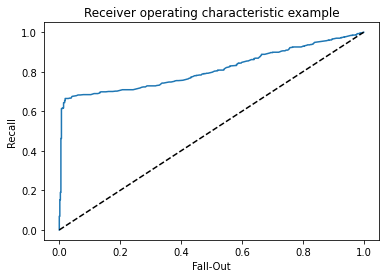

0.7817796610169491
c : 22.672062499999996, loggamma : -4.443320312499999, kernel : rbf
accuracy 0.8128861429832304


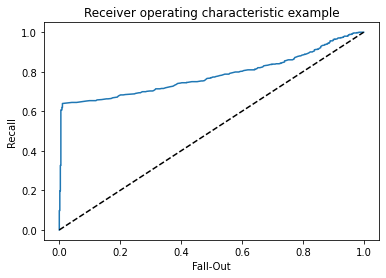

0.7654867256637169
c : 22.672062499999996, loggamma : -4.443320312499999, kernel : rbf
accuracy 0.8199470432480142


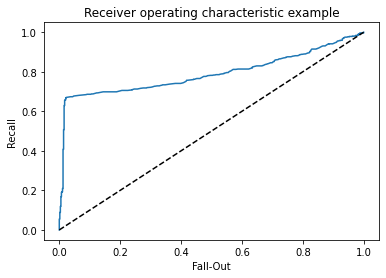

0.7848101265822784
c : 22.672062499999996, loggamma : -4.443320312499999, kernel : rbf
accuracy 0.8005295675198588


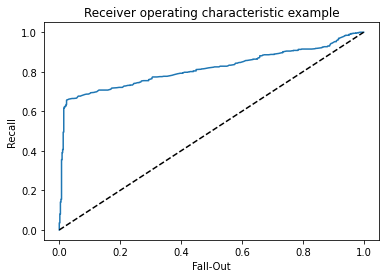

0.7684426229508198
0  3  2
c : 44.656062500000004, loggamma : 0.13667968749999998, kernel : rbf
accuracy 0.8049426301853486


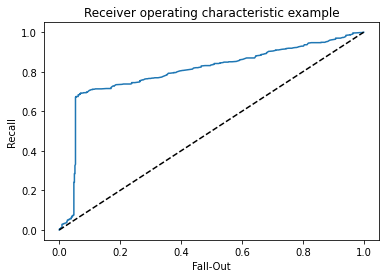

0.781404549950544
c : 44.656062500000004, loggamma : 0.13667968749999998, kernel : rbf
accuracy 0.7978817299205648


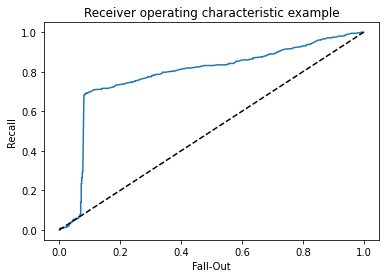

0.7757100881488737
c : 44.656062500000004, loggamma : 0.13667968749999998, kernel : rbf
accuracy 0.7996469549867609


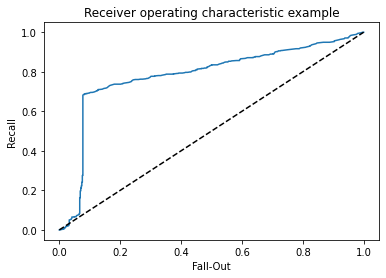

0.7713997985901309
c : 44.656062500000004, loggamma : 0.13667968749999998, kernel : rbf
accuracy 0.8040600176522507


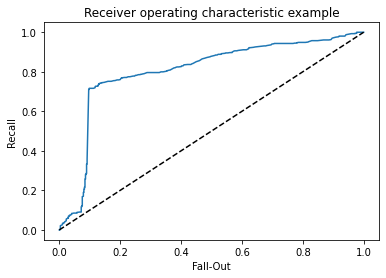

0.7889733840304182
c : 44.656062500000004, loggamma : 0.13667968749999998, kernel : rbf
accuracy 0.795233892321271


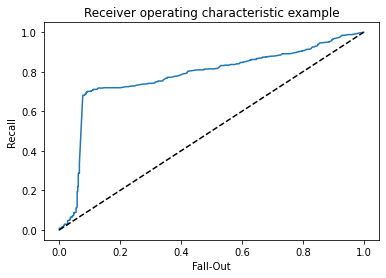

0.7807183364839319
0  3  3
c : 32.656062500000004, loggamma : -1.9433203125000003, kernel : rbf
accuracy 0.8164165931156222


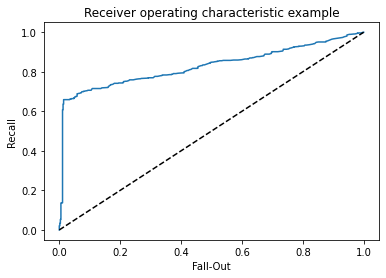

0.7801268498942918
c : 32.656062500000004, loggamma : -1.9433203125000003, kernel : rbf
accuracy 0.8181818181818182


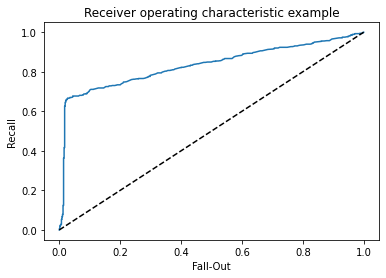

0.7827004219409283
c : 32.656062500000004, loggamma : -1.9433203125000003, kernel : rbf
accuracy 0.8190644307149162


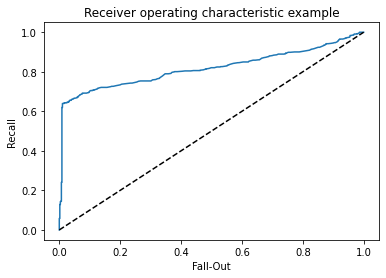

0.7749725576289791
c : 32.656062500000004, loggamma : -1.9433203125000003, kernel : rbf
accuracy 0.8190644307149162


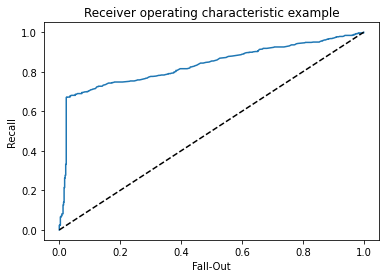

0.7839831401475238
c : 32.656062500000004, loggamma : -1.9433203125000003, kernel : rbf
accuracy 0.8049426301853486


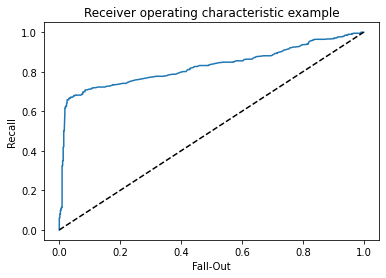

0.7751780264496441
0  3  4
c : 10.672062500000001, loggamma : 2.6366796875000005, kernel : rbf
accuracy 0.793468667255075


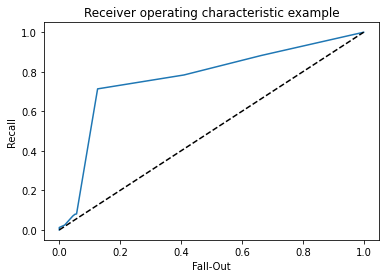

0.7762906309751433
c : 10.672062500000001, loggamma : 2.6366796875000005, kernel : rbf
accuracy 0.7855251544571933


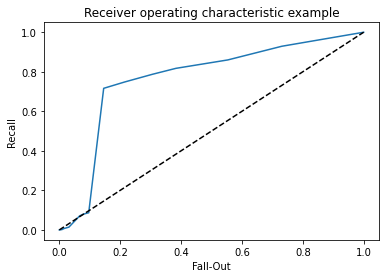

0.7687916270218839
c : 10.672062500000001, loggamma : 2.6366796875000005, kernel : rbf
accuracy 0.7917034421888791


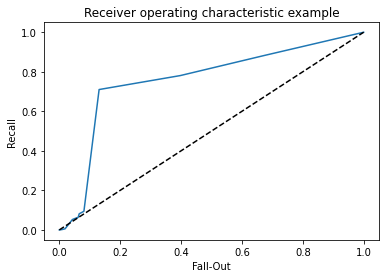

0.7686274509803921
c : 10.672062500000001, loggamma : 2.6366796875000005, kernel : rbf
accuracy 0.8022947925860547


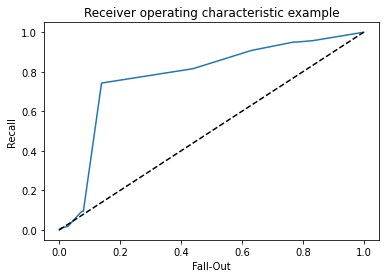

0.7890772128060264
c : 10.672062500000001, loggamma : 2.6366796875000005, kernel : rbf
accuracy 0.793468667255075


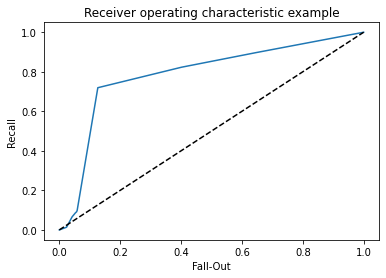

0.7833333333333333
0  3  5
c : 13.672062500000001, loggamma : -2.5683203125000005, kernel : rbf
accuracy 0.8172992056487202


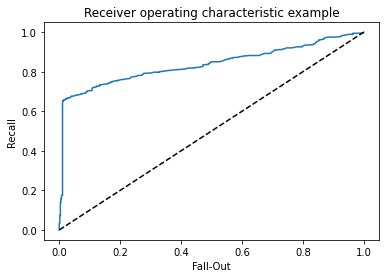

0.7804878048780487
c : 13.672062500000001, loggamma : -2.5683203125000005, kernel : rbf
accuracy 0.8164165931156222


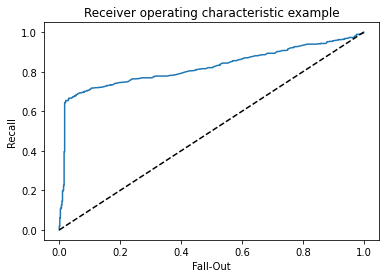

0.7801268498942917
c : 13.672062500000001, loggamma : -2.5683203125000005, kernel : rbf
accuracy 0.8128861429832304


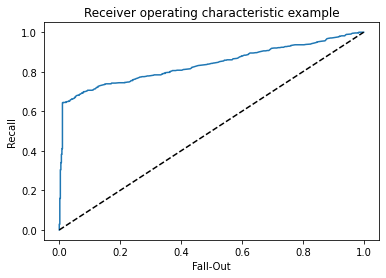

0.7654867256637169
c : 13.672062500000001, loggamma : -2.5683203125000005, kernel : rbf
accuracy 0.8199470432480142


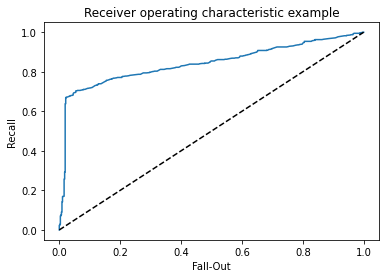

0.7848101265822784
c : 13.672062500000001, loggamma : -2.5683203125000005, kernel : rbf
accuracy 0.7996469549867609


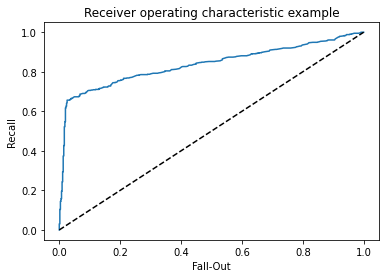

0.7671794871794873
0  3  6
c : 35.656062500000004, loggamma : 2.0116796875000005, kernel : rbf
accuracy 0.793468667255075


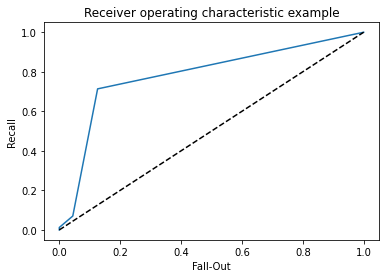

0.7762906309751433
c : 35.656062500000004, loggamma : 2.0116796875000005, kernel : rbf
accuracy 0.7855251544571933


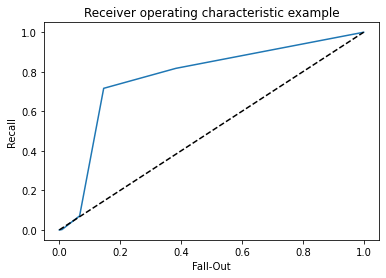

0.7687916270218839
c : 35.656062500000004, loggamma : 2.0116796875000005, kernel : rbf
accuracy 0.7917034421888791


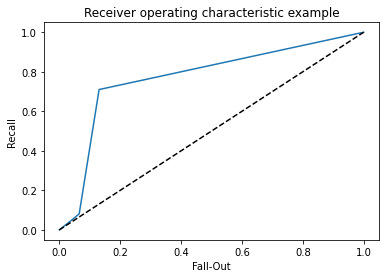

0.7686274509803921
c : 35.656062500000004, loggamma : 2.0116796875000005, kernel : rbf
accuracy 0.8022947925860547


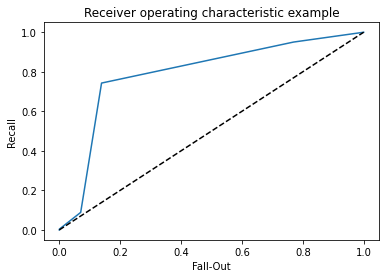

0.7890772128060264
c : 35.656062500000004, loggamma : 2.0116796875000005, kernel : rbf
accuracy 0.793468667255075


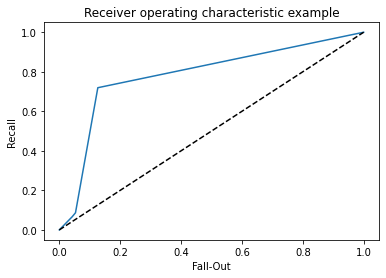

0.7833333333333333
0  3  7
c : 47.656062500000004, loggamma : -0.4883203125, kernel : rbf
accuracy 0.8102383053839365


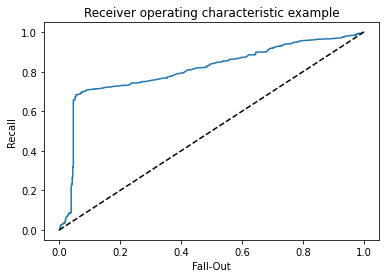

0.7817258883248731
c : 47.656062500000004, loggamma : -0.4883203125, kernel : rbf
accuracy 0.8031774051191527


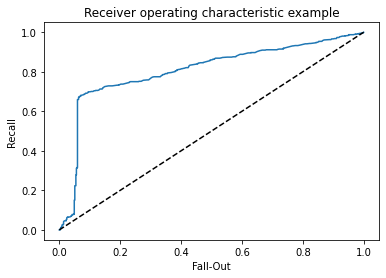

0.7736040609137056
c : 47.656062500000004, loggamma : -0.4883203125, kernel : rbf
accuracy 0.8137687555163283


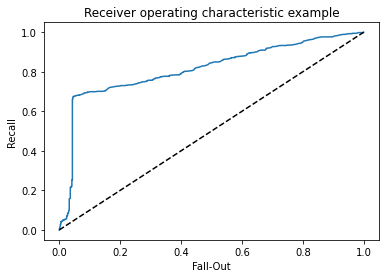

0.7808930425752856
c : 47.656062500000004, loggamma : -0.4883203125, kernel : rbf
accuracy 0.8058252427184466


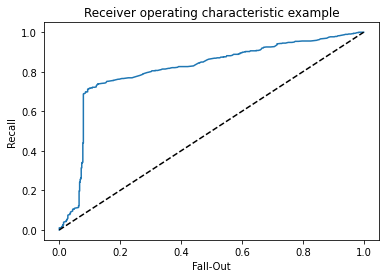

0.7868217054263565
c : 47.656062500000004, loggamma : -0.4883203125, kernel : rbf
accuracy 0.8005295675198588


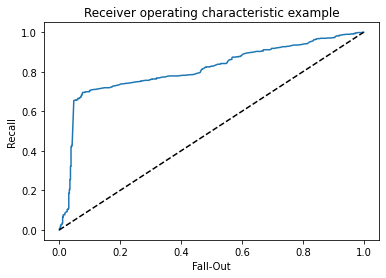

0.7810077519379846
0  3  8
c : 23.656062500000004, loggamma : 4.511679687499999, kernel : rbf
accuracy 0.793468667255075


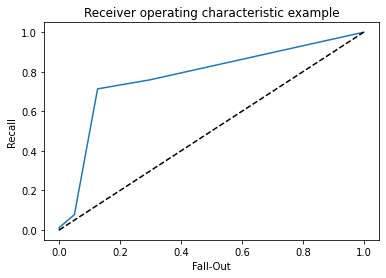

0.7762906309751433
c : 23.656062500000004, loggamma : 4.511679687499999, kernel : rbf
accuracy 0.7855251544571933


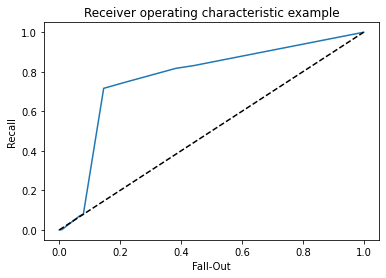

0.7687916270218839
c : 23.656062500000004, loggamma : 4.511679687499999, kernel : rbf
accuracy 0.7917034421888791


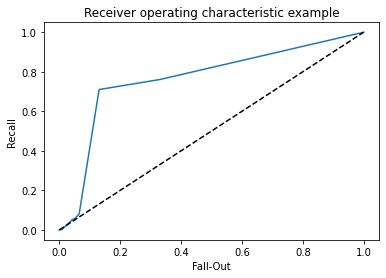

0.7686274509803921
c : 23.656062500000004, loggamma : 4.511679687499999, kernel : rbf
accuracy 0.8022947925860547


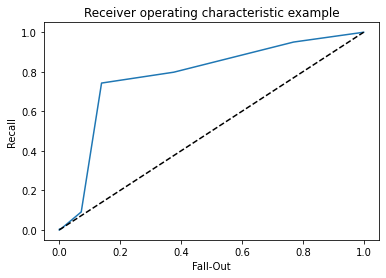

0.7890772128060264
c : 23.656062500000004, loggamma : 4.511679687499999, kernel : rbf
accuracy 0.793468667255075


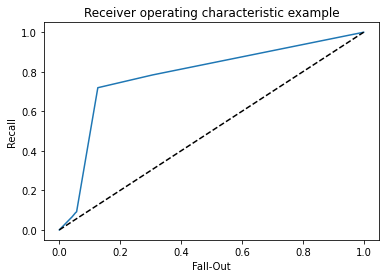

0.7833333333333333
0  3  9
c : 19.672062499999996, loggamma : -1.3183203124999998, kernel : rbf
accuracy 0.8128861429832304


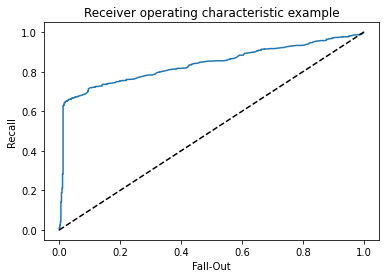

0.7763713080168776
c : 19.672062499999996, loggamma : -1.3183203124999998, kernel : rbf
accuracy 0.8181818181818182


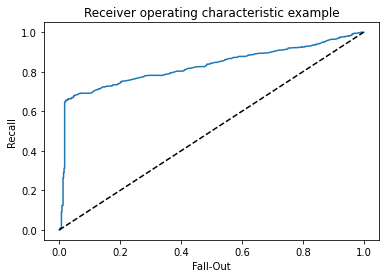

0.7840670859538784
c : 19.672062499999996, loggamma : -1.3183203124999998, kernel : rbf
accuracy 0.8172992056487202


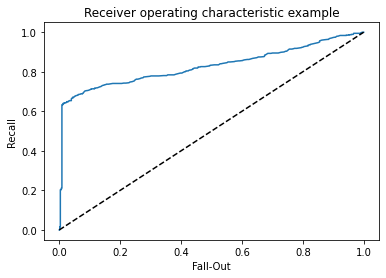

0.7732749178532312
c : 19.672062499999996, loggamma : -1.3183203124999998, kernel : rbf
accuracy 0.8217122683142101


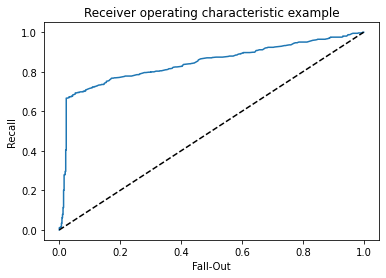

0.7882599580712788
c : 19.672062499999996, loggamma : -1.3183203124999998, kernel : rbf
accuracy 0.8049426301853486


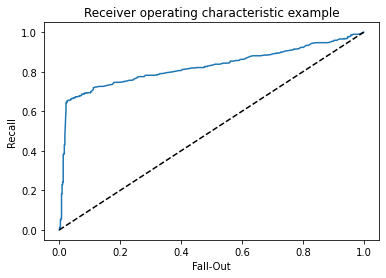

0.7747196738022426
0  3  10
c : 41.656062500000004, loggamma : 3.2616796875000005, kernel : rbf
accuracy 0.793468667255075


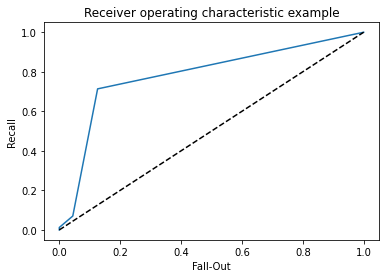

0.7762906309751433
c : 41.656062500000004, loggamma : 3.2616796875000005, kernel : rbf
accuracy 0.7855251544571933


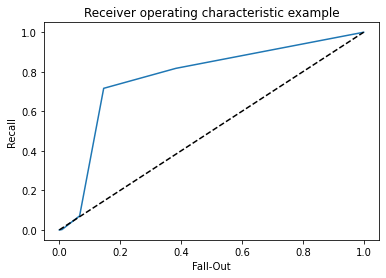

0.7687916270218839
c : 41.656062500000004, loggamma : 3.2616796875000005, kernel : rbf
accuracy 0.7917034421888791


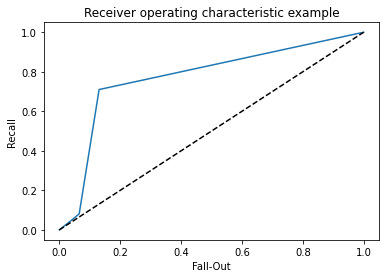

0.7686274509803921
c : 41.656062500000004, loggamma : 3.2616796875000005, kernel : rbf
accuracy 0.8022947925860547


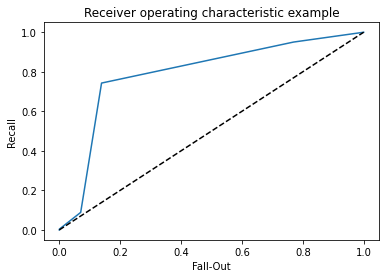

0.7890772128060264
c : 41.656062500000004, loggamma : 3.2616796875000005, kernel : rbf
accuracy 0.793468667255075


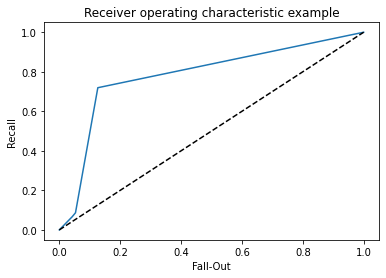

0.7833333333333333
0  3  11
c : 29.656062500000004, loggamma : -3.8183203125000005, kernel : rbf
accuracy 0.8172992056487202


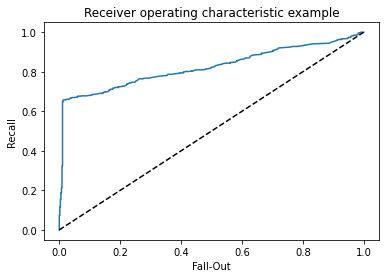

0.7804878048780487
c : 29.656062500000004, loggamma : -3.8183203125000005, kernel : rbf
accuracy 0.8181818181818182


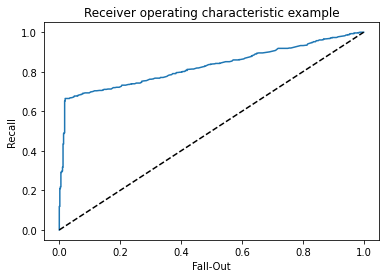

0.7817796610169491
c : 29.656062500000004, loggamma : -3.8183203125000005, kernel : rbf
accuracy 0.8111209179170344


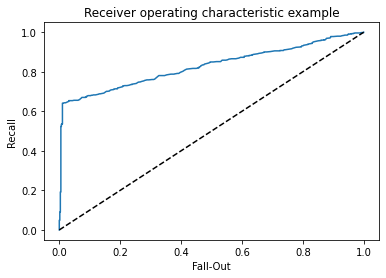

0.762749445676275
c : 29.656062500000004, loggamma : -3.8183203125000005, kernel : rbf
accuracy 0.8208296557811121


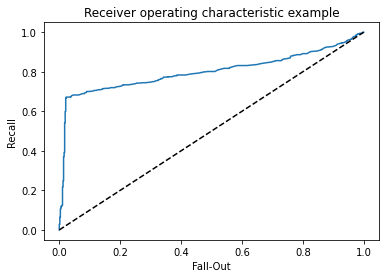

0.7860906217070602
c : 29.656062500000004, loggamma : -3.8183203125000005, kernel : rbf
accuracy 0.8005295675198588


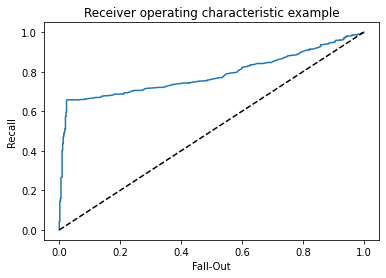

0.7684426229508198
0  3  12
c : 7.672062500000001, loggamma : 0.7616796875000001, kernel : rbf
accuracy 0.793468667255075


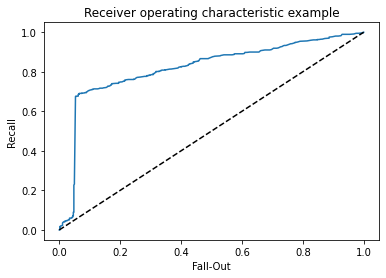

0.7762906309751433
c : 7.672062500000001, loggamma : 0.7616796875000001, kernel : rbf
accuracy 0.7855251544571933


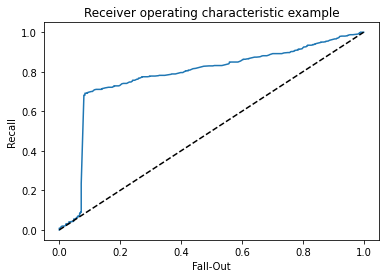

0.7687916270218839
c : 7.672062500000001, loggamma : 0.7616796875000001, kernel : rbf
accuracy 0.7917034421888791


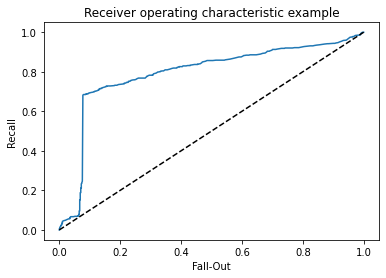

0.7686274509803921
c : 7.672062500000001, loggamma : 0.7616796875000001, kernel : rbf
accuracy 0.8022947925860547


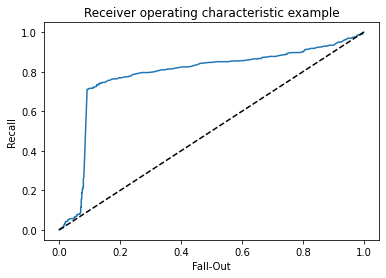

0.7890772128060264
c : 7.672062500000001, loggamma : 0.7616796875000001, kernel : rbf
accuracy 0.793468667255075


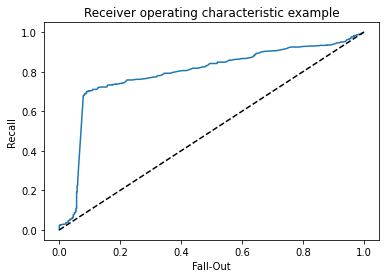

0.7833333333333333
0  3  13
c : 6.172062500000001, loggamma : -4.130820312499999, kernel : rbf
accuracy 0.8172992056487202


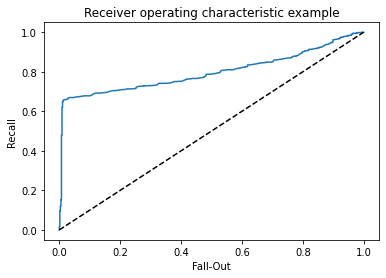

0.7804878048780487
c : 6.172062500000001, loggamma : -4.130820312499999, kernel : rbf
accuracy 0.8181818181818182


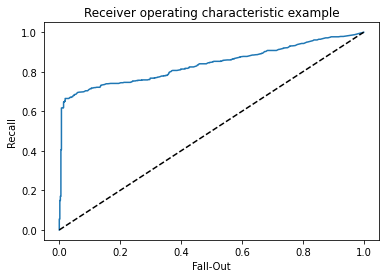

0.7817796610169491
c : 6.172062500000001, loggamma : -4.130820312499999, kernel : rbf
accuracy 0.8128861429832304


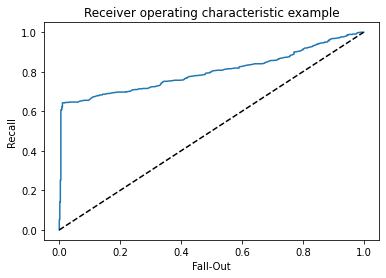

0.7654867256637169
c : 6.172062500000001, loggamma : -4.130820312499999, kernel : rbf
accuracy 0.8199470432480142


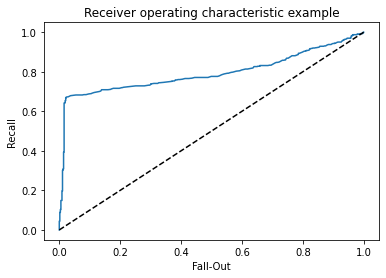

0.7848101265822784
c : 6.172062500000001, loggamma : -4.130820312499999, kernel : rbf
accuracy 0.8005295675198588


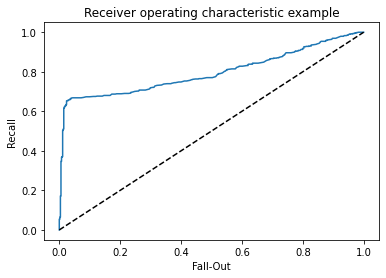

0.7684426229508198
0  3  14
c : 28.156062500000004, loggamma : 0.4491796875000001, kernel : rbf
accuracy 0.793468667255075


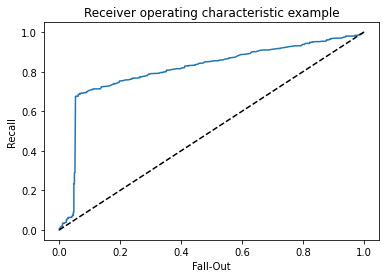

0.7762906309751433
c : 28.156062500000004, loggamma : 0.4491796875000001, kernel : rbf
accuracy 0.7855251544571933


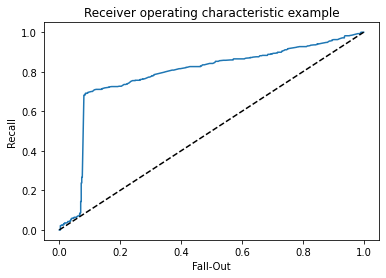

0.7687916270218839
c : 28.156062500000004, loggamma : 0.4491796875000001, kernel : rbf
accuracy 0.7917034421888791


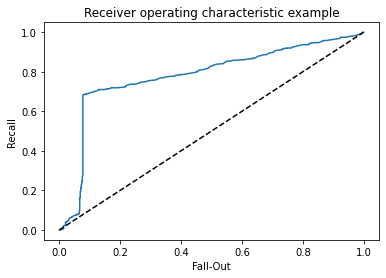

0.7686274509803921
c : 28.156062500000004, loggamma : 0.4491796875000001, kernel : rbf
accuracy 0.8022947925860547


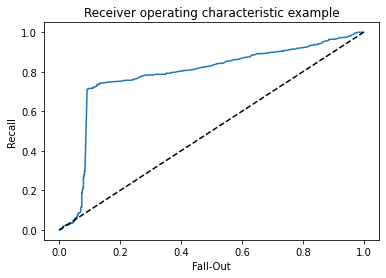

0.7890772128060264
c : 28.156062500000004, loggamma : 0.4491796875000001, kernel : rbf
accuracy 0.793468667255075


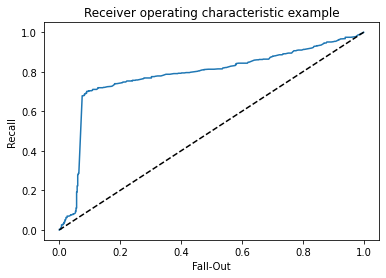

0.7833333333333333
0  3  15
c : 40.156062500000004, loggamma : -1.6308203124999998, kernel : rbf
accuracy 0.8155339805825242


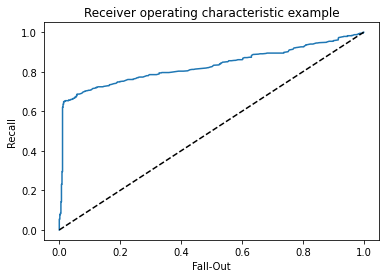

0.7788359788359788
c : 40.156062500000004, loggamma : -1.6308203124999998, kernel : rbf
accuracy 0.8190644307149162


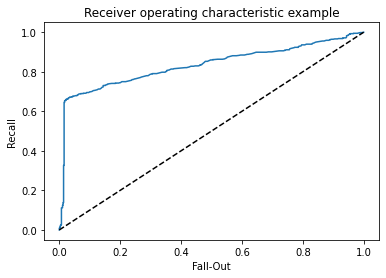

0.7839831401475238
c : 40.156062500000004, loggamma : -1.6308203124999998, kernel : rbf
accuracy 0.8181818181818182


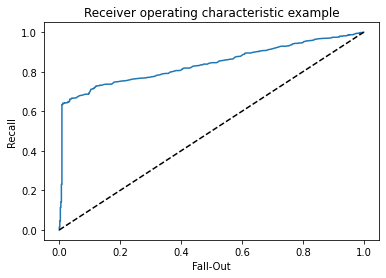

0.7741228070175438
c : 40.156062500000004, loggamma : -1.6308203124999998, kernel : rbf
accuracy 0.8217122683142101


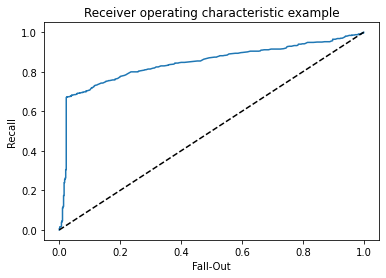

0.7878151260504201
c : 40.156062500000004, loggamma : -1.6308203124999998, kernel : rbf
accuracy 0.8031774051191527


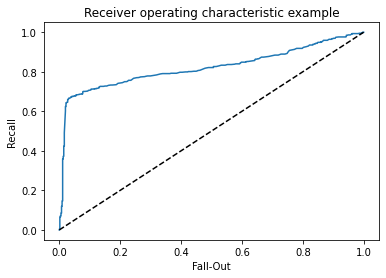

0.7722165474974465
0  3  16
c : 18.172062499999996, loggamma : 2.9491796875000005, kernel : rbf
accuracy 0.793468667255075


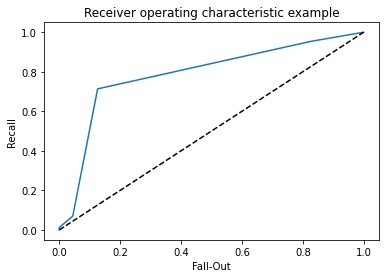

0.7762906309751433
c : 18.172062499999996, loggamma : 2.9491796875000005, kernel : rbf
accuracy 0.7855251544571933


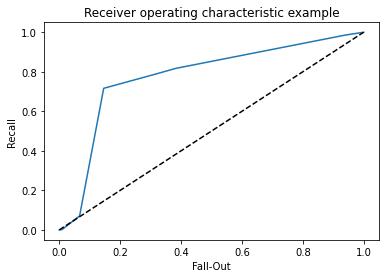

0.7687916270218839
c : 18.172062499999996, loggamma : 2.9491796875000005, kernel : rbf
accuracy 0.7917034421888791


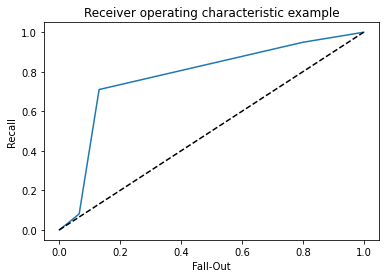

0.7686274509803921
c : 18.172062499999996, loggamma : 2.9491796875000005, kernel : rbf
accuracy 0.8022947925860547


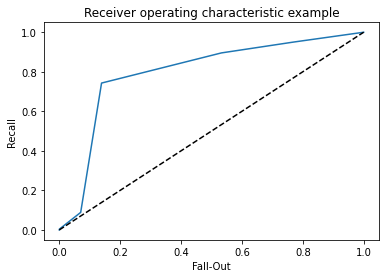

0.7890772128060264
c : 18.172062499999996, loggamma : 2.9491796875000005, kernel : rbf
accuracy 0.793468667255075


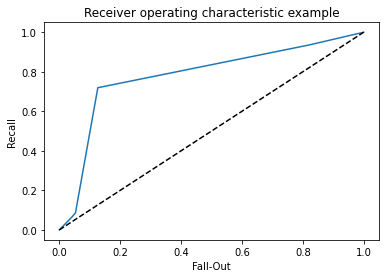

0.7833333333333333
0  3  17
c : 23.128910326804835, loggamma : -0.590205453188501, kernel : rbf
accuracy 0.8075904677846425


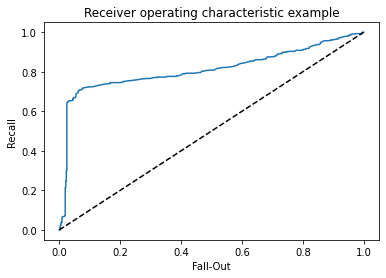

0.7775510204081633
c : 23.128910326804835, loggamma : -0.590205453188501, kernel : rbf
accuracy 0.8084730803177406


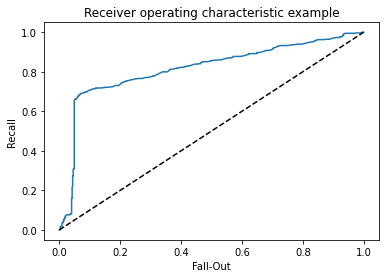

0.7805864509605662
c : 23.128910326804835, loggamma : -0.590205453188501, kernel : rbf
accuracy 0.8146513680494263


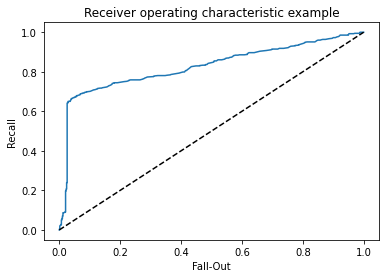

0.7775423728813559
c : 23.128910326804835, loggamma : -0.590205453188501, kernel : rbf
accuracy 0.8155339805825242


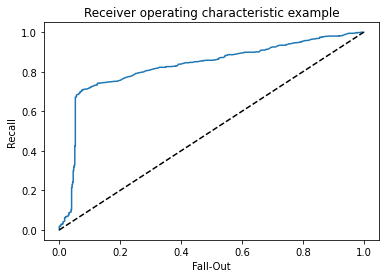

0.7928642220019821
c : 23.128910326804835, loggamma : -0.590205453188501, kernel : rbf
accuracy 0.8031774051191527


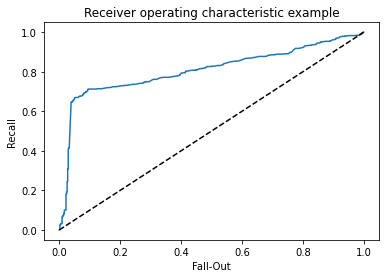

0.7794263105835806
0  3  18
c : 46.156062500000004, loggamma : 4.199179687499999, kernel : rbf
accuracy 0.793468667255075


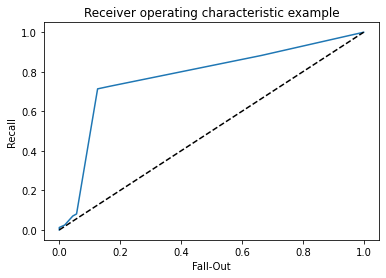

0.7762906309751433
c : 46.156062500000004, loggamma : 4.199179687499999, kernel : rbf
accuracy 0.7855251544571933


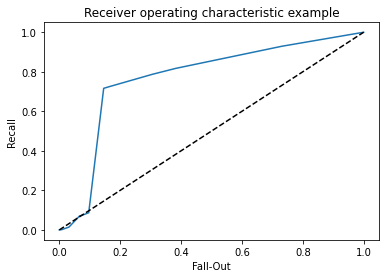

0.7687916270218839
c : 46.156062500000004, loggamma : 4.199179687499999, kernel : rbf
accuracy 0.7917034421888791


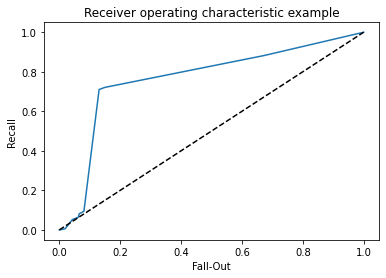

0.7686274509803921
c : 46.156062500000004, loggamma : 4.199179687499999, kernel : rbf
accuracy 0.8022947925860547


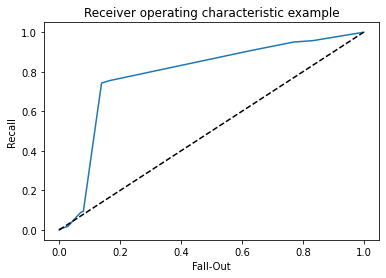

0.7890772128060264
c : 46.156062500000004, loggamma : 4.199179687499999, kernel : rbf
accuracy 0.793468667255075


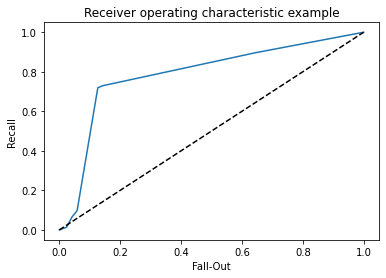

0.7833333333333333
0  3  19
c : 38.320062500000006, loggamma : -3.1233203125000006, kernel : rbf
accuracy 0.8172992056487202


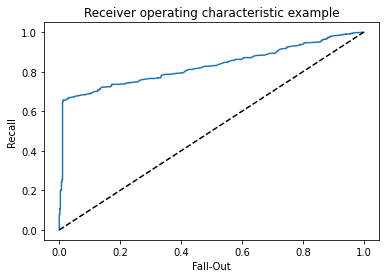

0.7804878048780487
c : 38.320062500000006, loggamma : -3.1233203125000006, kernel : rbf
accuracy 0.8164165931156222


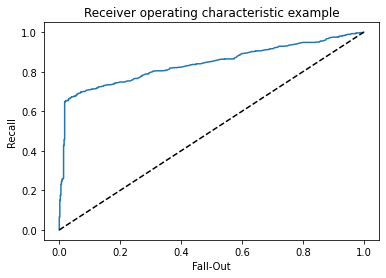

0.7791932059447984
c : 38.320062500000006, loggamma : -3.1233203125000006, kernel : rbf
accuracy 0.8102383053839365


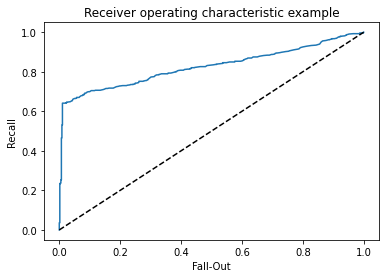

0.7613762486126526
c : 38.320062500000006, loggamma : -3.1233203125000006, kernel : rbf
accuracy 0.8199470432480142


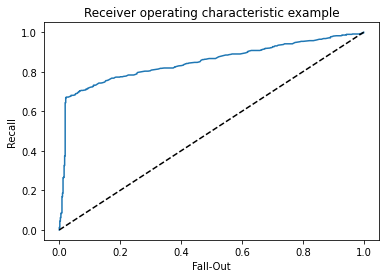

0.7848101265822784
c : 38.320062500000006, loggamma : -3.1233203125000006, kernel : rbf
accuracy 0.8005295675198588


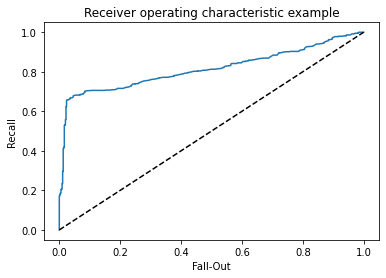

0.7684426229508198
0  4  0
c : 17.008062499999994, loggamma : 1.3166796874999998, kernel : rbf
accuracy 0.793468667255075


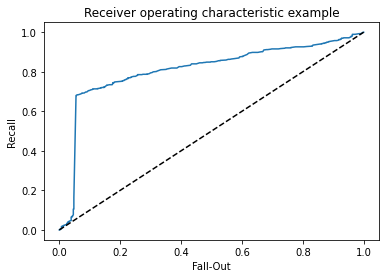

0.7762906309751433
c : 17.008062499999994, loggamma : 1.3166796874999998, kernel : rbf
accuracy 0.7855251544571933


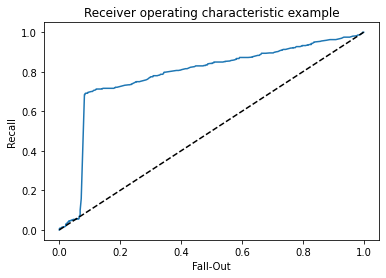

0.7687916270218839
c : 17.008062499999994, loggamma : 1.3166796874999998, kernel : rbf
accuracy 0.7917034421888791


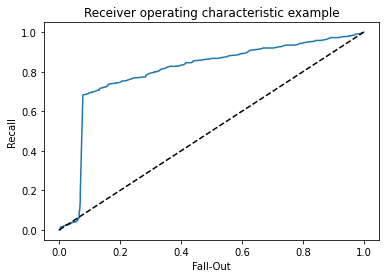

0.7686274509803921
c : 17.008062499999994, loggamma : 1.3166796874999998, kernel : rbf
accuracy 0.8022947925860547


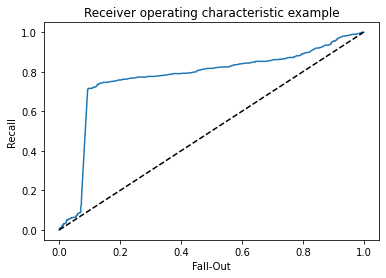

0.7890772128060264
c : 17.008062499999994, loggamma : 1.3166796874999998, kernel : rbf
accuracy 0.793468667255075


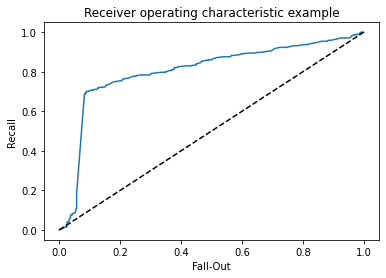

0.7833333333333333
0  4  1
c : 23.008062499999994, loggamma : -4.373320312499999, kernel : rbf
accuracy 0.8172992056487202


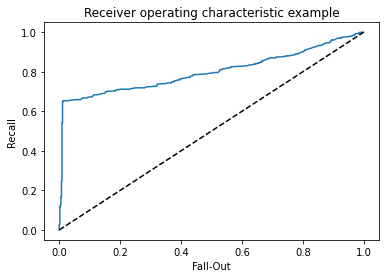

0.7804878048780487
c : 23.008062499999994, loggamma : -4.373320312499999, kernel : rbf
accuracy 0.8181818181818182


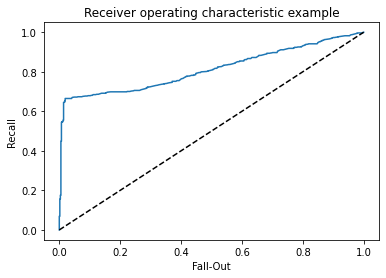

0.7817796610169491
c : 23.008062499999994, loggamma : -4.373320312499999, kernel : rbf
accuracy 0.8128861429832304


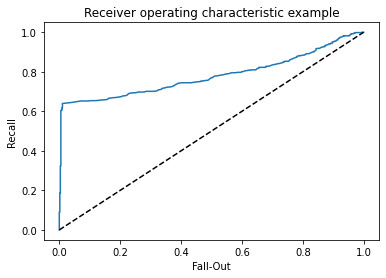

0.7654867256637169
c : 23.008062499999994, loggamma : -4.373320312499999, kernel : rbf
accuracy 0.8208296557811121


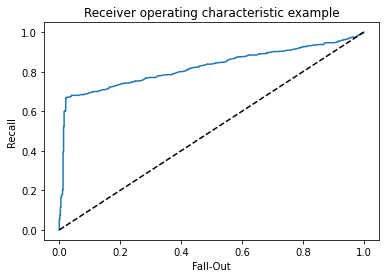

0.7860906217070602
c : 23.008062499999994, loggamma : -4.373320312499999, kernel : rbf
accuracy 0.8005295675198588


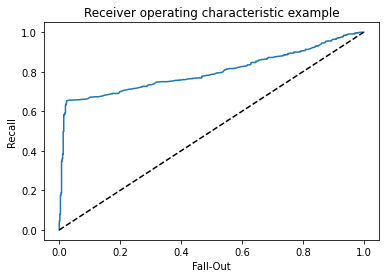

0.7684426229508198
0  4  2
c : 44.320062500000006, loggamma : 0.06667968749999999, kernel : rbf
accuracy 0.8084730803177406


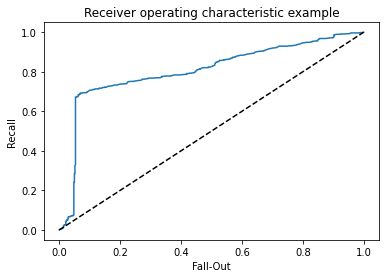

0.7840796019900499
c : 44.320062500000006, loggamma : 0.06667968749999999, kernel : rbf
accuracy 0.7978817299205648


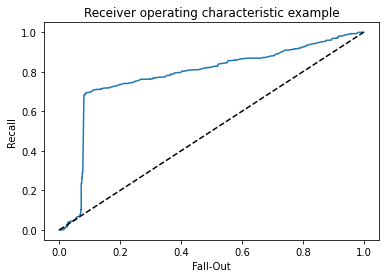

0.7757100881488737
c : 44.320062500000006, loggamma : 0.06667968749999999, kernel : rbf
accuracy 0.8005295675198588


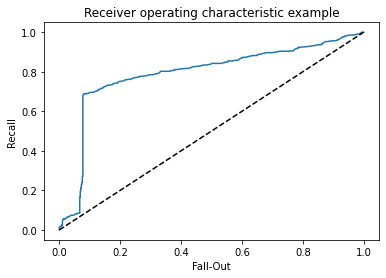

0.7721774193548387
c : 44.320062500000006, loggamma : 0.06667968749999999, kernel : rbf
accuracy 0.8014121800529568


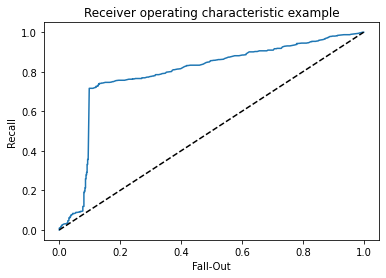

0.7851002865329513
c : 44.320062500000006, loggamma : 0.06667968749999999, kernel : rbf
accuracy 0.7961165048543689


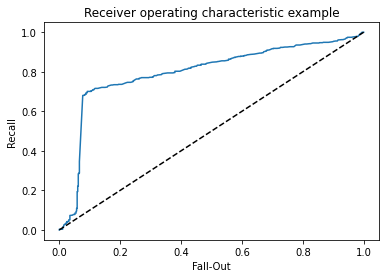

0.781042654028436
0  4  3
c : 32.320062500000006, loggamma : -1.8733203125000002, kernel : rbf
accuracy 0.8137687555163283


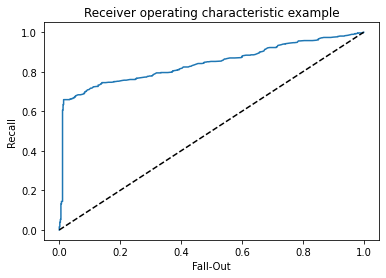

0.7762460233297985
c : 32.320062500000006, loggamma : -1.8733203125000002, kernel : rbf
accuracy 0.8181818181818182


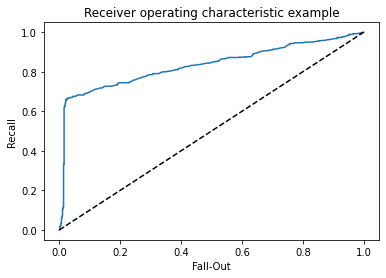

0.7827004219409283
c : 32.320062500000006, loggamma : -1.8733203125000002, kernel : rbf
accuracy 0.8172992056487202


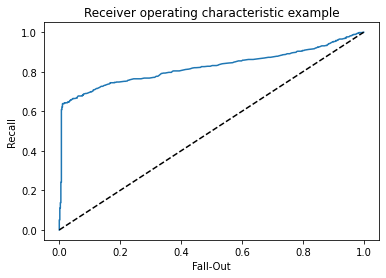

0.7727771679473106
c : 32.320062500000006, loggamma : -1.8733203125000002, kernel : rbf
accuracy 0.8190644307149162


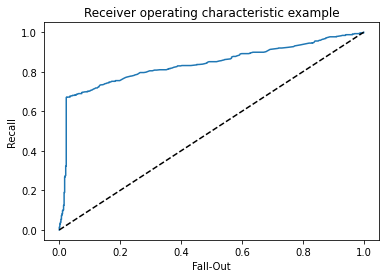

0.7839831401475238
c : 32.320062500000006, loggamma : -1.8733203125000002, kernel : rbf
accuracy 0.8049426301853486


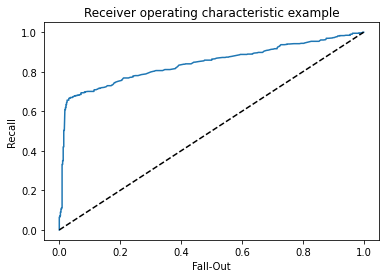

0.7751780264496441
0  4  4
c : 11.008062500000001, loggamma : 2.5666796875000006, kernel : rbf
accuracy 0.793468667255075


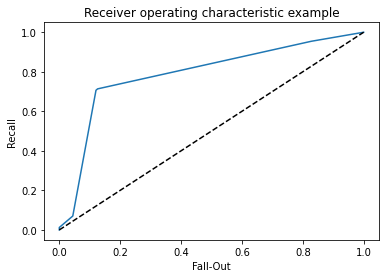

0.7762906309751433
c : 11.008062500000001, loggamma : 2.5666796875000006, kernel : rbf
accuracy 0.7855251544571933


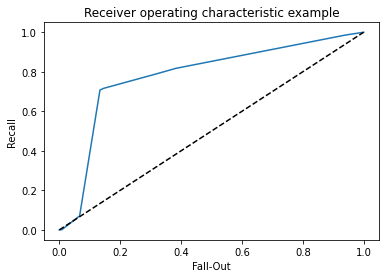

0.7687916270218839
c : 11.008062500000001, loggamma : 2.5666796875000006, kernel : rbf
accuracy 0.7917034421888791


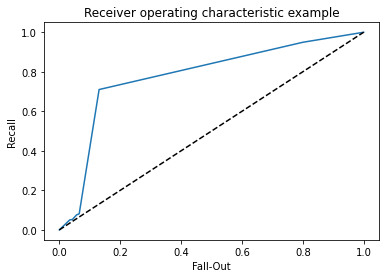

0.7686274509803921
c : 11.008062500000001, loggamma : 2.5666796875000006, kernel : rbf
accuracy 0.8022947925860547


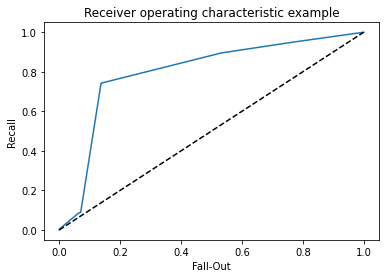

0.7890772128060264
c : 11.008062500000001, loggamma : 2.5666796875000006, kernel : rbf
accuracy 0.793468667255075


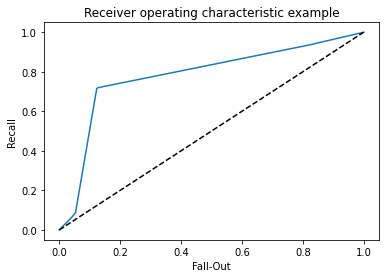

0.7833333333333333
0  4  5
c : 14.008062500000001, loggamma : -2.4983203125000006, kernel : rbf
accuracy 0.8172992056487202


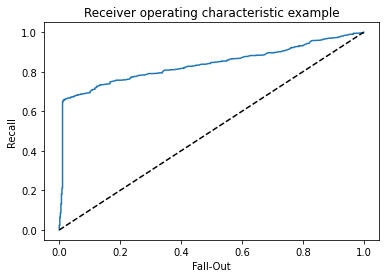

0.7804878048780487
c : 14.008062500000001, loggamma : -2.4983203125000006, kernel : rbf
accuracy 0.8164165931156222


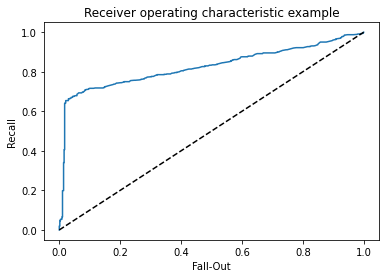

0.7801268498942917
c : 14.008062500000001, loggamma : -2.4983203125000006, kernel : rbf
accuracy 0.8128861429832304


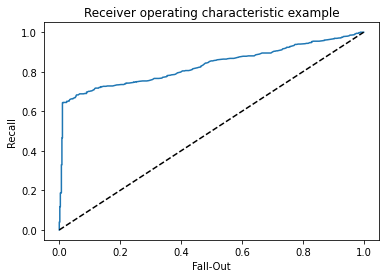

0.7654867256637169
c : 14.008062500000001, loggamma : -2.4983203125000006, kernel : rbf
accuracy 0.8199470432480142


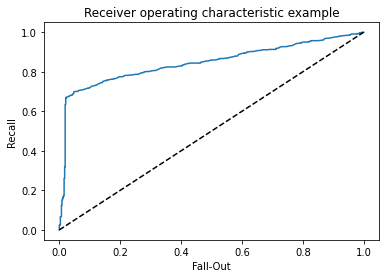

0.7848101265822784
c : 14.008062500000001, loggamma : -2.4983203125000006, kernel : rbf
accuracy 0.8005295675198588


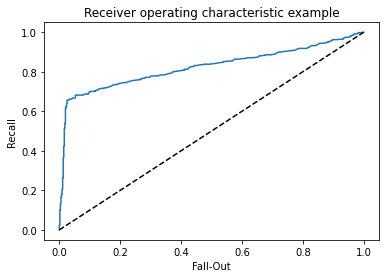

0.7684426229508198
0  4  6
c : 35.320062500000006, loggamma : 1.9416796875000004, kernel : rbf
accuracy 0.793468667255075


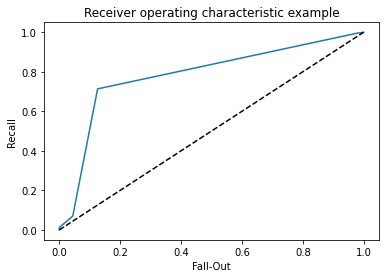

0.7762906309751433
c : 35.320062500000006, loggamma : 1.9416796875000004, kernel : rbf
accuracy 0.7855251544571933


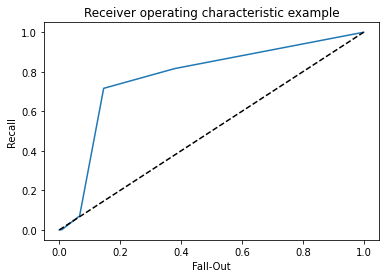

0.7687916270218839
c : 35.320062500000006, loggamma : 1.9416796875000004, kernel : rbf
accuracy 0.7917034421888791


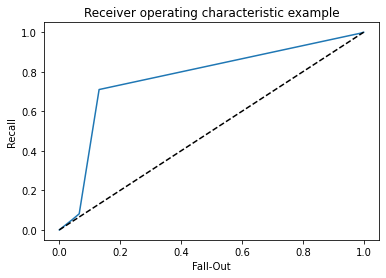

0.7686274509803921
c : 35.320062500000006, loggamma : 1.9416796875000004, kernel : rbf
accuracy 0.8022947925860547


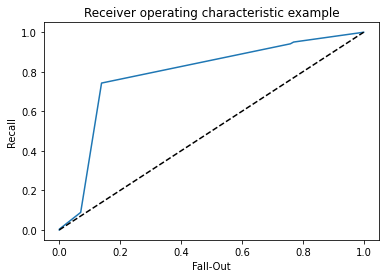

0.7890772128060264
c : 35.320062500000006, loggamma : 1.9416796875000004, kernel : rbf
accuracy 0.793468667255075


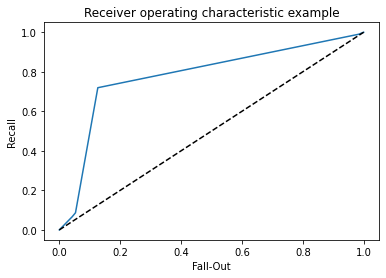

0.7833333333333333
0  4  7
c : 47.320062500000006, loggamma : -0.5583203125, kernel : rbf
accuracy 0.8111209179170344


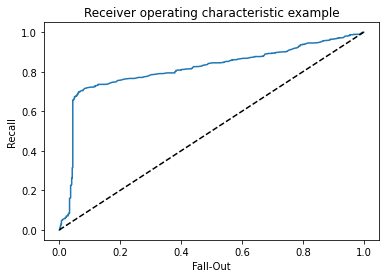

0.782520325203252
c : 47.320062500000006, loggamma : -0.5583203125, kernel : rbf
accuracy 0.8031774051191527


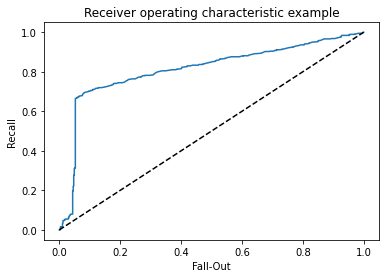

0.7745197168857433
c : 47.320062500000006, loggamma : -0.5583203125, kernel : rbf
accuracy 0.8137687555163283


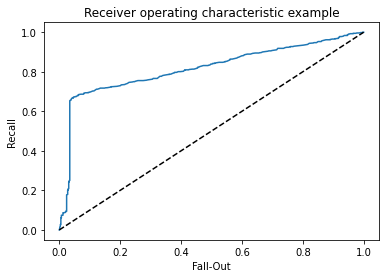

0.7795193312434691
c : 47.320062500000006, loggamma : -0.5583203125, kernel : rbf
accuracy 0.8120035304501324


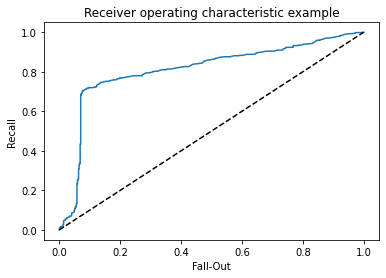

0.7921951219512195
c : 47.320062500000006, loggamma : -0.5583203125, kernel : rbf
accuracy 0.8014121800529568


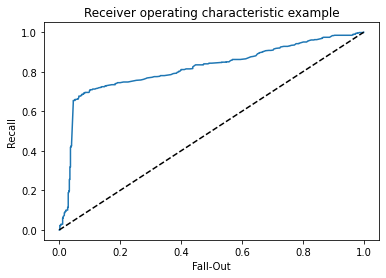

0.78176527643065
0  4  8
c : 23.320062500000006, loggamma : 4.441679687499999, kernel : rbf
accuracy 0.793468667255075


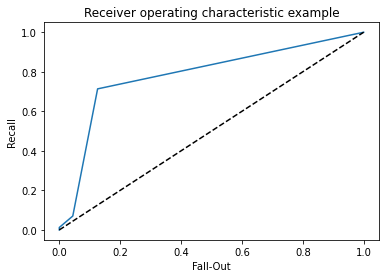

0.7762906309751433
c : 23.320062500000006, loggamma : 4.441679687499999, kernel : rbf
accuracy 0.7855251544571933


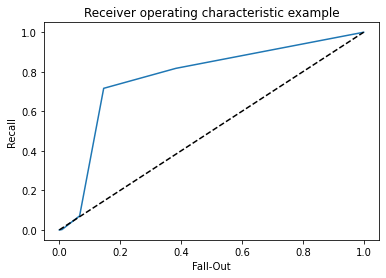

0.7687916270218839
c : 23.320062500000006, loggamma : 4.441679687499999, kernel : rbf
accuracy 0.7917034421888791


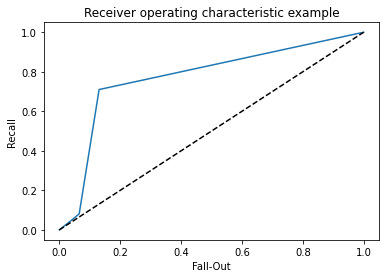

0.7686274509803921
c : 23.320062500000006, loggamma : 4.441679687499999, kernel : rbf
accuracy 0.8022947925860547


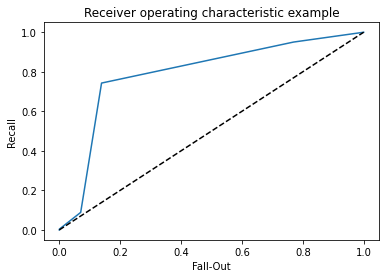

0.7890772128060264
c : 23.320062500000006, loggamma : 4.441679687499999, kernel : rbf
accuracy 0.793468667255075


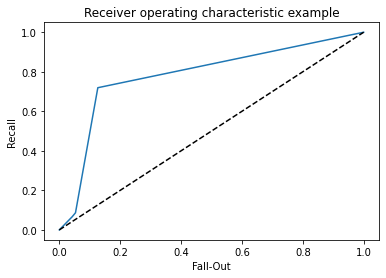

0.7833333333333333
0  4  9
c : 20.008062499999994, loggamma : -1.2483203124999998, kernel : rbf
accuracy 0.8137687555163283


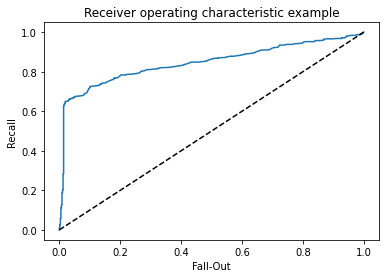

0.7776606954689146
c : 20.008062499999994, loggamma : -1.2483203124999998, kernel : rbf
accuracy 0.8111209179170344


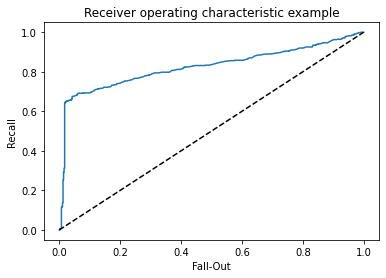

0.7775467775467776


In [ ]:
opt = Optimizer('config')
opt.get_config()
opt.run_Hyperparameter_Tuner()